In [2]:
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

In [3]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500.head()

Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989

In [4]:
sp500['Symbol'] = sp500['Symbol'].str.replace('.','-')
symbols_list = sp500['Symbol'].unique().tolist()
symbols_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'APO',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'CEG',
 'COO',


In [5]:
original = '2025-05-04'
replica = '2023-09-27'
end_date = original
start_date = pd.to_datetime(end_date) - pd.DateOffset(365*8) #get data for past 8 years
print(end_date,'::' ,start_date)

2025-05-04 :: 2017-05-06 00:00:00


In [6]:
df = yf.download(tickers=symbols_list,
                start = start_date,
                end = end_date,
                auto_adjust=False).stack()
df.head()

[*********************100%***********************]  503 of 503 completed


Price              Adj Close      Close       High        Low       Open  \
Date       Ticker                                                          
2017-05-08 A       53.012112  56.320000  56.820000  55.930000  56.650002   
           AAPL    35.540585  38.252499  38.424999  37.257500  37.257500   
           ABBV    47.024109  66.209999  66.949997  66.139999  66.940002   
           ABT     38.763222  44.680000  44.900002  44.630001  44.700001   
           ACGL    30.511164  32.086666  32.503334  32.080002  32.366669   

Price                   Volume  
Date       Ticker               
2017-05-08 A         2190000.0  
           AAPL    195009600.0  
           ABBV      4497400.0  
           ABT       6320100.0  
           ACGL       836400.0

In [7]:
df.index.names = ['date','ticker']
df.columns = df.columns.str.lower()
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-05-08 A        53.012112   56.320000   56.820000   55.930000   56.650002   
           AAPL     35.540585   38.252499   38.424999   37.257500   37.257500   
           ABBV     47.024109   66.209999   66.949997   66.139999   66.940002   
           ABT      38.763222   44.680000   44.900002   44.630001   44.700001   
           ACGL     30.511164   32.086666   32.503334   32.080002   32.366669   
...                       ...         ...         ...         ...         ...   
2025-05-02 XYL     124.250000  124.250000  125.269997  122.040001  122.660004   
           YUM     149.139999  149.139999  150.509995  147.429993  149.440002   
           ZBH     102.379997  102.379997  103.029999  101.070000  102.779999   
           ZBRA    255.949997  255.949997  259.040009  251.940002  254.690002   
           ZTS     157.440002  157.440002  159.970001  156.679993  158.490005   

Price                   volume  
date       ticker               
2017-05-08 A         2190000.0  
           AAPL    195009600.0  
           ABBV      4497400.0  
           ABT       6320100.0  
           ACGL       836400.0  
...                        ...  
2025-05-02 XYL       1834700.0  
           YUM       1972000.0  
           ZBH       3275100.0  
           ZBRA       525800.0  
           ZTS       2654700.0  

[990725 rows x 6 columns]

In [8]:
#GARMAN KLAUSS VOLATILITY
def gkv(O,high,low,C):
    a = np.log(high/low)
    b = np.log(C/O)
    res = 0.5*(a**2) - (2*(np.log(2))-1)*(b**2)
    return res

In [9]:
df['garman_klass_vol'] = gkv(df['open'],df['high'],df['low'],df['adj close'])
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-05-08 A        53.012112   56.320000   56.820000   55.930000   56.650002   
           AAPL     35.540585   38.252499   38.424999   37.257500   37.257500   
           ABBV     47.024109   66.209999   66.949997   66.139999   66.940002   
           ABT      38.763222   44.680000   44.900002   44.630001   44.700001   
           ACGL     30.511164   32.086666   32.503334   32.080002   32.366669   
...                       ...         ...         ...         ...         ...   
2025-05-02 XYL     124.250000  124.250000  125.269997  122.040001  122.660004   
           YUM     149.139999  149.139999  150.509995  147.429993  149.440002   
           ZBH     102.379997  102.379997  103.029999  101.070000  102.779999   
           ZBRA    255.949997  255.949997  259.040009  251.940002  254.690002   
           ZTS     157.440002  157.440002  159.970001  156.679993  158.490005   

Price                   volume  garman_klass_vol  
date       ticker                                 
2017-05-08 A         2190000.0         -0.001577  
           AAPL    195009600.0         -0.000384  
           ABBV      4497400.0         -0.048099  
           ABT       6320100.0         -0.007826  
           ACGL       836400.0         -0.001260  
...                        ...               ...  
2025-05-02 XYL       1834700.0          0.000277  
           YUM       1972000.0          0.000212  
           ZBH       3275100.0          0.000179  
           ZBRA       525800.0          0.000377  
           ZTS       2654700.0          0.000199  

[990725 rows x 7 columns]

In [10]:
#RSI
df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x,length=20))
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-05-08 A        53.012112   56.320000   56.820000   55.930000   56.650002   
           AAPL     35.540585   38.252499   38.424999   37.257500   37.257500   
           ABBV     47.024109   66.209999   66.949997   66.139999   66.940002   
           ABT      38.763222   44.680000   44.900002   44.630001   44.700001   
           ACGL     30.511164   32.086666   32.503334   32.080002   32.366669   
...                       ...         ...         ...         ...         ...   
2025-05-02 XYL     124.250000  124.250000  125.269997  122.040001  122.660004   
           YUM     149.139999  149.139999  150.509995  147.429993  149.440002   
           ZBH     102.379997  102.379997  103.029999  101.070000  102.779999   
           ZBRA    255.949997  255.949997  259.040009  251.940002  254.690002   
           ZTS     157.440002  157.440002  159.970001  156.679993  158.490005   

Price                   volume  garman_klass_vol        rsi  
date       ticker                                            
2017-05-08 A         2190000.0         -0.001577        NaN  
           AAPL    195009600.0         -0.000384        NaN  
           ABBV      4497400.0         -0.048099        NaN  
           ABT       6320100.0         -0.007826        NaN  
           ACGL       836400.0         -0.001260        NaN  
...                        ...               ...        ...  
2025-05-02 XYL       1834700.0          0.000277  60.611604  
           YUM       1972000.0          0.000212  50.781898  
           ZBH       3275100.0          0.000179  46.683720  
           ZBRA       525800.0          0.000377  47.775706  
           ZTS       2654700.0          0.000199  51.471957  

[990725 rows x 8 columns]

<Axes: xlabel='date'>

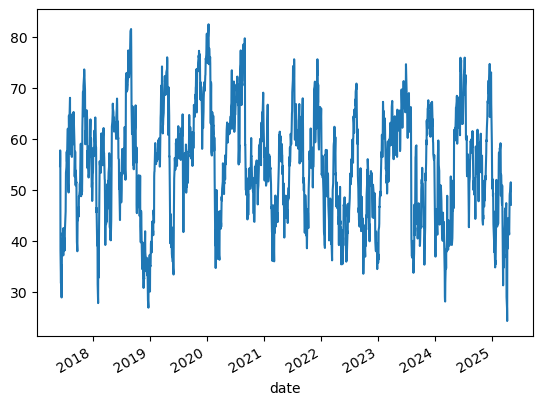

In [11]:
df.xs('AAPL',level=1)['rsi'].plot()

In [12]:
pandas_ta.bbands(close=df.xs("AAPL",level=1)['adj close'],length=20)

BBL_20_2.0  BBM_20_2.0  BBU_20_2.0  BBB_20_2.0  BBP_20_2.0
date                                                                  
2017-05-08         NaN         NaN         NaN         NaN         NaN
2017-05-09         NaN         NaN         NaN         NaN         NaN
2017-05-10         NaN         NaN         NaN         NaN         NaN
2017-05-11         NaN         NaN         NaN         NaN         NaN
2017-05-12         NaN         NaN         NaN         NaN         NaN
...                ...         ...         ...         ...         ...
2025-04-28  175.484639  201.164001  226.843364   25.530774    0.674771
2025-04-29  176.317652  200.618002  224.918351   24.225493    0.717939
2025-04-30  177.374438  200.083501  222.792565   22.699586    0.773382
2025-05-01  178.667794  199.555002  220.442210   20.933786    0.829508
2025-05-02  178.679614  199.663002  220.646390   21.018805    0.635512

[2009 rows x 5 columns]

In [13]:
df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log(x),length=20).iloc[:,0])
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log(x),length=20).iloc[:,1])
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log(x),length=20).iloc[:,2])

In [14]:
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-05-08 A        53.012112   56.320000   56.820000   55.930000   56.650002   
           AAPL     35.540585   38.252499   38.424999   37.257500   37.257500   
           ABBV     47.024109   66.209999   66.949997   66.139999   66.940002   
           ABT      38.763222   44.680000   44.900002   44.630001   44.700001   
           ACGL     30.511164   32.086666   32.503334   32.080002   32.366669   
...                       ...         ...         ...         ...         ...   
2025-05-02 XYL     124.250000  124.250000  125.269997  122.040001  122.660004   
           YUM     149.139999  149.139999  150.509995  147.429993  149.440002   
           ZBH     102.379997  102.379997  103.029999  101.070000  102.779999   
           ZBRA    255.949997  255.949997  259.040009  251.940002  254.690002   
           ZTS     157.440002  157.440002  159.970001  156.679993  158.490005   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2017-05-08 A         2190000.0         -0.001577        NaN       NaN   
           AAPL    195009600.0         -0.000384        NaN       NaN   
           ABBV      4497400.0         -0.048099        NaN       NaN   
           ABT       6320100.0         -0.007826        NaN       NaN   
           ACGL       836400.0         -0.001260        NaN       NaN   
...                        ...               ...        ...       ...   
2025-05-02 XYL       1834700.0          0.000277  60.611604  4.616166   
           YUM       1972000.0          0.000212  50.781898  4.947973   
           ZBH       3275100.0          0.000179  46.683720  4.561767   
           ZBRA       525800.0          0.000377  47.775706  5.351465   
           ZTS       2654700.0          0.000199  51.471957  4.968012   

Price                bb_mid   bb_high  
date       ticker                      
2017-05-08 A            NaN       NaN  
           AAPL         NaN       NaN  
           ABBV         NaN       NaN  
           ABT          NaN       NaN  
           ACGL         NaN       NaN  
...                     ...       ...  
2025-05-02 XYL     4.718187  4.820207  
           YUM     4.982390  5.016807  
           ZBH     4.617204  4.672641  
           ZBRA    5.456906  5.562348  
           ZTS     5.016229  5.064446  

[990725 rows x 11 columns]

In [15]:
#calculate ATR
def compute_atr(stock):
    atr = pandas_ta.atr(high=stock['high'],
                       low = stock['low'],
                       close = stock['close'],
                       length = 14)
    return atr.sub(atr.mean()).div(atr.std())

In [16]:
df['atr'] = df.groupby(level=1,group_keys=False).apply(compute_atr)
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-05-08 A        53.012112   56.320000   56.820000   55.930000   56.650002   
           AAPL     35.540585   38.252499   38.424999   37.257500   37.257500   
           ABBV     47.024109   66.209999   66.949997   66.139999   66.940002   
           ABT      38.763222   44.680000   44.900002   44.630001   44.700001   
           ACGL     30.511164   32.086666   32.503334   32.080002   32.366669   
...                       ...         ...         ...         ...         ...   
2025-05-02 XYL     124.250000  124.250000  125.269997  122.040001  122.660004   
           YUM     149.139999  149.139999  150.509995  147.429993  149.440002   
           ZBH     102.379997  102.379997  103.029999  101.070000  102.779999   
           ZBRA    255.949997  255.949997  259.040009  251.940002  254.690002   
           ZTS     157.440002  157.440002  159.970001  156.679993  158.490005   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2017-05-08 A         2190000.0         -0.001577        NaN       NaN   
           AAPL    195009600.0         -0.000384        NaN       NaN   
           ABBV      4497400.0         -0.048099        NaN       NaN   
           ABT       6320100.0         -0.007826        NaN       NaN   
           ACGL       836400.0         -0.001260        NaN       NaN   
...                        ...               ...        ...       ...   
2025-05-02 XYL       1834700.0          0.000277  60.611604  4.616166   
           YUM       1972000.0          0.000212  50.781898  4.947973   
           ZBH       3275100.0          0.000179  46.683720  4.561767   
           ZBRA       525800.0          0.000377  47.775706  5.351465   
           ZTS       2654700.0          0.000199  51.471957  4.968012   

Price                bb_mid   bb_high       atr  
date       ticker                                
2017-05-08 A            NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN  
           ABT          NaN       NaN       NaN  
           ACGL         NaN       NaN       NaN  
...                     ...       ...       ...  
2025-05-02 XYL     4.718187  4.820207  1.946075  
           YUM     4.982390  5.016807  2.346509  
           ZBH     4.617204  4.672641 -0.027441  
           ZBRA    5.456906  5.562348  1.086164  
           ZTS     5.016229  5.064446  1.020461  

[990725 rows x 12 columns]

In [17]:
#calculate MACD
def compute_macd(close):
    macd = pandas_ta.macd(close=close,length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())
df['macd'] = df.groupby(level=1,group_keys=False)['adj close'].apply(compute_macd)
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-05-08 A        53.012112   56.320000   56.820000   55.930000   56.650002   
           AAPL     35.540585   38.252499   38.424999   37.257500   37.257500   
           ABBV     47.024109   66.209999   66.949997   66.139999   66.940002   
           ABT      38.763222   44.680000   44.900002   44.630001   44.700001   
           ACGL     30.511164   32.086666   32.503334   32.080002   32.366669   
...                       ...         ...         ...         ...         ...   
2025-05-02 XYL     124.250000  124.250000  125.269997  122.040001  122.660004   
           YUM     149.139999  149.139999  150.509995  147.429993  149.440002   
           ZBH     102.379997  102.379997  103.029999  101.070000  102.779999   
           ZBRA    255.949997  255.949997  259.040009  251.940002  254.690002   
           ZTS     157.440002  157.440002  159.970001  156.679993  158.490005   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2017-05-08 A         2190000.0         -0.001577        NaN       NaN   
           AAPL    195009600.0         -0.000384        NaN       NaN   
           ABBV      4497400.0         -0.048099        NaN       NaN   
           ABT       6320100.0         -0.007826        NaN       NaN   
           ACGL       836400.0         -0.001260        NaN       NaN   
...                        ...               ...        ...       ...   
2025-05-02 XYL       1834700.0          0.000277  60.611604  4.616166   
           YUM       1972000.0          0.000212  50.781898  4.947973   
           ZBH       3275100.0          0.000179  46.683720  4.561767   
           ZBRA       525800.0          0.000377  47.775706  5.351465   
           ZTS       2654700.0          0.000199  51.471957  4.968012   

Price                bb_mid   bb_high       atr      macd  
date       ticker                                          
2017-05-08 A            NaN       NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN       NaN  
           ABT          NaN       NaN       NaN       NaN  
           ACGL         NaN       NaN       NaN       NaN  
...                     ...       ...       ...       ...  
2025-05-02 XYL     4.718187  4.820207  1.946075  0.396786  
           YUM     4.982390  5.016807  2.346509 -0.676401  
           ZBH     4.617204  4.672641 -0.027441 -0.554881  
           ZBRA    5.456906  5.562348  1.086164 -0.697822  
           ZTS     5.016229  5.064446  1.020461 -0.424243  

[990725 rows x 13 columns]

In [18]:
#dollar volume
df['dollar volume'] = (df['adj close']*df['volume'])/1000000
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-05-08 A        53.012112   56.320000   56.820000   55.930000   56.650002   
           AAPL     35.540585   38.252499   38.424999   37.257500   37.257500   
           ABBV     47.024109   66.209999   66.949997   66.139999   66.940002   
           ABT      38.763222   44.680000   44.900002   44.630001   44.700001   
           ACGL     30.511164   32.086666   32.503334   32.080002   32.366669   
...                       ...         ...         ...         ...         ...   
2025-05-02 XYL     124.250000  124.250000  125.269997  122.040001  122.660004   
           YUM     149.139999  149.139999  150.509995  147.429993  149.440002   
           ZBH     102.379997  102.379997  103.029999  101.070000  102.779999   
           ZBRA    255.949997  255.949997  259.040009  251.940002  254.690002   
           ZTS     157.440002  157.440002  159.970001  156.679993  158.490005   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2017-05-08 A         2190000.0         -0.001577        NaN       NaN   
           AAPL    195009600.0         -0.000384        NaN       NaN   
           ABBV      4497400.0         -0.048099        NaN       NaN   
           ABT       6320100.0         -0.007826        NaN       NaN   
           ACGL       836400.0         -0.001260        NaN       NaN   
...                        ...               ...        ...       ...   
2025-05-02 XYL       1834700.0          0.000277  60.611604  4.616166   
           YUM       1972000.0          0.000212  50.781898  4.947973   
           ZBH       3275100.0          0.000179  46.683720  4.561767   
           ZBRA       525800.0          0.000377  47.775706  5.351465   
           ZTS       2654700.0          0.000199  51.471957  4.968012   

Price                bb_mid   bb_high       atr      macd  dollar volume  
date       ticker                                                         
2017-05-08 A            NaN       NaN       NaN       NaN     116.096525  
           AAPL         NaN       NaN       NaN       NaN    6930.755180  
           ABBV         NaN       NaN       NaN       NaN     211.486227  
           ABT          NaN       NaN       NaN       NaN     244.987438  
           ACGL         NaN       NaN       NaN       NaN      25.519537  
...                     ...       ...       ...       ...            ...  
2025-05-02 XYL     4.718187  4.820207  1.946075  0.396786     227.961475  
           YUM     4.982390  5.016807  2.346509 -0.676401     294.104079  
           ZBH     4.617204  4.672641 -0.027441 -0.554881     335.304729  
           ZBRA    5.456906  5.562348  1.086164 -0.697822     134.578508  
           ZTS     5.016229  5.064446  1.020461 -0.424243     417.955974  

[990725 rows x 14 columns]

In [19]:
#aggregate on monthly level and filter top 150 MOST LIQUID stocks for each month
df.unstack('ticker')['dollar volume'].resample('M').mean()

ticker               A          AAPL         ABBV         ABNB          ABT  \
date                                                                          
2017-05-31  132.647821   4027.042036   279.817441          NaN   235.697505   
2017-06-30  109.548805   4274.139105   298.847275          NaN   302.877902   
2017-07-31   92.018445   2919.216399   258.186389          NaN   247.002309   
2017-08-31  109.160828   4267.423744   221.157779          NaN   190.536149   
2017-09-30   86.566973   5012.969661   590.508788          NaN   284.934834   
...                ...           ...          ...          ...          ...   
2025-01-31  256.430487  13992.581328  1078.091570   534.273254   868.919526   
2025-02-28  238.402096  10820.454264  1154.079570   917.107108   764.692697   
2025-03-31  259.507155  11803.442636  1468.864909   697.098575   995.526326   
2025-04-30  263.517685  15047.849328  1776.720811   717.702222   990.800443   
2025-05-31  146.964137  16489.889435  1200.532433  1292.637989  1093.880930   

ticker            ACGL          ACN         ADBE         ADI         ADM  ...  \
date                                                                      ...   
2017-05-31   30.168689   195.640636   316.803010  295.219440   98.348720  ...   
2017-06-30   69.558512   283.467956   487.187568  343.324389   95.382529  ...   
2017-07-31   42.369787   188.725551   258.590292  153.540657   99.307658  ...   
2017-08-31   38.328294   172.058045   223.901787  157.546495  103.373759  ...   
2017-09-30   64.275965   304.429530   416.120707  178.608658   99.081193  ...   
...                ...          ...          ...         ...         ...  ...   
2025-01-31  182.337957   992.314523  1717.593976  711.596571  154.728025  ...   
2025-02-28  174.178041  1045.438086  1306.045270  988.115014  210.934733  ...   
2025-03-31  159.570252  1353.909013  1812.447386  764.615805  294.640615  ...   
2025-04-30  161.530449  1075.559872  1519.368709  979.784042  167.236844  ...   
2025-05-31  157.282373   704.368515   979.374178  710.098258  117.833547  ...   

ticker             WTW          WY        WYNN         XEL          XOM  \
date                                                                      
2017-05-31  143.774375   62.277342  217.018199   84.351780   558.494638   
2017-06-30  141.563787   74.375388  221.649557  102.092466   788.632910   
2017-07-31   71.729385   88.884052  289.539225  106.014938   566.486541   
2017-08-31  103.092023   57.502570  229.959333   78.251026   535.484110   
2017-09-30  136.130522   81.584621  206.992233  109.354252   609.881724   
...                ...         ...         ...         ...          ...   
2025-01-31  148.385744  106.599906  198.621158  240.438857  1663.610742   
2025-02-28  213.881111  105.946353  280.613108  231.618207  1583.141033   
2025-03-31  196.539284  110.970963  184.566946  277.042892  2065.569879   
2025-04-30  280.877191  115.873870  226.050034  294.213210  2005.858428   
2025-05-31  183.920981   95.994465  136.791953  255.687799  1864.880548   

ticker             XYL         YUM         ZBH        ZBRA         ZTS  
date                                                                    
2017-05-31   53.838737  144.170430  160.803296   41.348596  165.896450  
2017-06-30   62.720315  130.421354  136.336823   41.822088  151.318327  
2017-07-31   64.723143  122.185545  213.550173   31.212322  129.402211  
2017-08-31   47.177687  114.504701  149.910793   40.547845  133.809669  
2017-09-30   51.202388  137.134041  133.149125   31.077417  124.255889  
...                ...         ...         ...         ...         ...  
2025-01-31  145.424888  250.067452  187.375738  155.049799  446.820752  
2025-02-28  206.906105  359.970540  212.709797  262.678572  642.215566  
2025-03-31  201.021674  336.219606  196.234097  166.156832  414.560876  
2025-04-30  261.993113  407.054752  234.939201  200.772721  457.404349  
2025-05-31  224.460950  350.232828  238.962001  130.672850  359.20

In [20]:
a = df.unstack('ticker')['dollar volume'].resample('M').mean().stack('ticker').to_frame('dollar volume')
a

dollar volume
date       ticker               
2017-05-31 A          132.647821
           AAPL      4027.042036
           ABBV       279.817441
           ABT        235.697505
           ACGL        30.168689
...                          ...
2025-05-31 XYL        224.460950
           YUM        350.232828
           ZBH        238.962001
           ZBRA       130.672850
           ZTS        359.203579

[47851 rows x 1 columns]

In [21]:
last_col = [x for x in df.columns.unique(0) if x not in ['dollar volume','high','low','close','volume','open']]
last_col

['adj close',
 'garman_klass_vol',
 'rsi',
 'bb_low',
 'bb_mid',
 'bb_high',
 'atr',
 'macd']

In [22]:
b = df.unstack()[last_col].resample("M").last().stack('ticker')
b

Price               adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2017-05-31 A        56.796001         -0.000550        NaN       NaN   
           AAPL     35.628975         -0.002240        NaN       NaN   
           ABBV     46.889164         -0.046038        NaN       NaN   
           ABT      39.613441         -0.006645        NaN       NaN   
           ACGL     30.824963          0.000096        NaN       NaN   
...                       ...               ...        ...       ...   
2025-05-31 XYL     124.250000          0.000277  60.611604  4.616166   
           YUM     149.139999          0.000212  50.781898  4.947973   
           ZBH     102.379997          0.000179  46.683720  4.561767   
           ZBRA    255.949997          0.000377  47.775706  5.351465   
           ZTS     157.440002          0.000199  51.471957  4.968012   

Price                bb_mid   bb_high       atr      macd  
date       ticker                                          
2017-05-31 A            NaN       NaN -1.321886       NaN  
           AAPL         NaN       NaN -1.392547       NaN  
           ABBV         NaN       NaN -1.784629       NaN  
           ABT          NaN       NaN -1.651458       NaN  
           ACGL         NaN       NaN -1.206533       NaN  
...                     ...       ...       ...       ...  
2025-05-31 XYL     4.718187  4.820207  1.946075  0.396786  
           YUM     4.982390  5.016807  2.346509 -0.676401  
           ZBH     4.617204  4.672641 -0.027441 -0.554881  
           ZBRA    5.456906  5.562348  1.086164 -0.697822  
           ZTS     5.016229  5.064446  1.020461 -0.424243  

[47851 rows x 8 columns]

In [23]:
data = pd.concat([a,b],axis=1).dropna()
data

dollar volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2017-06-30 A          109.548805   55.950840         -0.001012  53.616605   
           AAPL      4274.139105   33.590511         -0.001991  39.743000   
           ABBV       298.847275   51.498547         -0.045411  73.147108   
           ABT        302.877902   42.172791         -0.008142  68.234697   
           ACGL        69.558512   29.569775         -0.001103  42.175228   
...                          ...         ...               ...        ...   
2025-05-31 XYL        224.460950  124.250000          0.000277  60.611604   
           YUM        350.232828  149.139999          0.000212  50.781898   
           ZBH        238.962001  102.379997          0.000179  46.683720   
           ZBRA       130.672850  255.949997          0.000377  47.775706   
           ZTS        359.203579  157.440002          0.000199  51.471957   

                     bb_low    bb_mid   bb_high       atr      macd  
date       ticker                                                    
2017-06-30 A       4.009363  4.028591  4.047820 -1.536208  0.071112  
           AAPL    3.482223  3.535608  3.588994 -1.281501 -0.456301  
           ABBV    3.869374  3.917882  3.966390 -1.688001  0.327924  
           ABT     3.690647  3.729098  3.767549 -1.660455  0.493708  
           ACGL    3.368843  3.397223  3.425603 -1.176716 -0.418181  
...                     ...       ...       ...       ...       ...  
2025-05-31 XYL     4.616166  4.718187  4.820207  1.946075  0.396786  
           YUM     4.947973  4.982390  5.016807  2.346509 -0.676401  
           ZBH     4.561767  4.617204  4.672641 -0.027441 -0.554881  
           ZBRA    5.351465  5.456906  5.562348  1.086164 -0.697822  
           ZTS     4.968012  5.016229  5.064446  1.020461 -0.424243  

[47345 rows x 9 columns]

In [24]:
#calculate 5 year rolling average dollar volume for each stock
# then use aggregated volume to filter out top 150 most liquid stocks for each month

In [25]:
data['dollar volume'] = data.loc[:,'dollar volume'].unstack('ticker').rolling(5*12,min_periods=12).mean().stack()
data

dollar volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2017-06-30 A                 NaN   55.950840         -0.001012  53.616605   
           AAPL              NaN   33.590511         -0.001991  39.743000   
           ABBV              NaN   51.498547         -0.045411  73.147108   
           ABT               NaN   42.172791         -0.008142  68.234697   
           ACGL              NaN   29.569775         -0.001103  42.175228   
...                          ...         ...               ...        ...   
2025-05-31 XYL        131.115204  124.250000          0.000277  60.611604   
           YUM        211.258383  149.139999          0.000212  50.781898   
           ZBH        179.763591  102.379997          0.000179  46.683720   
           ZBRA       130.745095  255.949997          0.000377  47.775706   
           ZTS        355.485523  157.440002          0.000199  51.471957   

                     bb_low    bb_mid   bb_high       atr      macd  
date       ticker                                                    
2017-06-30 A       4.009363  4.028591  4.047820 -1.536208  0.071112  
           AAPL    3.482223  3.535608  3.588994 -1.281501 -0.456301  
           ABBV    3.869374  3.917882  3.966390 -1.688001  0.327924  
           ABT     3.690647  3.729098  3.767549 -1.660455  0.493708  
           ACGL    3.368843  3.397223  3.425603 -1.176716 -0.418181  
...                     ...       ...       ...       ...       ...  
2025-05-31 XYL     4.616166  4.718187  4.820207  1.946075  0.396786  
           YUM     4.947973  4.982390  5.016807  2.346509 -0.676401  
           ZBH     4.561767  4.617204  4.672641 -0.027441 -0.554881  
           ZBRA    5.351465  5.456906  5.562348  1.086164 -0.697822  
           ZTS     4.968012  5.016229  5.064446  1.020461 -0.424243  

[47345 rows x 9 columns]

In [26]:
#dollar volume rank cross sectionally for each month
data['dollar vol rank'] = data.groupby(level=0)['dollar volume'].rank(ascending=False)
data

dollar volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2017-06-30 A                 NaN   55.950840         -0.001012  53.616605   
           AAPL              NaN   33.590511         -0.001991  39.743000   
           ABBV              NaN   51.498547         -0.045411  73.147108   
           ABT               NaN   42.172791         -0.008142  68.234697   
           ACGL              NaN   29.569775         -0.001103  42.175228   
...                          ...         ...               ...        ...   
2025-05-31 XYL        131.115204  124.250000          0.000277  60.611604   
           YUM        211.258383  149.139999          0.000212  50.781898   
           ZBH        179.763591  102.379997          0.000179  46.683720   
           ZBRA       130.745095  255.949997          0.000377  47.775706   
           ZTS        355.485523  157.440002          0.000199  51.471957   

                     bb_low    bb_mid   bb_high       atr      macd  \
date       ticker                                                     
2017-06-30 A       4.009363  4.028591  4.047820 -1.536208  0.071112   
           AAPL    3.482223  3.535608  3.588994 -1.281501 -0.456301   
           ABBV    3.869374  3.917882  3.966390 -1.688001  0.327924   
           ABT     3.690647  3.729098  3.767549 -1.660455  0.493708   
           ACGL    3.368843  3.397223  3.425603 -1.176716 -0.418181   
...                     ...       ...       ...       ...       ...   
2025-05-31 XYL     4.616166  4.718187  4.820207  1.946075  0.396786   
           YUM     4.947973  4.982390  5.016807  2.346509 -0.676401   
           ZBH     4.561767  4.617204  4.672641 -0.027441 -0.554881   
           ZBRA    5.351465  5.456906  5.562348  1.086164 -0.697822   
           ZTS     4.968012  5.016229  5.064446  1.020461 -0.424243   

                   dollar vol rank  
date       ticker                   
2017-06-30 A                   NaN  
           AAPL                NaN  
           ABBV                NaN  
           ABT                 NaN  
           ACGL                NaN  
...                            ...  
2025-05-31 XYL               388.0  
           YUM               272.0  
           ZBH               308.0  
           ZBRA              389.0  
           ZTS               153.0  

[47345 rows x 10 columns]

In [27]:
#for rank less than 150 each month
data[data['dollar vol rank']<150]

dollar volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2018-05-31 AAPL      4758.165192   44.262138         -0.001143  59.945521   
           ABBV       455.385282   72.653084         -0.041405  46.193241   
           ABT        303.989646   54.458668         -0.006269  54.184932   
           ACN        268.855031  140.315765         -0.004265  53.108555   
           ADBE       491.930655  249.279999          0.000167  67.105805   
...                          ...         ...               ...        ...   
2025-05-31 VZ         777.898120   43.740002          0.000073  53.350193   
           WDAY       477.583652  248.679993          0.000071  55.871919   
           WFC       1018.326167   73.800003          0.000108  58.896230   
           WMT       1143.239784   98.750000          0.000071  61.429937   
           XOM       1622.111356  106.209999          0.000792  46.215167   

                     bb_low    bb_mid   bb_high       atr      macd  \
date       ticker                                                     
2018-05-31 AAPL    3.757995  3.788536  3.819078 -1.247197  0.085839   
           ABBV    4.274361  4.324528  4.374696  0.077010  0.017561   
           ABT     3.942605  3.986208  4.029811 -1.079834  0.209452   
           ACN     4.917949  4.937818  4.957687 -1.145693 -0.003756   
           ADBE    5.427534  5.475871  5.524208 -1.171476  0.460533   
...                     ...       ...       ...       ...       ...   
2025-05-31 VZ      3.723617  3.762213  3.800809  0.978101  0.041286   
           WDAY    5.338911  5.436849  5.534786  1.007397  0.247602   
           WFC     4.082285  4.194221  4.306156  3.559631  0.590599   
           WMT     4.423785  4.527380  4.630976  4.322989  2.670565   
           XOM     4.608551  4.657160  4.705769  1.912694 -0.856994   

                   dollar vol rank  
date       ticker                   
2018-05-31 AAPL                2.0  
           ABBV               56.0  
           ABT                92.0  
           ACN               111.0  
           ADBE               50.0  
...                            ...  
2025-05-31 VZ                 60.0  
           WDAY              111.0  
           WFC                38.0  
           WMT                34.0  
           XOM                17.0  

[12665 rows x 10 columns]

In [28]:
#dropping dollar vol and ranks since we dont need it for training purpose
data = data[data['dollar vol rank']<150].drop(['dollar volume','dollar vol rank'],axis=1)
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2018-05-31 AAPL     44.262138         -0.001143  59.945521  3.757995   
           ABBV     72.653084         -0.041405  46.193241  4.274361   
           ABT      54.458668         -0.006269  54.184932  3.942605   
           ACN     140.315765         -0.004265  53.108555  4.917949   
           ADBE    249.279999          0.000167  67.105805  5.427534   
...                       ...               ...        ...       ...   
2025-05-31 VZ       43.740002          0.000073  53.350193  3.723617   
           WDAY    248.679993          0.000071  55.871919  5.338911   
           WFC      73.800003          0.000108  58.896230  4.082285   
           WMT      98.750000          0.000071  61.429937  4.423785   
           XOM     106.209999          0.000792  46.215167  4.608551   

                     bb_mid   bb_high       atr      macd  
date       ticker                                          
2018-05-31 AAPL    3.788536  3.819078 -1.247197  0.085839  
           ABBV    4.324528  4.374696  0.077010  0.017561  
           ABT     3.986208  4.029811 -1.079834  0.209452  
           ACN     4.937818  4.957687 -1.145693 -0.003756  
           ADBE    5.475871  5.524208 -1.171476  0.460533  
...                     ...       ...       ...       ...  
2025-05-31 VZ      3.762213  3.800809  0.978101  0.041286  
           WDAY    5.436849  5.534786  1.007397  0.247602  
           WFC     4.194221  4.306156  3.559631  0.590599  
           WMT     4.527380  4.630976  4.322989  2.670565  
           XOM     4.657160  4.705769  1.912694 -0.856994  

[12665 rows x 8 columns]

In [29]:
#calculate monthly returns for different time horizons and add them as features

In [30]:
g = df.xs('AAPL',level=1)
g

Price        adj close       close        high         low        open  \
date                                                                     
2017-05-08   35.540585   38.252499   38.424999   37.257500   37.257500   
2017-05-09   35.768234   38.497501   38.720001   38.362499   38.467499   
2017-05-10   35.598675   38.314999   38.485001   38.027500   38.407501   
2017-05-11   35.906544   38.487499   38.517502   38.077499   38.112499   
2017-05-12   36.407997   39.025002   39.105000   38.667500   38.674999   
...                ...         ...         ...         ...         ...   
2025-04-28  210.139999  210.139999  211.500000  207.460007  210.000000   
2025-04-29  211.210007  211.210007  212.240005  208.369995  208.690002   
2025-04-30  212.500000  212.500000  213.580002  206.669998  209.300003   
2025-05-01  213.320007  213.320007  214.559998  208.899994  209.080002   
2025-05-02  205.350006  205.350006  206.990005  202.160004  206.089996   

Price            volume  garman_klass_vol        rsi    bb_low    bb_mid  \
date                                                                       
2017-05-08  195009600.0         -0.000384        NaN       NaN       NaN   
2017-05-09  156521600.0         -0.002002        NaN       NaN       NaN   
2017-05-10  103222800.0         -0.002156        NaN       NaN       NaN   
2017-05-11  109020400.0         -0.001307        NaN       NaN       NaN   
2017-05-12  130108000.0         -0.001346        NaN       NaN       NaN   
...                 ...               ...        ...       ...       ...   
2025-04-28   38743100.0          0.000186  49.748224  5.173533  5.302066   
2025-04-29   36827600.0          0.000114  50.302570  5.177222  5.299546   
2025-04-30   52286500.0          0.000452  50.988695  5.181805  5.297092   
2025-05-01   57365700.0          0.000202  51.437314  5.187300  5.294674   
2025-05-02  101010600.0          0.000274  47.032782  5.187348  5.295202   

Price        bb_high       atr      macd  dollar volume  
date                                                     
2017-05-08       NaN       NaN       NaN    6930.755180  
2017-05-09       NaN       NaN       NaN    5598.501254  
2017-05-10       NaN       NaN       NaN    3674.594886  
2017-05-11       NaN       NaN       NaN    3914.545760  
2017-05-12       NaN       NaN       NaN    4736.971691  
...              ...       ...       ...            ...  
2025-04-28  5.430600  3.495600 -1.412254    8141.475010  
2025-04-29  5.421870  3.287805 -1.080046    7778.357643  
2025-04-30  5.412379  3.220778 -0.769379   11110.881250  
2025-05-01  5.402047  3.106760 -0.494004   12237.251544  
2025-05-02  5.403057  3.228711 -0.527598   20742.527327  

[2009 rows x 14 columns]

In [31]:
outlier_cutoff = 0.005
lags = [1,2,3,6,9,12]
for lag in lags:
    g[f'return_{lag}_M'] = (g['adj close'].pct_change(lag)
                            .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff)
                                                 ,upper=x.quantile(1-outlier_cutoff)))
                           .add(1)
                           .pow(1/lag)
                           .sub(1))
g

Price        adj close       close        high         low        open  \
date                                                                     
2017-05-08   35.540585   38.252499   38.424999   37.257500   37.257500   
2017-05-09   35.768234   38.497501   38.720001   38.362499   38.467499   
2017-05-10   35.598675   38.314999   38.485001   38.027500   38.407501   
2017-05-11   35.906544   38.487499   38.517502   38.077499   38.112499   
2017-05-12   36.407997   39.025002   39.105000   38.667500   38.674999   
...                ...         ...         ...         ...         ...   
2025-04-28  210.139999  210.139999  211.500000  207.460007  210.000000   
2025-04-29  211.210007  211.210007  212.240005  208.369995  208.690002   
2025-04-30  212.500000  212.500000  213.580002  206.669998  209.300003   
2025-05-01  213.320007  213.320007  214.559998  208.899994  209.080002   
2025-05-02  205.350006  205.350006  206.990005  202.160004  206.089996   

Price            volume  garman_klass_vol        rsi    bb_low    bb_mid  \
date                                                                       
2017-05-08  195009600.0         -0.000384        NaN       NaN       NaN   
2017-05-09  156521600.0         -0.002002        NaN       NaN       NaN   
2017-05-10  103222800.0         -0.002156        NaN       NaN       NaN   
2017-05-11  109020400.0         -0.001307        NaN       NaN       NaN   
2017-05-12  130108000.0         -0.001346        NaN       NaN       NaN   
...                 ...               ...        ...       ...       ...   
2025-04-28   38743100.0          0.000186  49.748224  5.173533  5.302066   
2025-04-29   36827600.0          0.000114  50.302570  5.177222  5.299546   
2025-04-30   52286500.0          0.000452  50.988695  5.181805  5.297092   
2025-05-01   57365700.0          0.000202  51.437314  5.187300  5.294674   
2025-05-02  101010600.0          0.000274  47.032782  5.187348  5.295202   

Price        bb_high       atr      macd  dollar volume  return_1_M  \
date                                                                  
2017-05-08       NaN       NaN       NaN    6930.755180         NaN   
2017-05-09       NaN       NaN       NaN    5598.501254    0.006405   
2017-05-10       NaN       NaN       NaN    3674.594886   -0.004741   
2017-05-11       NaN       NaN       NaN    3914.545760    0.008648   
2017-05-12       NaN       NaN       NaN    4736.971691    0.013966   
...              ...       ...       ...            ...         ...   
2025-04-28  5.430600  3.495600 -1.412254    8141.475010    0.004109   
2025-04-29  5.421870  3.287805 -1.080046    7778.357643    0.005092   
2025-04-30  5.412379  3.220778 -0.769379   11110.881250    0.006108   
2025-05-01  5.402047  3.106760 -0.494004   12237.251544    0.003859   
2025-05-02  5.403057  3.228711 -0.527598   20742.527327   -0.037362   

Price       return_2_M  return_3_M  return_6_M  return_9_M  return_12_M  
date                                                                     
2017-05-08         NaN         NaN         NaN         NaN          NaN  
2017-05-09         NaN         NaN         NaN         NaN          NaN  
2017-05-10    0.000817         NaN         NaN         NaN          NaN  
2017-05-11    0.001932    0.003421         NaN         NaN          NaN  
2017-05-12    0.011303    0.005927         NaN         NaN          NaN  
...                ...         ...         ...         ...          ...  
2025-04-28    0.004238    0.008945    0.010837    0.004112     0.004613  
2025-04-29    0.004600    0.004523    0.015000    0.004889     0.008672  
2025-04-30    0.005600    0.005103    0.010374    0.010016     0.005843  
2025-05-01    0.004983    0.005019    0.006980    0.008894     0.004339  
2025-05-02   -0.016967   -0.009335   -0.002430    0.006823     0.001314  

[2009 rows x 20 columns]

In [32]:
def calculate_returns(df):
    outlier_cutoff = 0.005
    lags = [1,2,3,6,9,12]
    for lag in lags:
        df[f'return_{lag}_M'] = (df['adj close'].pct_change(lag)
                                .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff)
                                                     ,upper=x.quantile(1-outlier_cutoff)))
                               .add(1)
                               .pow(1/lag)
                               .sub(1))
    return df
    

In [33]:
data = data.groupby(level=1,group_keys=False).apply(calculate_returns).dropna()
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2019-05-31 AAPL     42.098404         -0.000655  34.632858  3.706776   
           ABBV     58.990608         -0.028138  40.509163  4.070259   
           ABT      68.556503         -0.004000  47.744496  4.208403   
           ACN     163.241577         -0.002625  54.904803  5.060080   
           ADBE    270.899994          0.000117  47.431756  5.592042   
...                       ...               ...        ...       ...   
2025-05-31 VZ       43.740002          0.000073  53.350193  3.723617   
           WDAY    248.679993          0.000071  55.871919  5.338911   
           WFC      73.800003          0.000108  58.896230  4.082285   
           WMT      98.750000          0.000071  61.429937  4.423785   
           XOM     106.209999          0.000792  46.215167  4.608551   

                     bb_mid   bb_high       atr      macd  return_1_M  \
date       ticker                                                       
2019-05-31 AAPL    3.816227  3.925678 -0.988587 -0.784074   -0.124213   
           ABBV    4.104260  4.138262 -1.010808 -0.346655   -0.033757   
           ABT     4.231830  4.255256 -0.772410 -0.474817   -0.043112   
           ACN     5.087628  5.115176 -1.021937  0.002453   -0.025182   
           ADBE    5.623627  5.655213 -0.965742 -0.103174   -0.063440   
...                     ...       ...       ...       ...         ...   
2025-05-31 VZ      3.762213  3.800809  0.978101  0.041286   -0.007263   
           WDAY    5.436849  5.534786  1.007397  0.247602    0.015020   
           WFC     4.194221  4.306156  3.559631  0.590599    0.039290   
           WMT     4.527380  4.630976  4.322989  2.670565    0.015424   
           XOM     4.657160  4.705769  1.912694 -0.856994    0.005491   

                   return_2_M  return_3_M  return_6_M  return_9_M  return_12_M  
date       ticker                                                               
2019-05-31 AAPL     -0.038120    0.004969   -0.001953   -0.027496    -0.004168  
           ABBV     -0.017923   -0.006405   -0.029679   -0.020684    -0.017210  
           ABT      -0.022126   -0.005086    0.006087    0.016011     0.019370  
           ACN       0.009963    0.036194    0.014672    0.007720     0.012691  
           ADBE      0.008240    0.010555    0.012871    0.003078     0.006955  
...                       ...         ...         ...         ...          ...  
2025-05-31 VZ       -0.010165    0.010277    0.003318    0.010593     0.010577  
           WDAY      0.031927   -0.018912   -0.000875   -0.006281     0.013607  
           WFC       0.013903   -0.019620   -0.004437    0.027427     0.019065  
           WMT       0.060586    0.001388    0.011792    0.028254     0.035135  
           XOM      -0.054989   -0.015571   -0.015876   -0.009694    -0.006137  

[10476 rows x 14 columns]

In [34]:
#fama french and rolling factor betas
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
              'famafrench',
              start='2010')[0].drop('RF',axis=1) #drop risk free factor as it is unneeded for now
factor_data

Mkt-RF   SMB   HML   RMW   CMA
Date                                   
2010-01   -3.36  0.34  0.43 -1.27  0.46
2010-02    3.40  1.51  3.22 -0.27  1.42
2010-03    6.31  1.85  2.21 -0.65  1.69
2010-04    2.00  4.98  2.89  0.69  1.72
2010-05   -7.89  0.05 -2.44  1.30 -0.22
...         ...   ...   ...   ...   ...
2024-08    1.61 -3.65 -1.13  0.85  0.86
2024-09    1.74 -1.02 -2.59  0.04 -0.26
2024-10   -0.97 -0.88  0.89 -1.38  1.03
2024-11    6.51  4.78 -0.05 -2.62 -2.17
2024-12   -3.17 -3.87 -2.95  1.82 -1.10

[180 rows x 5 columns]

In [35]:
factor_data.index = factor_data.index.to_timestamp()
factor_data #our data is in for end of month so fix that, also these are in percentages, so convert to normal

Mkt-RF   SMB   HML   RMW   CMA
Date                                      
2010-01-01   -3.36  0.34  0.43 -1.27  0.46
2010-02-01    3.40  1.51  3.22 -0.27  1.42
2010-03-01    6.31  1.85  2.21 -0.65  1.69
2010-04-01    2.00  4.98  2.89  0.69  1.72
2010-05-01   -7.89  0.05 -2.44  1.30 -0.22
...            ...   ...   ...   ...   ...
2024-08-01    1.61 -3.65 -1.13  0.85  0.86
2024-09-01    1.74 -1.02 -2.59  0.04 -0.26
2024-10-01   -0.97 -0.88  0.89 -1.38  1.03
2024-11-01    6.51  4.78 -0.05 -2.62 -2.17
2024-12-01   -3.17 -3.87 -2.95  1.82 -1.10

[180 rows x 5 columns]

In [36]:
factor_data = factor_data.resample('M').last().div(100) #div by 100 to convert to value instead of percentage

In [37]:
factor_data
#join with 1 month return with previous data

Mkt-RF     SMB     HML     RMW     CMA
Date                                              
2010-01-31 -0.0336  0.0034  0.0043 -0.0127  0.0046
2010-02-28  0.0340  0.0151  0.0322 -0.0027  0.0142
2010-03-31  0.0631  0.0185  0.0221 -0.0065  0.0169
2010-04-30  0.0200  0.0498  0.0289  0.0069  0.0172
2010-05-31 -0.0789  0.0005 -0.0244  0.0130 -0.0022
...            ...     ...     ...     ...     ...
2024-08-31  0.0161 -0.0365 -0.0113  0.0085  0.0086
2024-09-30  0.0174 -0.0102 -0.0259  0.0004 -0.0026
2024-10-31 -0.0097 -0.0088  0.0089 -0.0138  0.0103
2024-11-30  0.0651  0.0478 -0.0005 -0.0262 -0.0217
2024-12-31 -0.0317 -0.0387 -0.0295  0.0182 -0.0110

[180 rows x 5 columns]

In [38]:
factor_data.index.name = 'date' #index names should match for a sucessful join
factor_data = factor_data.join(data['return_1_M']).sort_index()

In [39]:
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1_M
date       ticker                                                    
2019-05-31 AAPL   -0.0694 -0.0159 -0.0237 -0.0046  0.0177   -0.124213
           ABBV   -0.0694 -0.0159 -0.0237 -0.0046  0.0177   -0.033757
           ABT    -0.0694 -0.0159 -0.0237 -0.0046  0.0177   -0.043112
           ACN    -0.0694 -0.0159 -0.0237 -0.0046  0.0177   -0.025182
           ADBE   -0.0694 -0.0159 -0.0237 -0.0046  0.0177   -0.063440
...                   ...     ...     ...     ...     ...         ...
2024-12-31 VZ     -0.0317 -0.0387 -0.0295  0.0182 -0.0110   -0.096744
           WDAY   -0.0317 -0.0387 -0.0295  0.0182 -0.0110    0.032161
           WFC    -0.0317 -0.0387 -0.0295  0.0182 -0.0110   -0.077852
           WMT    -0.0317 -0.0387 -0.0295  0.0182 -0.0110   -0.021079
           XOM    -0.0317 -0.0387 -0.0295  0.0182 -0.0110   -0.088081

[9772 rows x 6 columns]

In [40]:
factor_data.xs('AAPL',level=1).head()

Mkt-RF     SMB     HML     RMW     CMA  return_1_M
date                                                          
2019-05-31 -0.0694 -0.0159 -0.0237 -0.0046  0.0177   -0.124213
2019-06-30  0.0693  0.0037 -0.0070  0.0090 -0.0044    0.130519
2019-07-31  0.0119 -0.0178  0.0047 -0.0007  0.0034    0.076394
2019-08-31 -0.0258 -0.0324 -0.0479  0.0056 -0.0068   -0.016461
2019-09-30  0.0143  0.0026  0.0677  0.0184  0.0339    0.072961

In [41]:
factor_data.xs('MSFT',level=1).head()

Mkt-RF     SMB     HML     RMW     CMA  return_1_M
date                                                          
2019-05-31 -0.0694 -0.0159 -0.0237 -0.0046  0.0177   -0.049481
2019-06-30  0.0693  0.0037 -0.0070  0.0090 -0.0044    0.083118
2019-07-31  0.0119 -0.0178  0.0047 -0.0007  0.0034    0.017244
2019-08-31 -0.0258 -0.0324 -0.0479  0.0056 -0.0068    0.015037
2019-09-30  0.0143  0.0026  0.0677  0.0184  0.0339    0.008487

In [42]:
#filter stocks which have less than 10 month data, because we are going to use rolling ols regression
#with time windows of 2 years

In [43]:
observations = factor_data.groupby(level=1).size()
observations

ticker
AAPL    68
ABBV    68
ABNB    25
ABT     68
ACN     68
        ..
WDC     39
WFC     68
WMT     68
WYNN    50
XOM     68
Length: 174, dtype: int64

In [44]:
valid_stocks = observations[observations >= 10]
valid_stocks

ticker
AAPL    68
ABBV    68
ABNB    25
ABT     68
ACN     68
        ..
WDC     39
WFC     68
WMT     68
WYNN    50
XOM     68
Length: 164, dtype: int64

In [45]:
factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1_M
date       ticker                                                    
2019-05-31 AAPL   -0.0694 -0.0159 -0.0237 -0.0046  0.0177   -0.124213
           ABBV   -0.0694 -0.0159 -0.0237 -0.0046  0.0177   -0.033757
           ABT    -0.0694 -0.0159 -0.0237 -0.0046  0.0177   -0.043112
           ACN    -0.0694 -0.0159 -0.0237 -0.0046  0.0177   -0.025182
           ADBE   -0.0694 -0.0159 -0.0237 -0.0046  0.0177   -0.063440
...                   ...     ...     ...     ...     ...         ...
2024-12-31 VZ     -0.0317 -0.0387 -0.0295  0.0182 -0.0110   -0.096744
           WDAY   -0.0317 -0.0387 -0.0295  0.0182 -0.0110    0.032161
           WFC    -0.0317 -0.0387 -0.0295  0.0182 -0.0110   -0.077852
           WMT    -0.0317 -0.0387 -0.0295  0.0182 -0.0110   -0.021079
           XOM    -0.0317 -0.0387 -0.0295  0.0182 -0.0110   -0.088081

[9728 rows x 6 columns]

In [46]:
#calculate rolling factor betas
betas = factor_data.groupby(level=1,
                   group_keys=False).apply(lambda x: RollingOLS(endog=x['return_1_M'],
                                                                exog=sm.add_constant(x.drop('return_1_M',axis=1)),
                                                               window=min(24,x.shape[0]),#for stocks with >10 month but less than 24
                                                               min_nobs=len(x.columns)+1).fit(params_only=True).params.drop('const',axis=1))
betas

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2019-05-31 AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
           ADBE         NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2024-12-31 VZ      1.221471 -0.867782  0.802730  0.672703 -0.497234
           WDAY    0.979394 -1.334232  0.613028 -2.276787 -1.606166
           WFC     0.426388  0.043775  0.866022 -2.252677 -0.077334
           WMT     0.740233  0.331348 -0.559872  1.171454  0.734966
           XOM     0.693089  0.041713  0.255467  1.165575  0.737647

[9728 rows x 5 columns]

In [47]:
betas.groupby('ticker').shift()

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2019-05-31 AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
           ADBE         NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2024-12-31 VZ      0.885476 -0.606698  0.299046  0.505454  0.276615
           WDAY    0.760261 -1.023756  0.151963 -2.488470 -0.729054
           WFC     0.723370 -0.312743  1.430126 -2.012817 -1.095361
           WMT     0.844683  0.175306 -0.332489  1.278248  0.295495
           XOM     0.614501  0.031072  0.205460  1.178935  0.728171

[9728 rows x 5 columns]

In [48]:
data = data.join(betas.groupby('ticker').shift())
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2019-05-31 AAPL     42.098404         -0.000655  34.632858  3.706776   
           ABBV     58.990608         -0.028138  40.509163  4.070259   
           ABT      68.556503         -0.004000  47.744496  4.208403   
           ACN     163.241577         -0.002625  54.904803  5.060080   
           ADBE    270.899994          0.000117  47.431756  5.592042   
...                       ...               ...        ...       ...   
2025-05-31 VZ       43.740002          0.000073  53.350193  3.723617   
           WDAY    248.679993          0.000071  55.871919  5.338911   
           WFC      73.800003          0.000108  58.896230  4.082285   
           WMT      98.750000          0.000071  61.429937  4.423785   
           XOM     106.209999          0.000792  46.215167  4.608551   

                     bb_mid   bb_high       atr      macd  return_1_M  \
date       ticker                                                       
2019-05-31 AAPL    3.816227  3.925678 -0.988587 -0.784074   -0.124213   
           ABBV    4.104260  4.138262 -1.010808 -0.346655   -0.033757   
           ABT     4.231830  4.255256 -0.772410 -0.474817   -0.043112   
           ACN     5.087628  5.115176 -1.021937  0.002453   -0.025182   
           ADBE    5.623627  5.655213 -0.965742 -0.103174   -0.063440   
...                     ...       ...       ...       ...         ...   
2025-05-31 VZ      3.762213  3.800809  0.978101  0.041286   -0.007263   
           WDAY    5.436849  5.534786  1.007397  0.247602    0.015020   
           WFC     4.194221  4.306156  3.559631  0.590599    0.039290   
           WMT     4.527380  4.630976  4.322989  2.670565    0.015424   
           XOM     4.657160  4.705769  1.912694 -0.856994    0.005491   

                   return_2_M  return_3_M  return_6_M  return_9_M  \
date       ticker                                                   
2019-05-31 AAPL     -0.038120    0.004969   -0.001953   -0.027496   
           ABBV     -0.017923   -0.006405   -0.029679   -0.020684   
           ABT      -0.022126   -0.005086    0.006087    0.016011   
           ACN       0.009963    0.036194    0.014672    0.007720   
           ADBE      0.008240    0.010555    0.012871    0.003078   
...                       ...         ...         ...         ...   
2025-05-31 VZ       -0.010165    0.010277    0.003318    0.010593   
           WDAY      0.031927   -0.018912   -0.000875   -0.006281   
           WFC       0.013903   -0.019620   -0.004437    0.027427   
           WMT       0.060586    0.001388    0.011792    0.028254   
           XOM      -0.054989   -0.015571   -0.015876   -0.009694   

                   return_12_M  Mkt-RF  SMB  HML  RMW  CMA  
date       ticker                                           
2019-05-31 AAPL      -0.004168     NaN  NaN  NaN  NaN  NaN  
           ABBV      -0.017210     NaN  NaN  NaN  NaN  NaN  
           ABT        0.019370     NaN  NaN  NaN  NaN  NaN  
           ACN        0.012691     NaN  NaN  NaN  NaN  NaN  
           ADBE       0.006955     NaN  NaN  NaN  NaN  NaN  
...                        ...     ...  ...  ...  ...  ...  
2025-05-31 VZ         0.010577     NaN  NaN  NaN  NaN  NaN  
           WDAY       0.013607     NaN  NaN  NaN  NaN  NaN  
           WFC        0.019065     NaN  NaN  NaN  NaN  NaN  
           WMT        0.035135     NaN  NaN  NaN  NaN  NaN  
           XOM       -0.006137     NaN  NaN  NaN  NaN  NaN  

[10476 rows x 19 columns]

In [49]:
#impute for missing factors
factors = ['Mkt-RF','SMB','HML','RMW','CMA']
data.loc[:,factors] = data.groupby("ticker",group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

In [50]:
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2019-05-31 AAPL     42.098404         -0.000655  34.632858  3.706776   
           ABBV     58.990608         -0.028138  40.509163  4.070259   
           ABT      68.556503         -0.004000  47.744496  4.208403   
           ACN     163.241577         -0.002625  54.904803  5.060080   
           ADBE    270.899994          0.000117  47.431756  5.592042   
...                       ...               ...        ...       ...   
2025-05-31 VZ       43.740002          0.000073  53.350193  3.723617   
           WDAY    248.679993          0.000071  55.871919  5.338911   
           WFC      73.800003          0.000108  58.896230  4.082285   
           WMT      98.750000          0.000071  61.429937  4.423785   
           XOM     106.209999          0.000792  46.215167  4.608551   

                     bb_mid   bb_high       atr      macd  return_1_M  \
date       ticker                                                       
2019-05-31 AAPL    3.816227  3.925678 -0.988587 -0.784074   -0.124213   
           ABBV    4.104260  4.138262 -1.010808 -0.346655   -0.033757   
           ABT     4.231830  4.255256 -0.772410 -0.474817   -0.043112   
           ACN     5.087628  5.115176 -1.021937  0.002453   -0.025182   
           ADBE    5.623627  5.655213 -0.965742 -0.103174   -0.063440   
...                     ...       ...       ...       ...         ...   
2025-05-31 VZ      3.762213  3.800809  0.978101  0.041286   -0.007263   
           WDAY    5.436849  5.534786  1.007397  0.247602    0.015020   
           WFC     4.194221  4.306156  3.559631  0.590599    0.039290   
           WMT     4.527380  4.630976  4.322989  2.670565    0.015424   
           XOM     4.657160  4.705769  1.912694 -0.856994    0.005491   

                   return_2_M  return_3_M  return_6_M  return_9_M  \
date       ticker                                                   
2019-05-31 AAPL     -0.038120    0.004969   -0.001953   -0.027496   
           ABBV     -0.017923   -0.006405   -0.029679   -0.020684   
           ABT      -0.022126   -0.005086    0.006087    0.016011   
           ACN       0.009963    0.036194    0.014672    0.007720   
           ADBE      0.008240    0.010555    0.012871    0.003078   
...                       ...         ...         ...         ...   
2025-05-31 VZ       -0.010165    0.010277    0.003318    0.010593   
           WDAY      0.031927   -0.018912   -0.000875   -0.006281   
           WFC       0.013903   -0.019620   -0.004437    0.027427   
           WMT       0.060586    0.001388    0.011792    0.028254   
           XOM      -0.054989   -0.015571   -0.015876   -0.009694   

                   return_12_M    Mkt-RF       SMB       HML       RMW  \
date       ticker                                                        
2019-05-31 AAPL      -0.004168  1.259239 -0.153339 -0.652059  0.314387   
           ABBV      -0.017210  0.558769  0.183518 -0.121080  0.343228   
           ABT        0.019370  0.762511 -0.016038 -0.426589  0.140401   
           ACN        0.012691  1.199629 -0.212959 -0.212220  0.345146   
           ADBE       0.006955  1.352324 -0.618687 -0.234300  0.298179   
...                        ...       ...       ...       ...       ...   
2025-05-31 VZ         0.010577  0.474594 -0.498148  0.347210  0.119418   
           WDAY       0.013607  1.182231 -0.599450 -0.358684 -0.855160   
           WFC        0.019065  1.117800 -0.133449  1.637623 -0.659746   
           WMT        0.035135  0.656136 -0.321837 -0.343388  0.194178   
           XOM       -0.006137  0.970045 -0.045559  0.964479 -0.455886   

                        CMA  
date       ticker            
2019-05-31 AAPL    0.394397  
           ABBV    0.551660  
           ABT     1.011839  
           ACN    -0.028459  
           ADBE   -0.399964  
...                     ...  
2025-05-31 VZ      0.038713  
  

In [51]:
data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10236 entries, (Timestamp('2019-05-31 00:00:00'), 'AAPL') to (Timestamp('2025-05-31 00:00:00'), 'XOM')
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   adj close         10236 non-null  float64
 1   garman_klass_vol  10236 non-null  float64
 2   rsi               10236 non-null  float64
 3   bb_low            10236 non-null  float64
 4   bb_mid            10236 non-null  float64
 5   bb_high           10236 non-null  float64
 6   atr               10236 non-null  float64
 7   macd              10236 non-null  float64
 8   return_1_M        10236 non-null  float64
 9   return_2_M        10236 non-null  float64
 10  return_3_M        10236 non-null  float64
 11  return_6_M        10236 non-null  float64
 12  return_9_M        10236 non-null  float64
 13  return_12_M       10236 non-null  float64
 14  Mkt-RF            10236 non-null  float64
 15  SMB       

In [52]:
data = data.drop('adj close',axis=1)
data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2019-05-31 AAPL           -0.000655  34.632858  3.706776  3.816227  3.925678   
           ABBV           -0.028138  40.509163  4.070259  4.104260  4.138262   
           ABT            -0.004000  47.744496  4.208403  4.231830  4.255256   
           ACN            -0.002625  54.904803  5.060080  5.087628  5.115176   
           ADBE            0.000117  47.431756  5.592042  5.623627  5.655213   
...                             ...        ...       ...       ...       ...   
2025-05-31 VZ              0.000073  53.350193  3.723617  3.762213  3.800809   
           WDAY            0.000071  55.871919  5.338911  5.436849  5.534786   
           WFC             0.000108  58.896230  4.082285  4.194221  4.306156   
           WMT             0.000071  61.429937  4.423785  4.527380  4.630976   
           XOM             0.000792  46.215167  4.608551  4.657160  4.705769   

                        atr      macd  return_1_M  return_2_M  return_3_M  \
date       ticker                                                           
2019-05-31 AAPL   -0.988587 -0.784074   -0.124213   -0.038120    0.004969   
           ABBV   -1.010808 -0.346655   -0.033757   -0.017923   -0.006405   
           ABT    -0.772410 -0.474817   -0.043112   -0.022126   -0.005086   
           ACN    -1.021937  0.002453   -0.025182    0.009963    0.036194   
           ADBE   -0.965742 -0.103174   -0.063440    0.008240    0.010555   
...                     ...       ...         ...         ...         ...   
2025-05-31 VZ      0.978101  0.041286   -0.007263   -0.010165    0.010277   
           WDAY    1.007397  0.247602    0.015020    0.031927   -0.018912   
           WFC     3.559631  0.590599    0.039290    0.013903   -0.019620   
           WMT     4.322989  2.670565    0.015424    0.060586    0.001388   
           XOM     1.912694 -0.856994    0.005491   -0.054989   -0.015571   

                   return_6_M  return_9_M  return_12_M    Mkt-RF       SMB  \
date       ticker                                                            
2019-05-31 AAPL     -0.001953   -0.027496    -0.004168  1.259239 -0.153339   
           ABBV     -0.029679   -0.020684    -0.017210  0.558769  0.183518   
           ABT       0.006087    0.016011     0.019370  0.762511 -0.016038   
           ACN       0.014672    0.007720     0.012691  1.199629 -0.212959   
           ADBE      0.012871    0.003078     0.006955  1.352324 -0.618687   
...                       ...         ...          ...       ...       ...   
2025-05-31 VZ        0.003318    0.010593     0.010577  0.474594 -0.498148   
           WDAY     -0.000875   -0.006281     0.013607  1.182231 -0.599450   
           WFC      -0.004437    0.027427     0.019065  1.117800 -0.133449   
           WMT       0.011792    0.028254     0.035135  0.656136 -0.321837   
           XOM      -0.015876   -0.009694    -0.006137  0.970045 -0.045559   

                        HML       RMW       CMA  
date       ticker                                
2019-05-31 AAPL   -0.652059  0.314387  0.394397  
           ABBV   -0.121080  0.343228  0.551660  
           ABT    -0.426589  0.140401  1.011839  
           ACN    -0.212220  0.345146 -0.028459  
           ADBE   -0.234300  0.298179 -0.399964  
...                     ...       ...       ...  
2025-05-31 VZ      0.347210  0.119418  0.038713  
           WDAY   -0.358684 -0.855160 -0.391383  
           WFC     1.637623 -0.659746 -1.109998  
           WMT    -0.343388  0.194178  0.556648  
           XOM     0.964479 -0.455886  0.320533  

[10236 rows x 18 columns]

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10236 entries, (Timestamp('2019-05-31 00:00:00'), 'AAPL') to (Timestamp('2025-05-31 00:00:00'), 'XOM')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   garman_klass_vol  10236 non-null  float64
 1   rsi               10236 non-null  float64
 2   bb_low            10236 non-null  float64
 3   bb_mid            10236 non-null  float64
 4   bb_high           10236 non-null  float64
 5   atr               10236 non-null  float64
 6   macd              10236 non-null  float64
 7   return_1_M        10236 non-null  float64
 8   return_2_M        10236 non-null  float64
 9   return_3_M        10236 non-null  float64
 10  return_6_M        10236 non-null  float64
 11  return_9_M        10236 non-null  float64
 12  return_12_M       10236 non-null  float64
 13  Mkt-RF            10236 non-null  float64
 14  SMB               10236 non-null  float64
 15  HML       

In [54]:
#data feature engineering done

In [55]:
#k-means cluster to screen stocks
from sklearn.cluster import KMeans

def get_clusters(data):
    data['cluster'] = KMeans(n_clusters=4,
                            random_state=0,
                            init='random').fit(data).labels_
    return data

In [56]:
data = data.dropna().groupby('date',group_keys=False).apply(get_clusters)
data

  File "C:\Users\aksha\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\aksha\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aksha\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\aksha\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2019-05-31 AAPL           -0.000655  34.632858  3.706776  3.816227  3.925678   
           ABBV           -0.028138  40.509163  4.070259  4.104260  4.138262   
           ABT            -0.004000  47.744496  4.208403  4.231830  4.255256   
           ACN            -0.002625  54.904803  5.060080  5.087628  5.115176   
           ADBE            0.000117  47.431756  5.592042  5.623627  5.655213   
...                             ...        ...       ...       ...       ...   
2025-05-31 VZ              0.000073  53.350193  3.723617  3.762213  3.800809   
           WDAY            0.000071  55.871919  5.338911  5.436849  5.534786   
           WFC             0.000108  58.896230  4.082285  4.194221  4.306156   
           WMT             0.000071  61.429937  4.423785  4.527380  4.630976   
           XOM             0.000792  46.215167  4.608551  4.657160  4.705769   

                        atr      macd  return_1_M  return_2_M  return_3_M  \
date       ticker                                                           
2019-05-31 AAPL   -0.988587 -0.784074   -0.124213   -0.038120    0.004969   
           ABBV   -1.010808 -0.346655   -0.033757   -0.017923   -0.006405   
           ABT    -0.772410 -0.474817   -0.043112   -0.022126   -0.005086   
           ACN    -1.021937  0.002453   -0.025182    0.009963    0.036194   
           ADBE   -0.965742 -0.103174   -0.063440    0.008240    0.010555   
...                     ...       ...         ...         ...         ...   
2025-05-31 VZ      0.978101  0.041286   -0.007263   -0.010165    0.010277   
           WDAY    1.007397  0.247602    0.015020    0.031927   -0.018912   
           WFC     3.559631  0.590599    0.039290    0.013903   -0.019620   
           WMT     4.322989  2.670565    0.015424    0.060586    0.001388   
           XOM     1.912694 -0.856994    0.005491   -0.054989   -0.015571   

                   return_6_M  return_9_M  return_12_M    Mkt-RF       SMB  \
date       ticker                                                            
2019-05-31 AAPL     -0.001953   -0.027496    -0.004168  1.259239 -0.153339   
           ABBV     -0.029679   -0.020684    -0.017210  0.558769  0.183518   
           ABT       0.006087    0.016011     0.019370  0.762511 -0.016038   
           ACN       0.014672    0.007720     0.012691  1.199629 -0.212959   
           ADBE      0.012871    0.003078     0.006955  1.352324 -0.618687   
...                       ...         ...          ...       ...       ...   
2025-05-31 VZ        0.003318    0.010593     0.010577  0.474594 -0.498148   
           WDAY     -0.000875   -0.006281     0.013607  1.182231 -0.599450   
           WFC      -0.004437    0.027427     0.019065  1.117800 -0.133449   
           WMT       0.011792    0.028254     0.035135  0.656136 -0.321837   
           XOM      -0.015876   -0.009694    -0.006137  0.970045 -0.045559   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2019-05-31 AAPL   -0.652059  0.314387  0.394397        1  
           ABBV   -0.121080  0.343228  0.551660        3  
           ABT    -0.426589  0.140401  1.011839        3  
           ACN    -0.212220  0.345146 -0.028459        0  
           ADBE   -0.234300  0.298179 -0.399964        3  
...                     ...       ...       ...      ...  
2025-05-31 VZ      0.347210  0.119418  0.038713        3  
           WDAY   -0.358684 -0.855160 -0.391383        3  
           WFC     1.637623 -0.659746 -1.109998        1  
           WMT    -0.343388  0.194178  0.556648        1  
           XOM     0.964479 -0.455886  0.320533        0  

[10236 rows x 19 columns]

In [57]:
#visualise cluster
def plot_clusters(data):
    #extract data of each cluster in its own cluster group
    cluster0 = data[data['cluster']==0]
    cluster1 = data[data['cluster']==1]
    cluster2 = data[data['cluster']==2]
    cluster3 = data[data['cluster']==3]
    #picks 6th column for atr and 2nd column for rsi
    plt.scatter(cluster0.iloc[:,5],cluster0.iloc[:,1],color='red',label='cluster_0')
    plt.scatter(cluster1.iloc[:,5],cluster1.iloc[:,1],color='blue',label='cluster_1')
    plt.scatter(cluster2.iloc[:,5],cluster2.iloc[:,1],color='green',label='cluster_2')
    plt.scatter(cluster3.iloc[:,5],cluster3.iloc[:,1],color='yellow',label='cluster_3')

    plt.legend()
    plt.show()
    return 

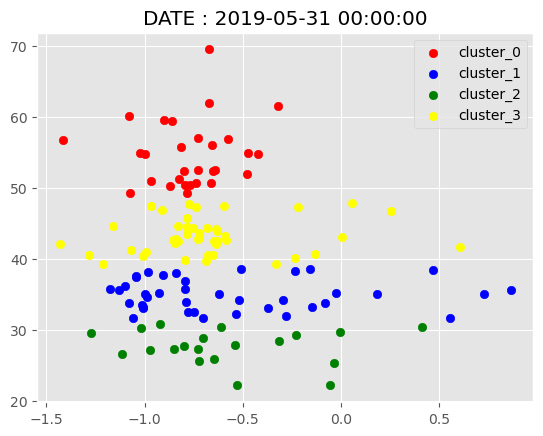

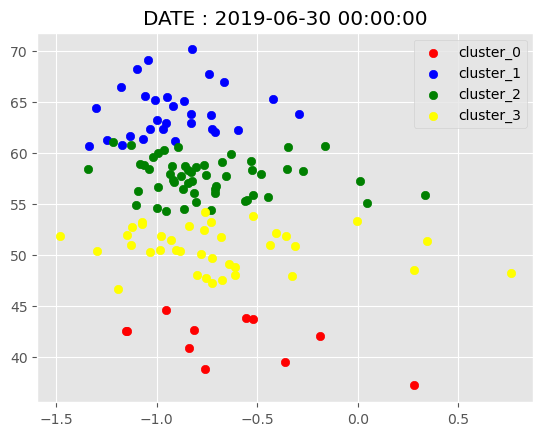

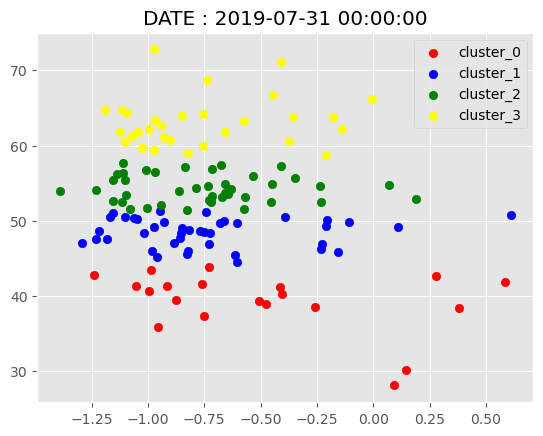

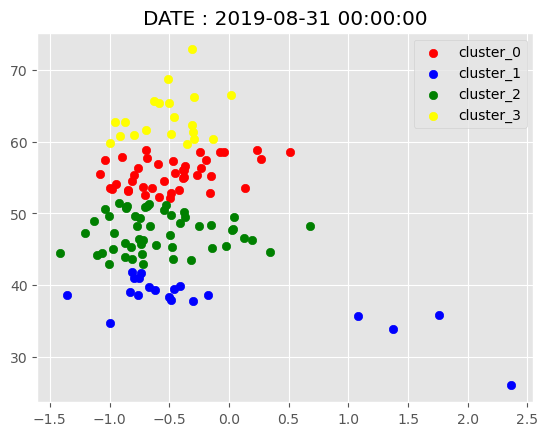

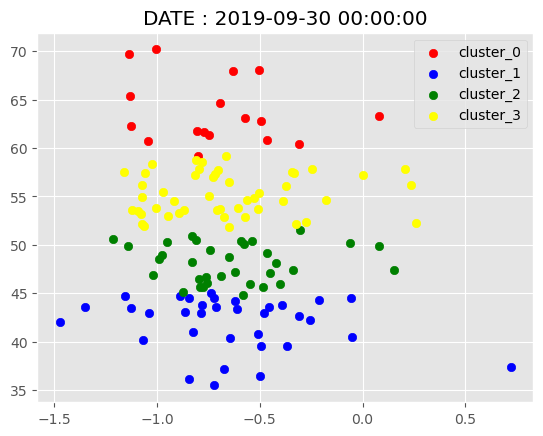

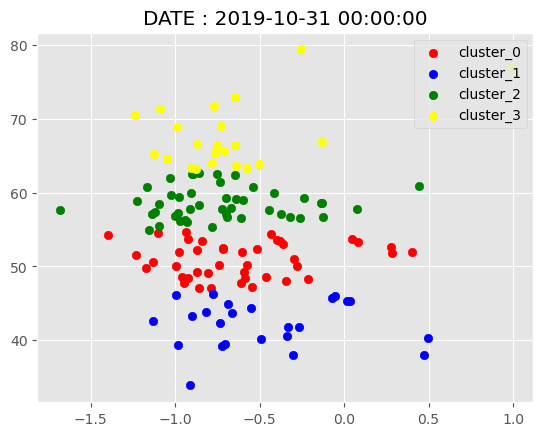

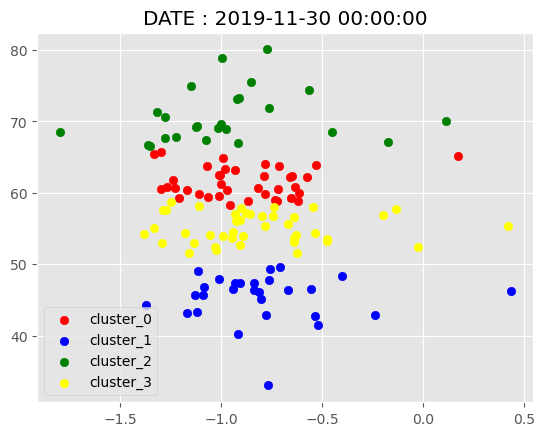

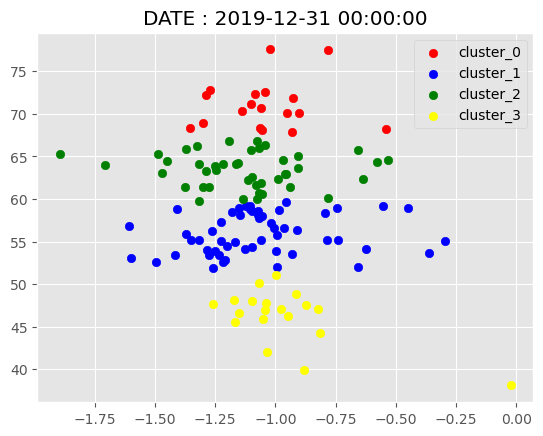

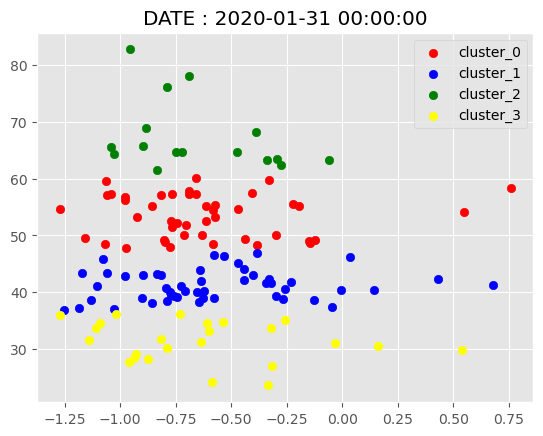

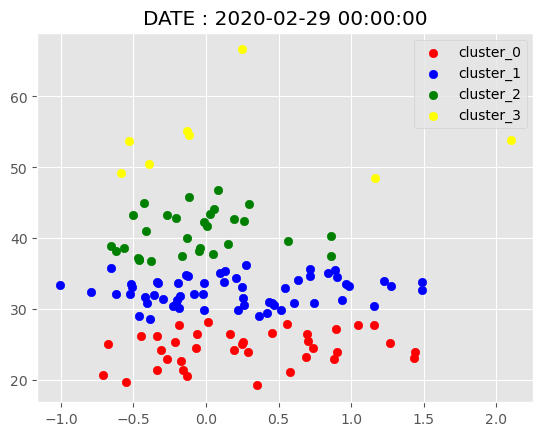

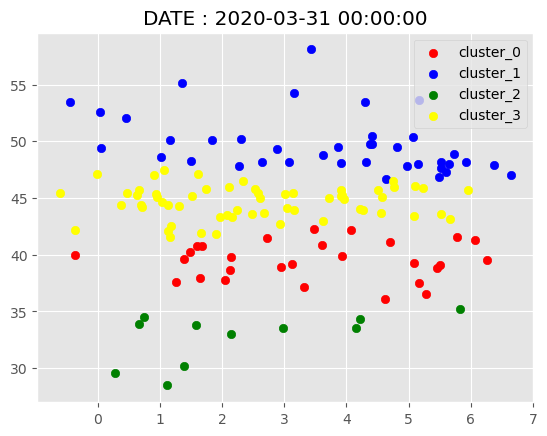

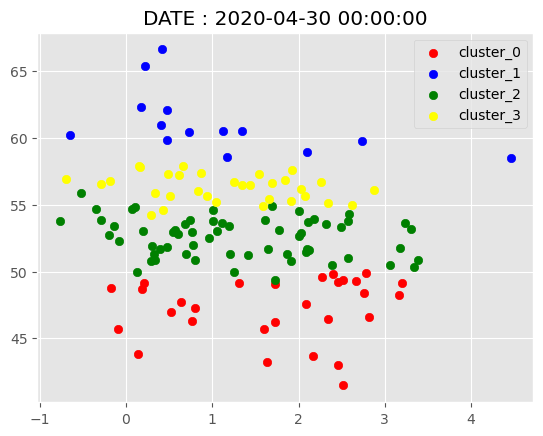

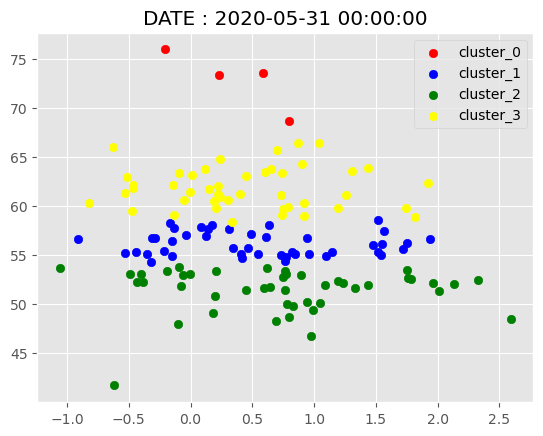

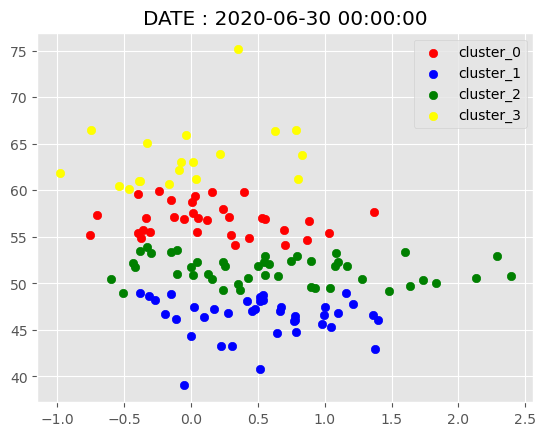

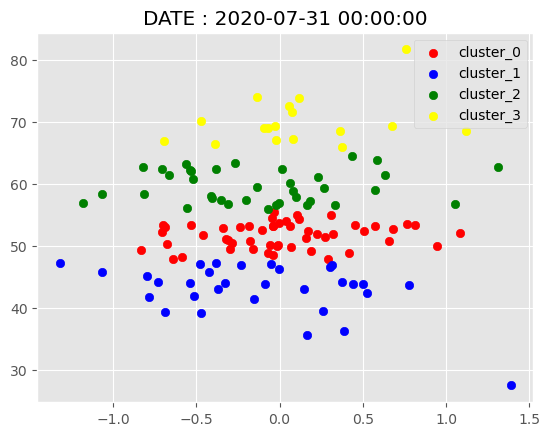

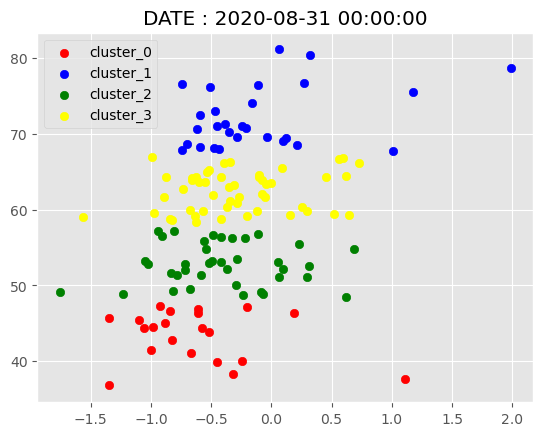

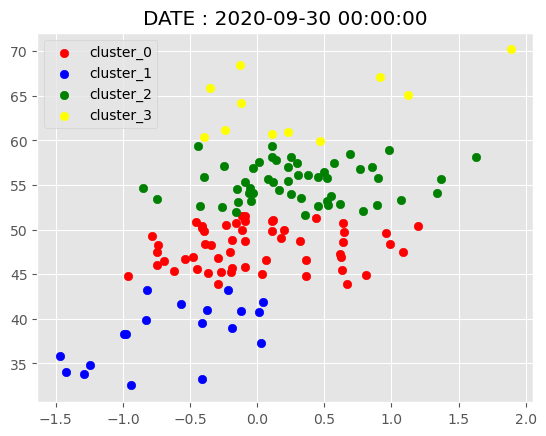

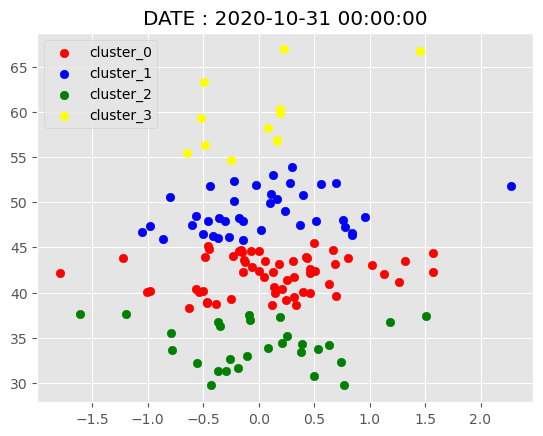

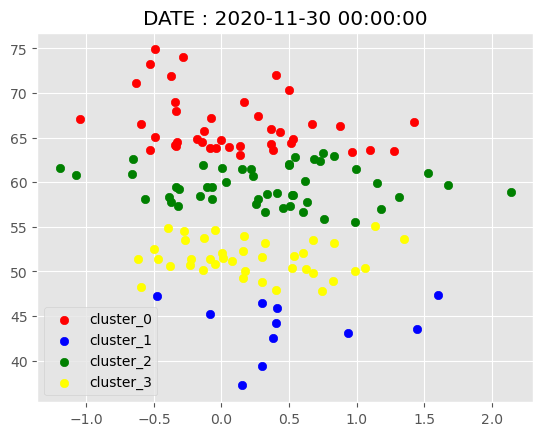

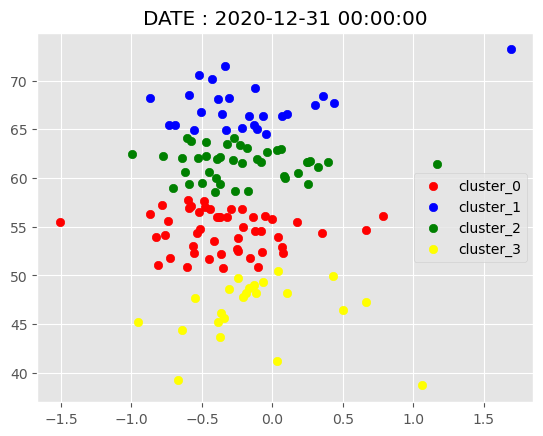

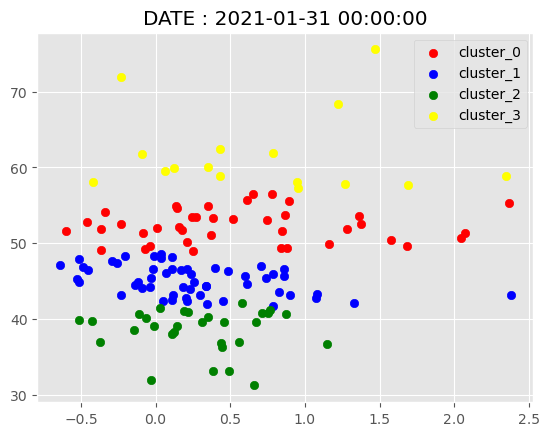

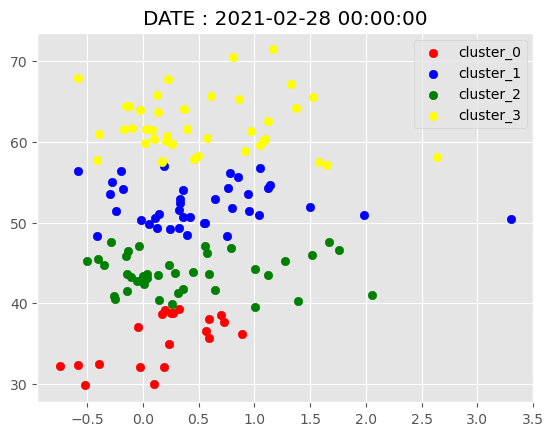

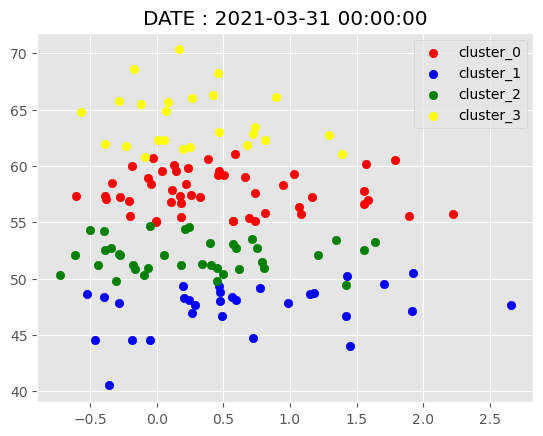

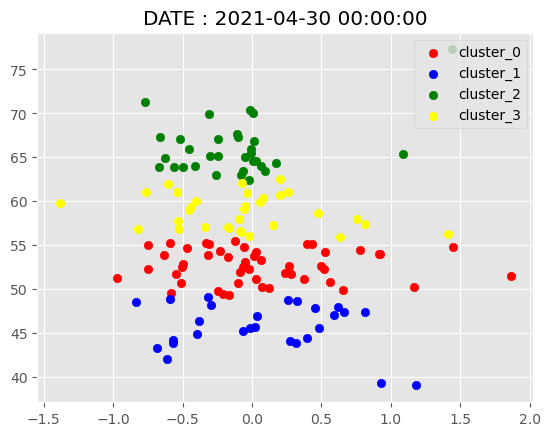

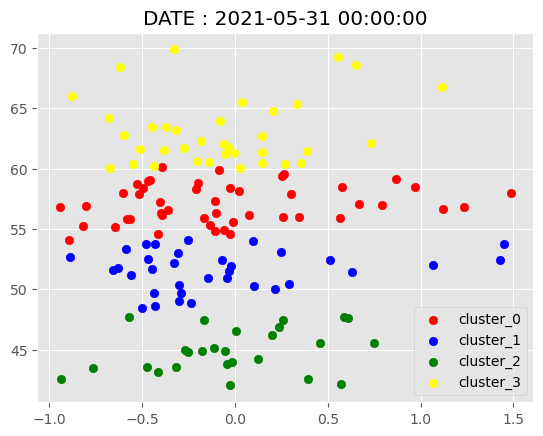

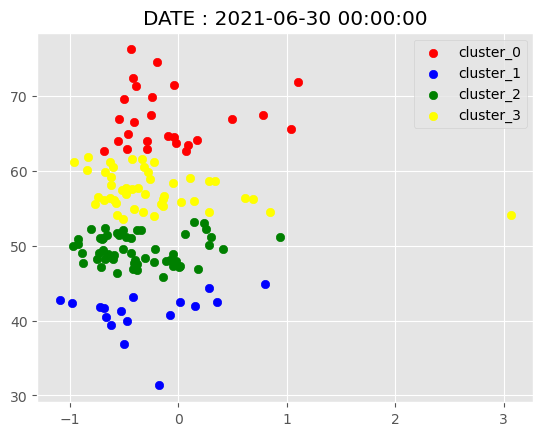

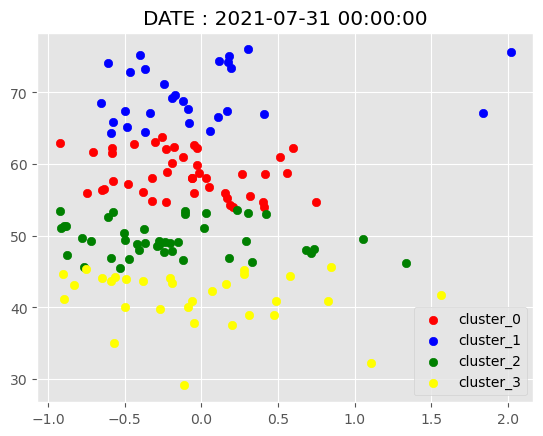

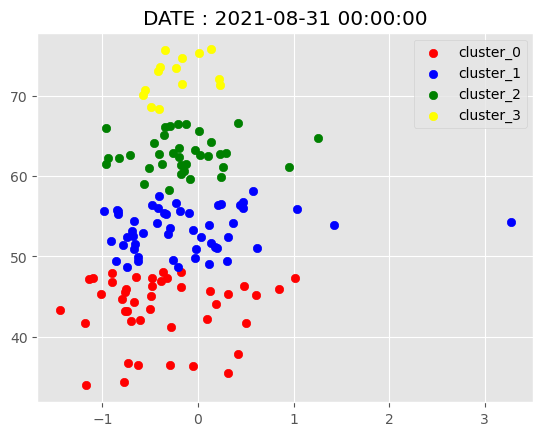

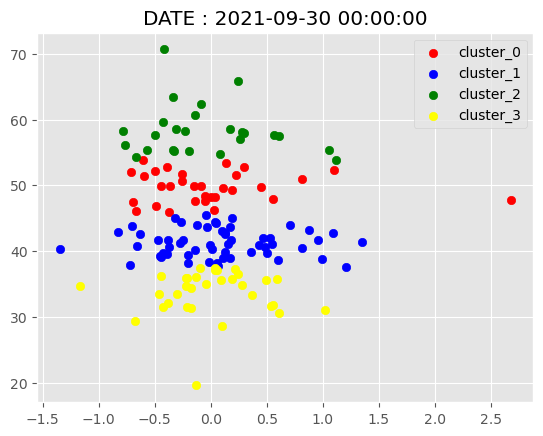

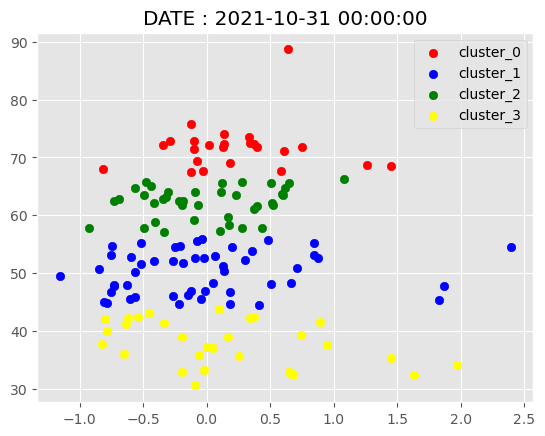

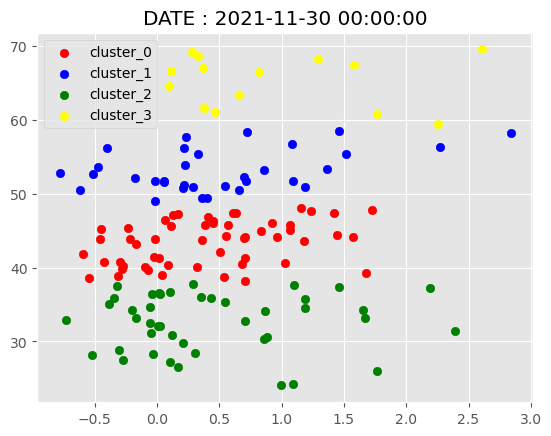

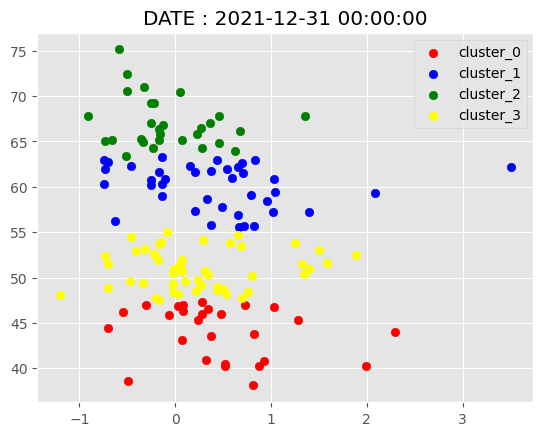

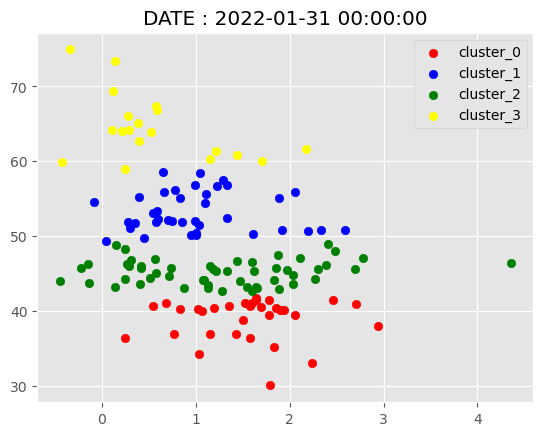

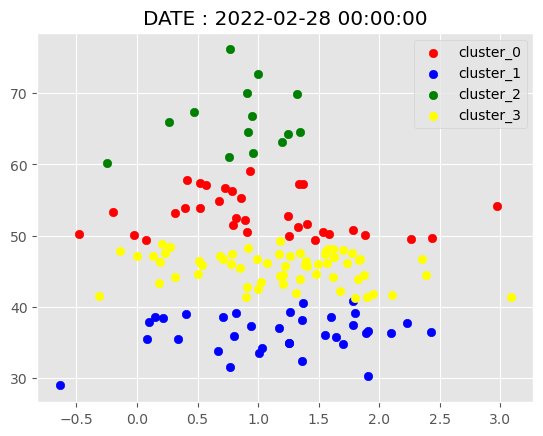

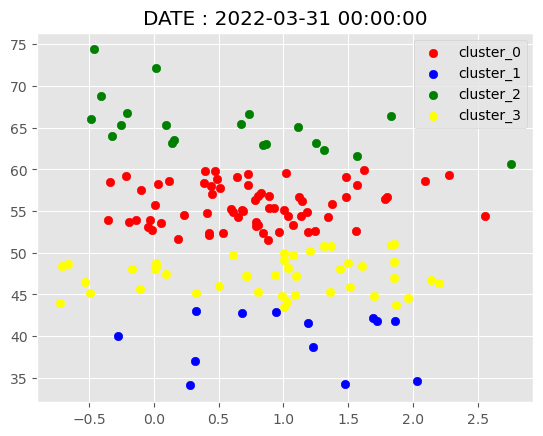

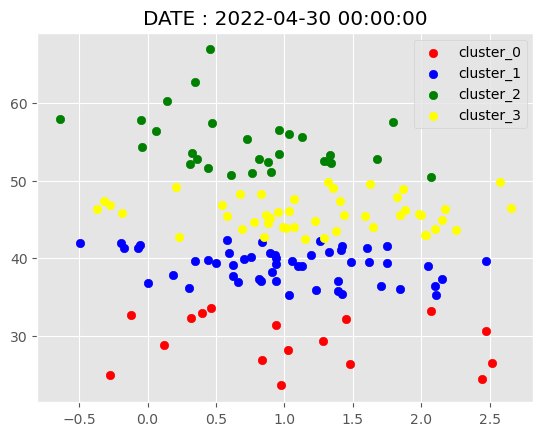

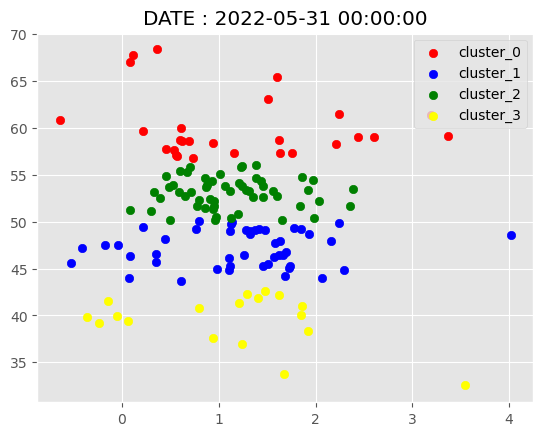

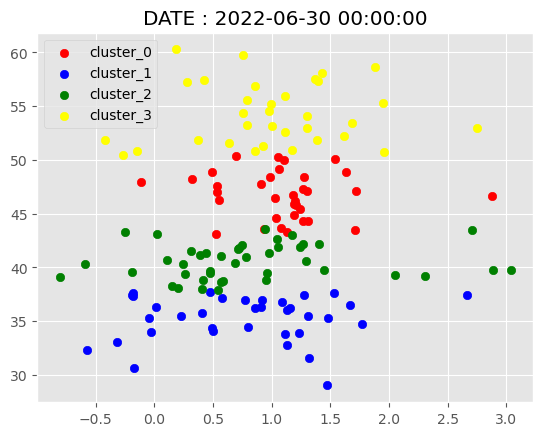

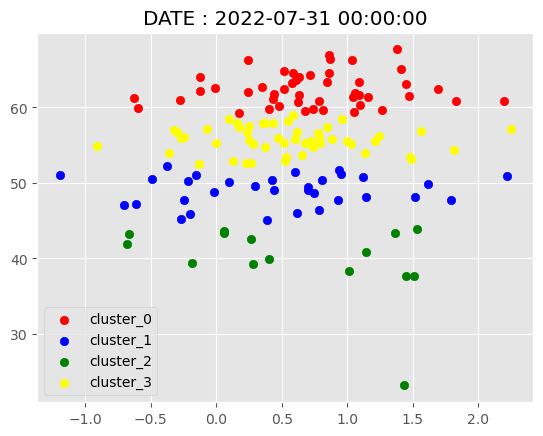

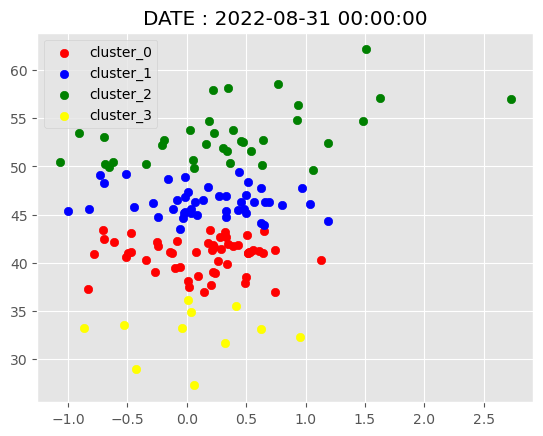

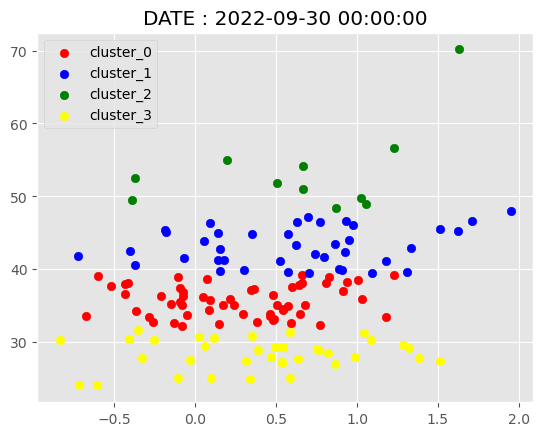

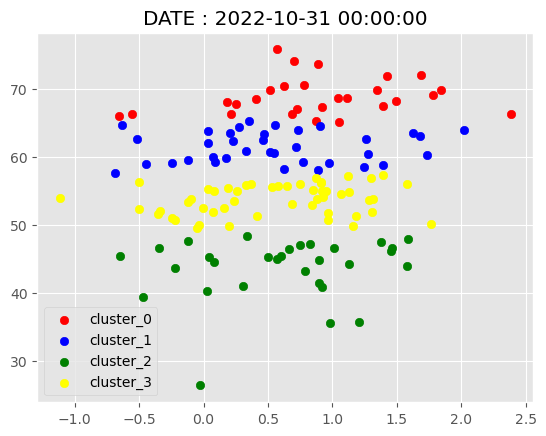

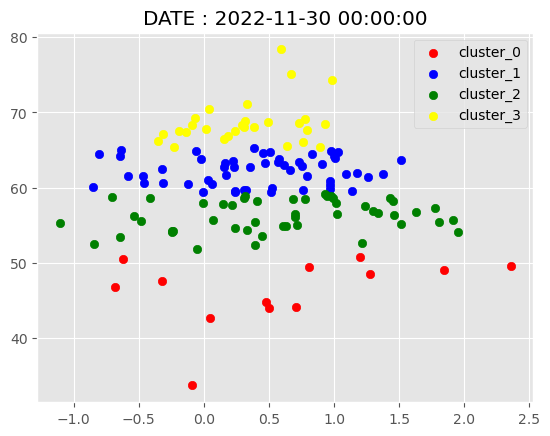

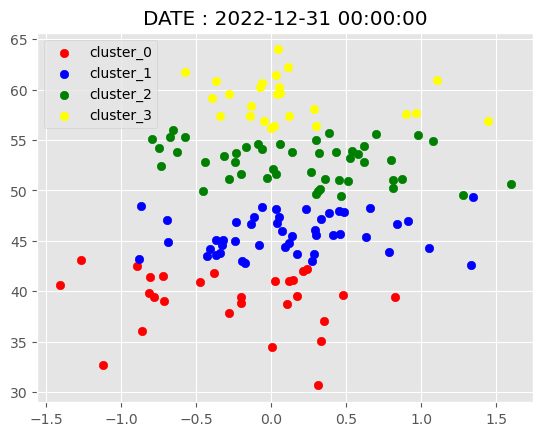

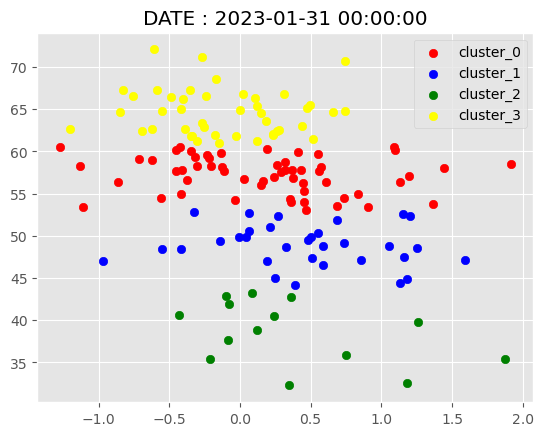

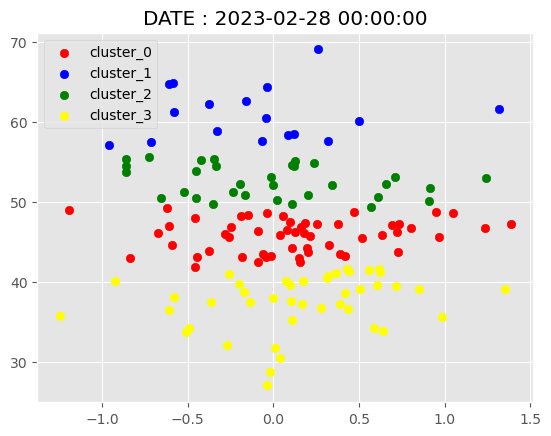

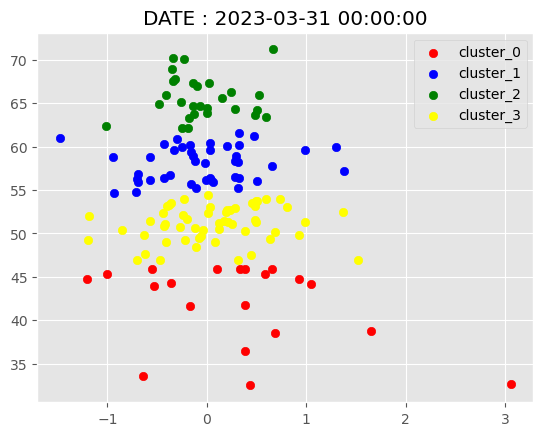

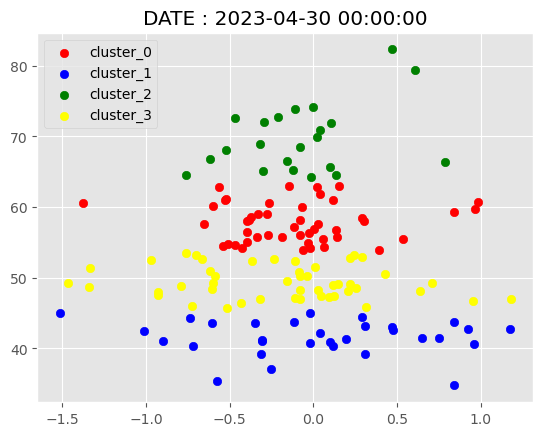

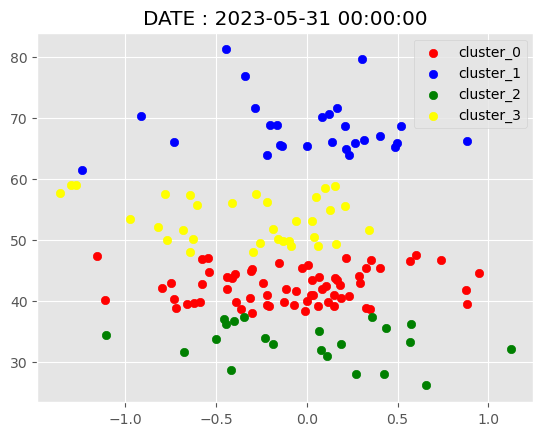

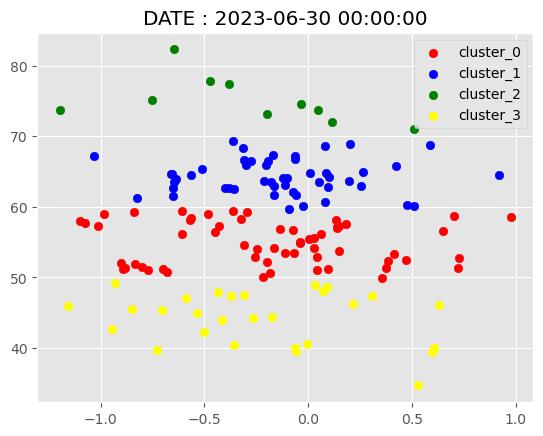

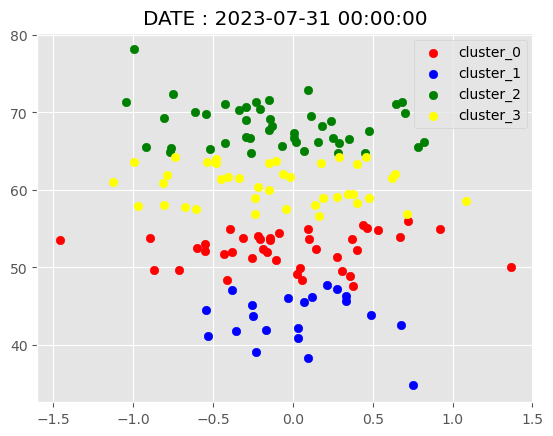

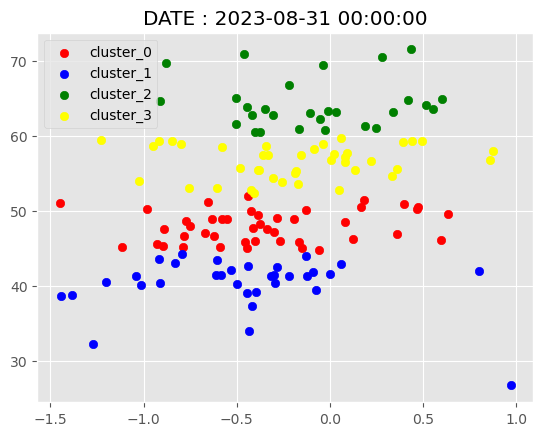

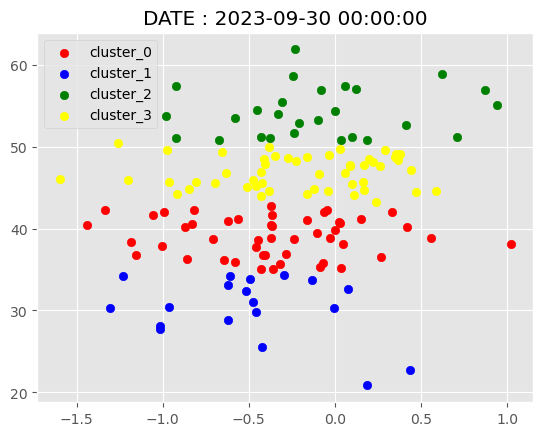

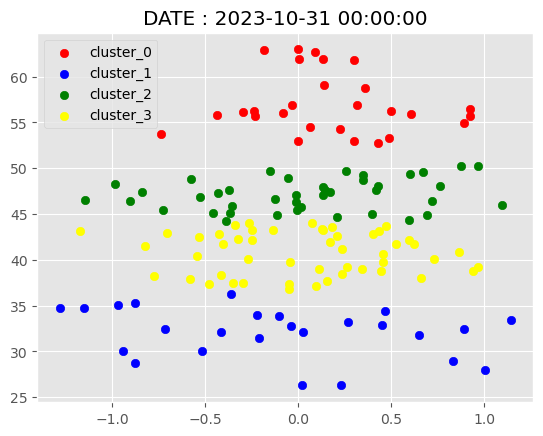

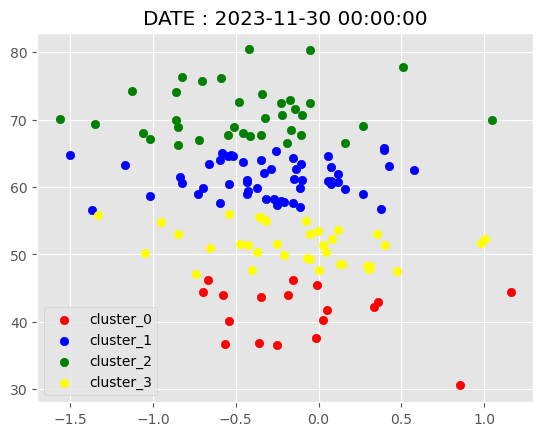

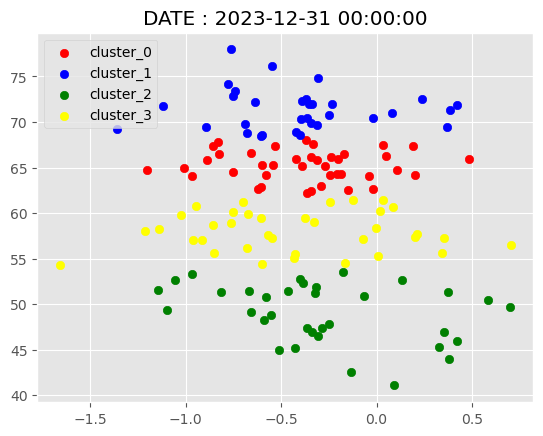

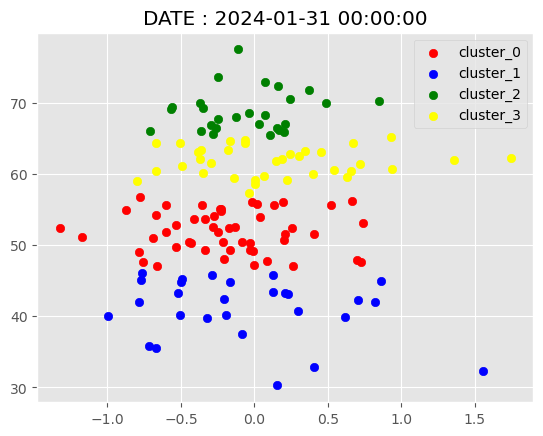

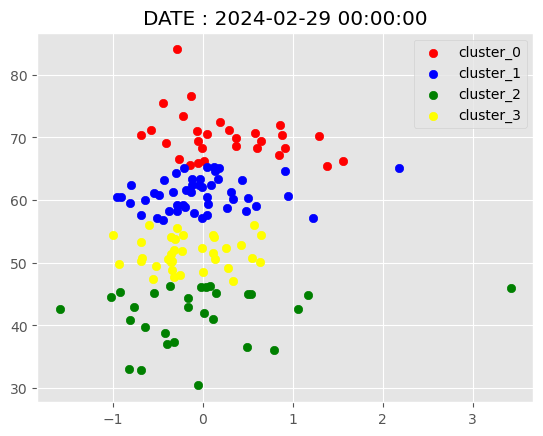

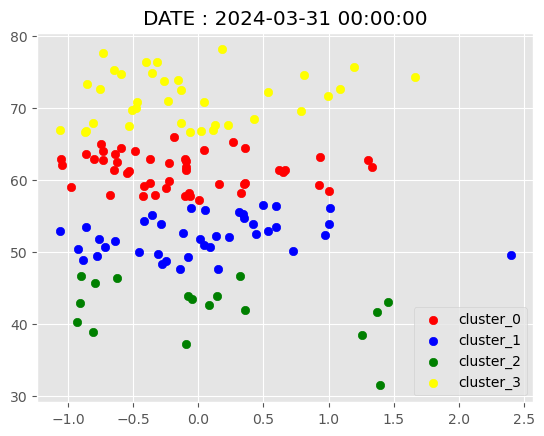

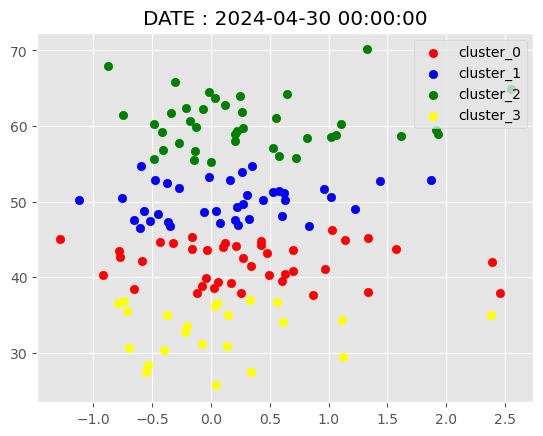

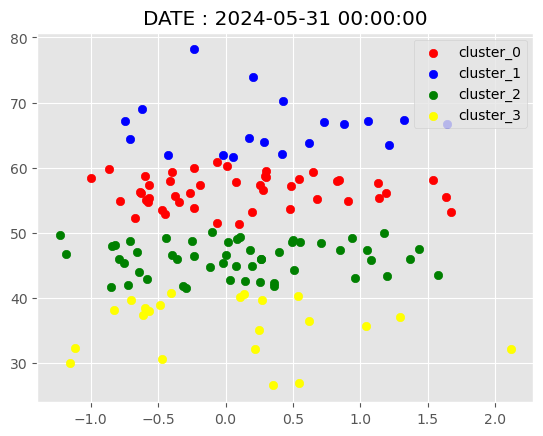

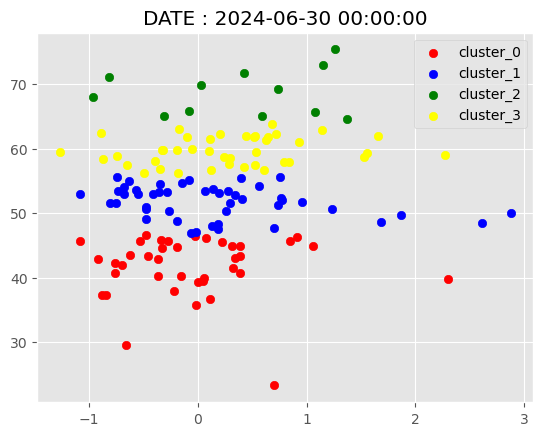

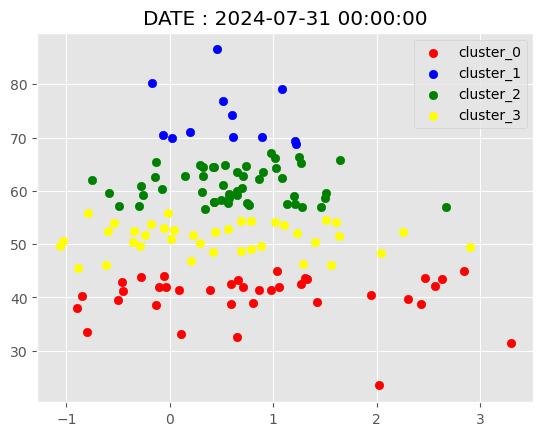

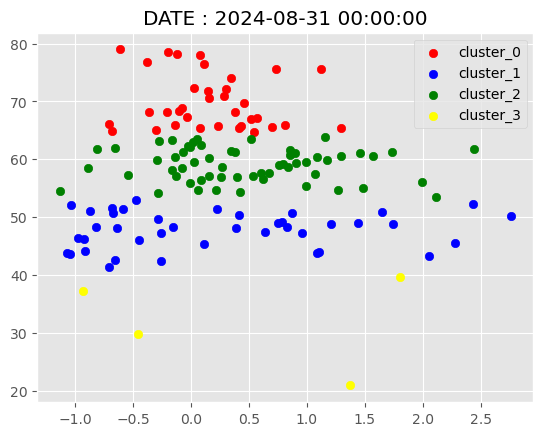

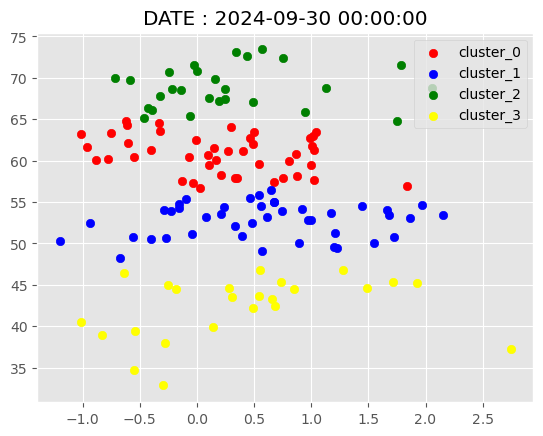

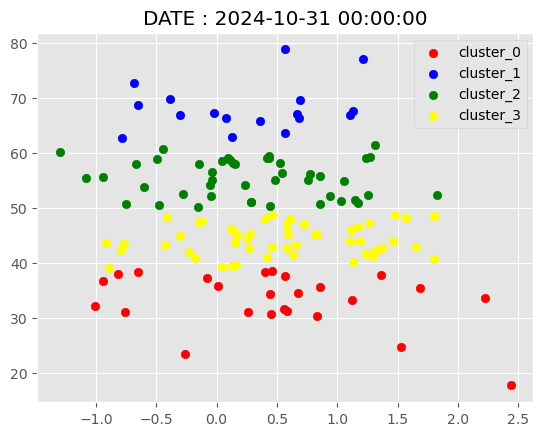

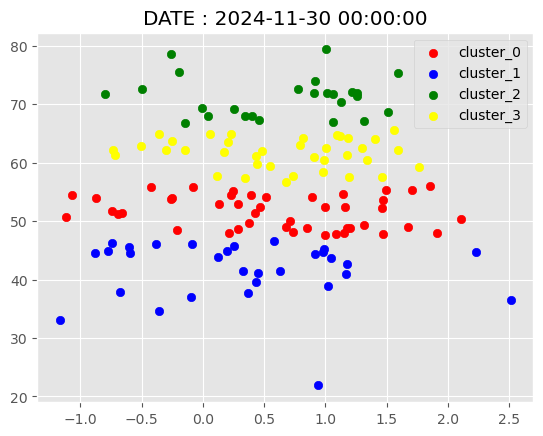

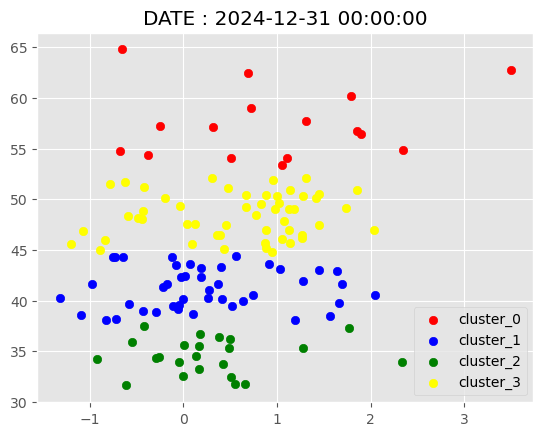

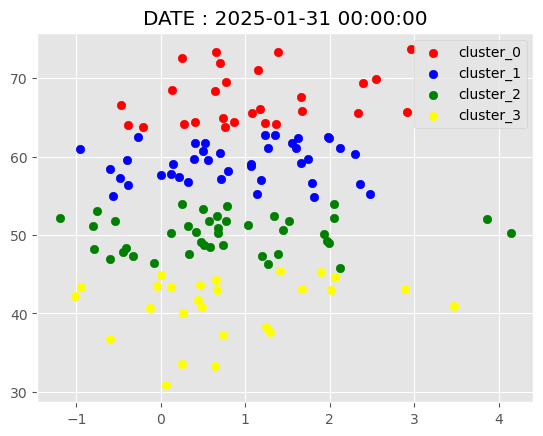

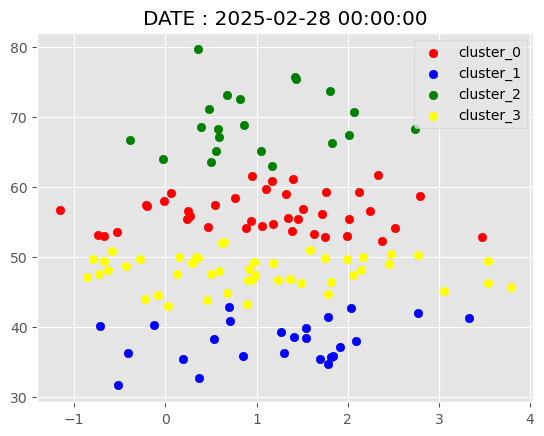

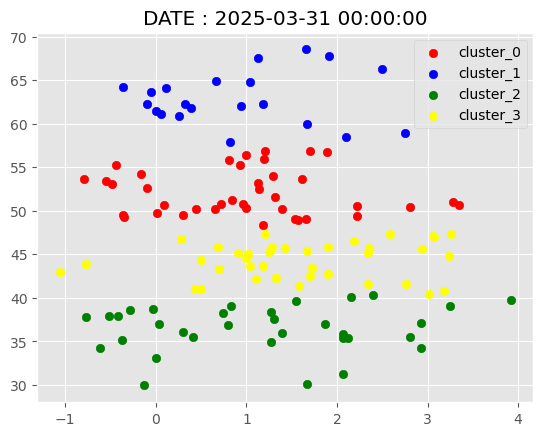

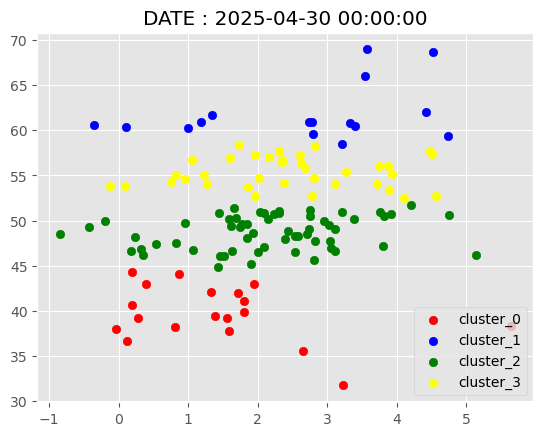

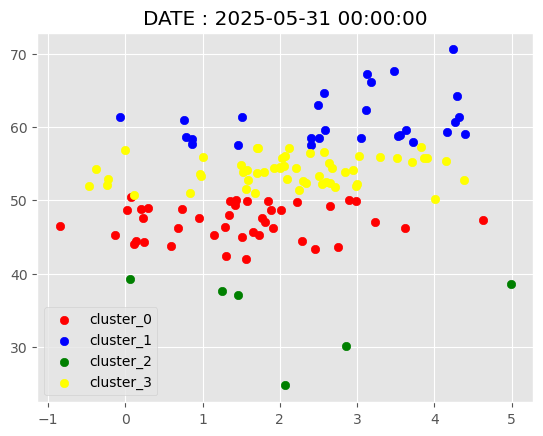

In [58]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    g = data.xs(i, level=0)
    plt.title(f'DATE : {i}')
    plot_clusters(g)

In [59]:
#apply pre defined centroids
target_rsi = [35,45,55,70]
initial_centroids = np.zeros((len(target_rsi),18))
initial_centroids[:,1] = target_rsi
initial_centroids

array([[ 0., 35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [60]:
def get_clusters_new(data):
    #remove initial clusters,and assign prdefined centroids
    data = data.drop('cluster',axis=1)
    data['cluster'] = KMeans(n_clusters=4,
                            random_state=0,
                            init=initial_centroids).fit(data).labels_
    return data

In [61]:
#redo the clusters

data = data.dropna().groupby('date',group_keys=False).apply(get_clusters_new)
data


garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2019-05-31 AAPL           -0.000655  34.632858  3.706776  3.816227  3.925678   
           ABBV           -0.028138  40.509163  4.070259  4.104260  4.138262   
           ABT            -0.004000  47.744496  4.208403  4.231830  4.255256   
           ACN            -0.002625  54.904803  5.060080  5.087628  5.115176   
           ADBE            0.000117  47.431756  5.592042  5.623627  5.655213   
...                             ...        ...       ...       ...       ...   
2025-05-31 VZ              0.000073  53.350193  3.723617  3.762213  3.800809   
           WDAY            0.000071  55.871919  5.338911  5.436849  5.534786   
           WFC             0.000108  58.896230  4.082285  4.194221  4.306156   
           WMT             0.000071  61.429937  4.423785  4.527380  4.630976   
           XOM             0.000792  46.215167  4.608551  4.657160  4.705769   

                        atr      macd  return_1_M  return_2_M  return_3_M  \
date       ticker                                                           
2019-05-31 AAPL   -0.988587 -0.784074   -0.124213   -0.038120    0.004969   
           ABBV   -1.010808 -0.346655   -0.033757   -0.017923   -0.006405   
           ABT    -0.772410 -0.474817   -0.043112   -0.022126   -0.005086   
           ACN    -1.021937  0.002453   -0.025182    0.009963    0.036194   
           ADBE   -0.965742 -0.103174   -0.063440    0.008240    0.010555   
...                     ...       ...         ...         ...         ...   
2025-05-31 VZ      0.978101  0.041286   -0.007263   -0.010165    0.010277   
           WDAY    1.007397  0.247602    0.015020    0.031927   -0.018912   
           WFC     3.559631  0.590599    0.039290    0.013903   -0.019620   
           WMT     4.322989  2.670565    0.015424    0.060586    0.001388   
           XOM     1.912694 -0.856994    0.005491   -0.054989   -0.015571   

                   return_6_M  return_9_M  return_12_M    Mkt-RF       SMB  \
date       ticker                                                            
2019-05-31 AAPL     -0.001953   -0.027496    -0.004168  1.259239 -0.153339   
           ABBV     -0.029679   -0.020684    -0.017210  0.558769  0.183518   
           ABT       0.006087    0.016011     0.019370  0.762511 -0.016038   
           ACN       0.014672    0.007720     0.012691  1.199629 -0.212959   
           ADBE      0.012871    0.003078     0.006955  1.352324 -0.618687   
...                       ...         ...          ...       ...       ...   
2025-05-31 VZ        0.003318    0.010593     0.010577  0.474594 -0.498148   
           WDAY     -0.000875   -0.006281     0.013607  1.182231 -0.599450   
           WFC      -0.004437    0.027427     0.019065  1.117800 -0.133449   
           WMT       0.011792    0.028254     0.035135  0.656136 -0.321837   
           XOM      -0.015876   -0.009694    -0.006137  0.970045 -0.045559   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2019-05-31 AAPL   -0.652059  0.314387  0.394397        0  
           ABBV   -0.121080  0.343228  0.551660        1  
           ABT    -0.426589  0.140401  1.011839        2  
           ACN    -0.212220  0.345146 -0.028459        2  
           ADBE   -0.234300  0.298179 -0.399964        2  
...                     ...       ...       ...      ...  
2025-05-31 VZ      0.347210  0.119418  0.038713        2  
           WDAY   -0.358684 -0.855160 -0.391383        2  
           WFC     1.637623 -0.659746 -1.109998        2  
           WMT    -0.343388  0.194178  0.556648        3  
           XOM     0.964479 -0.455886  0.320533        1  

[10236 rows x 19 columns]

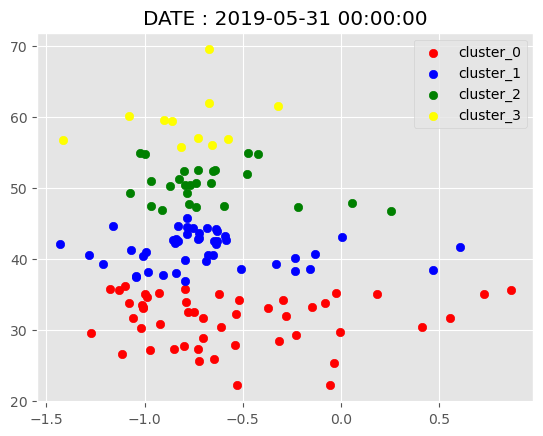

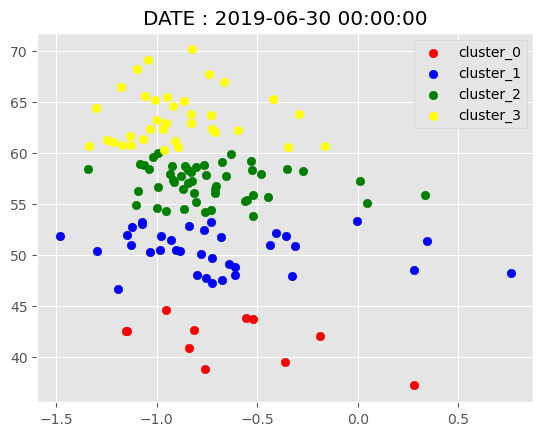

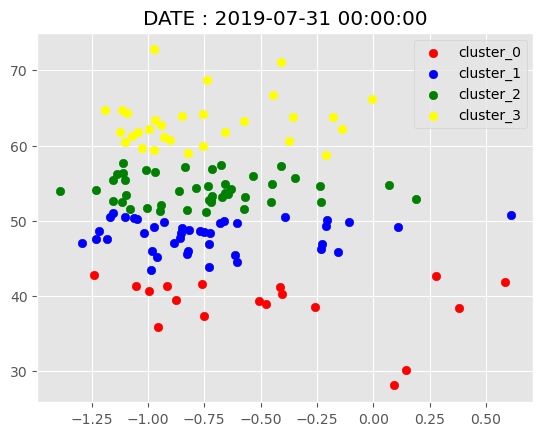

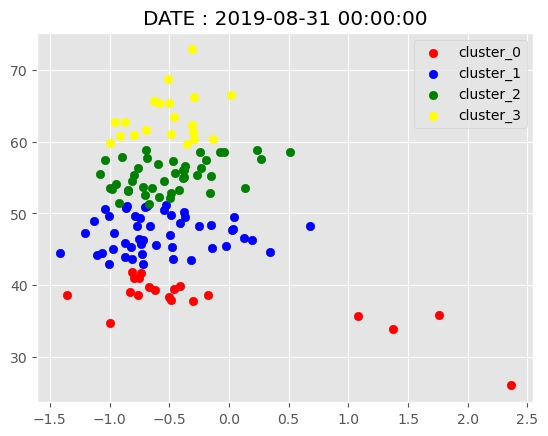

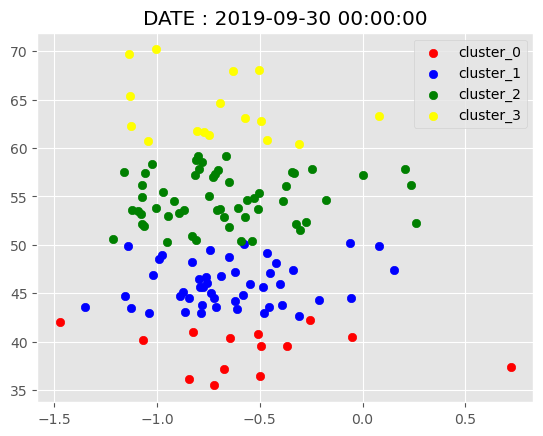

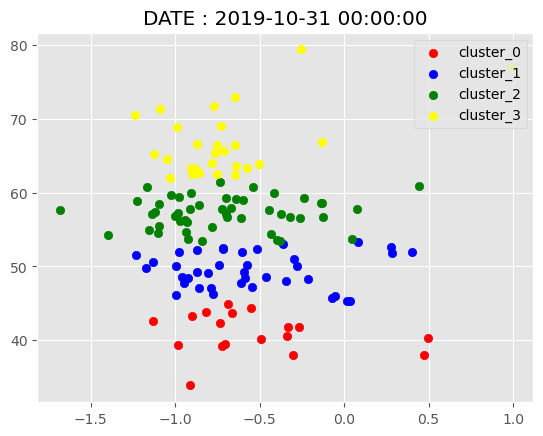

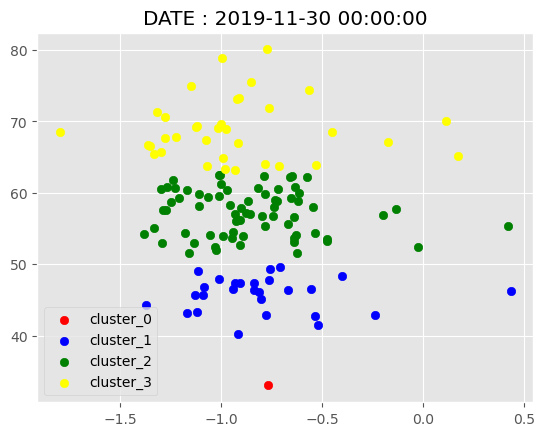

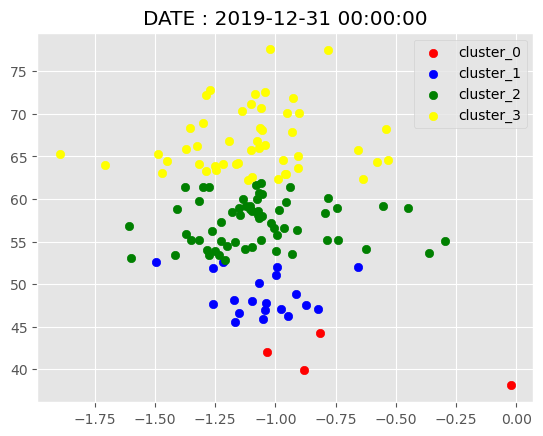

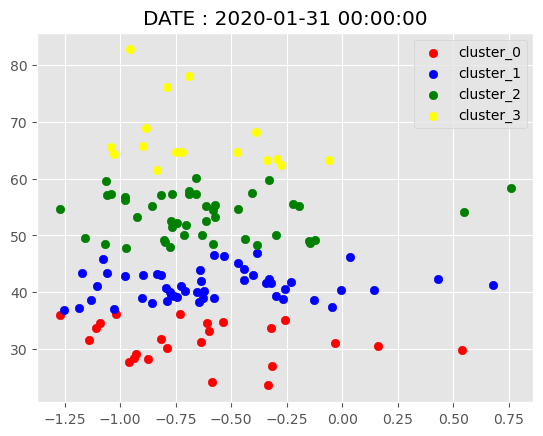

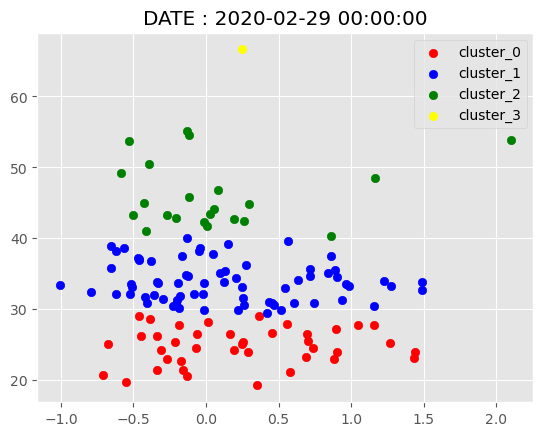

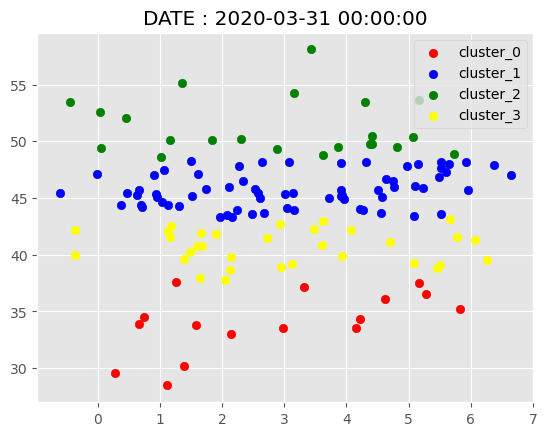

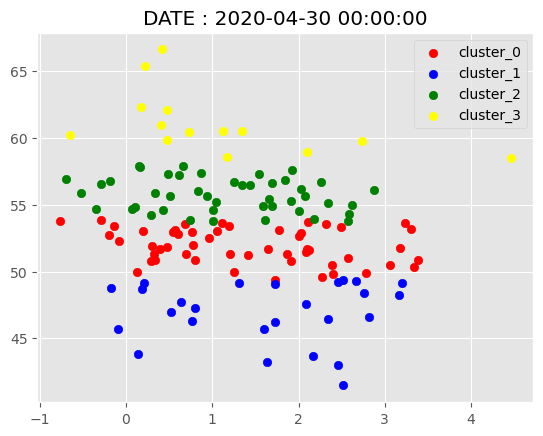

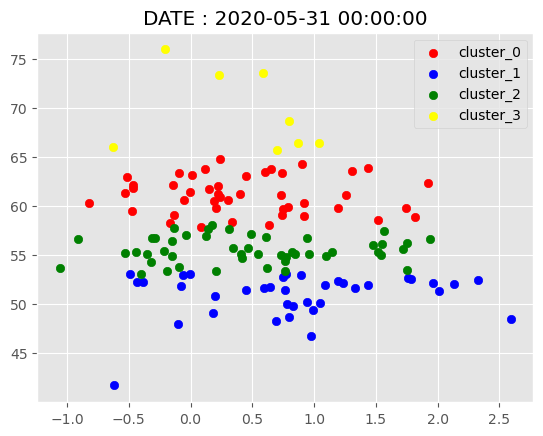

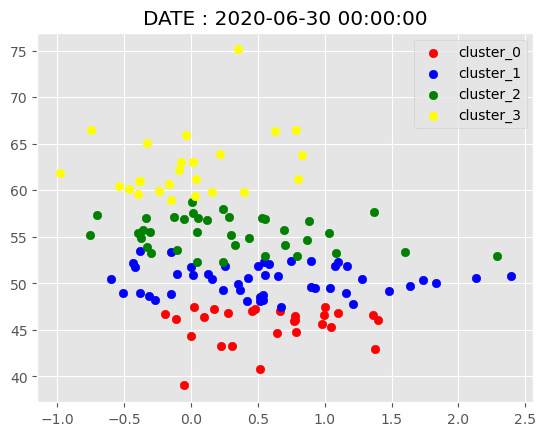

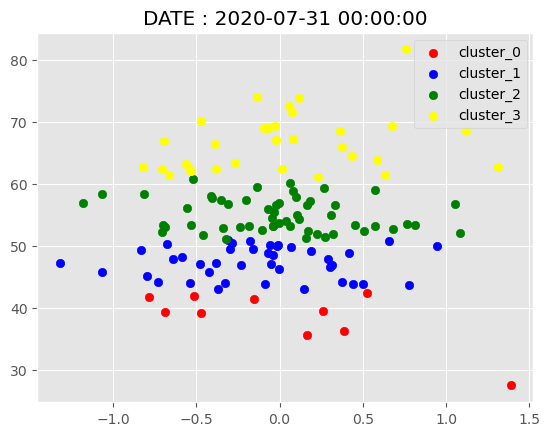

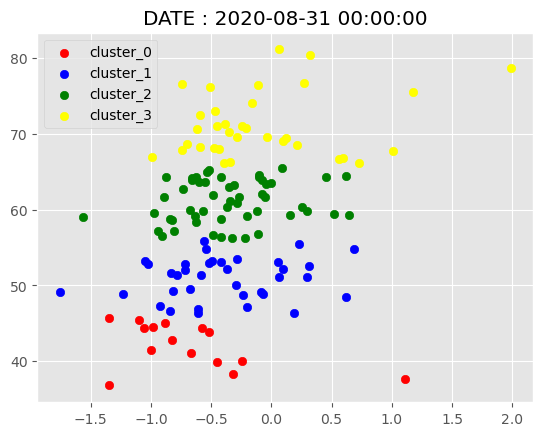

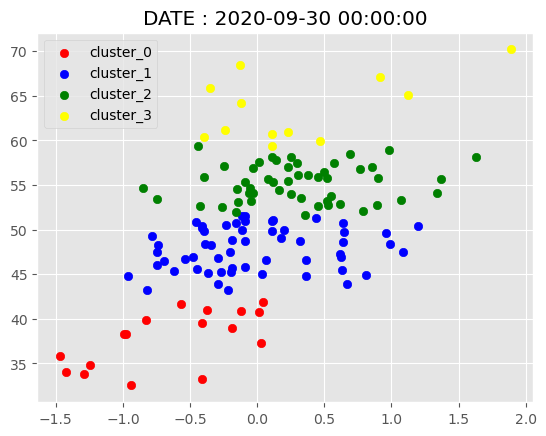

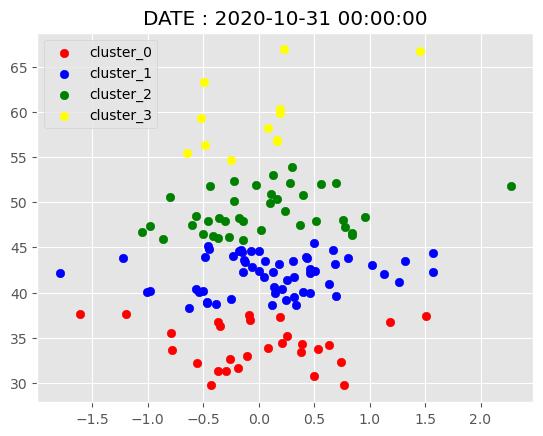

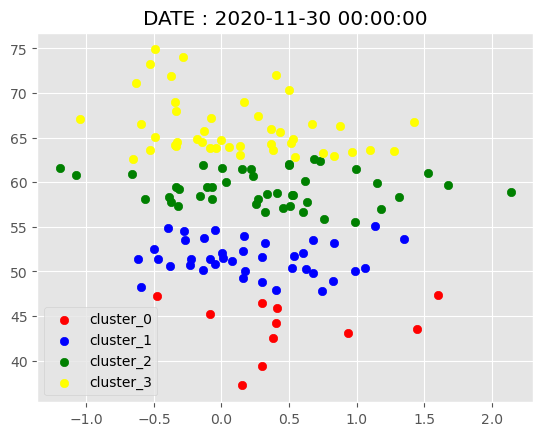

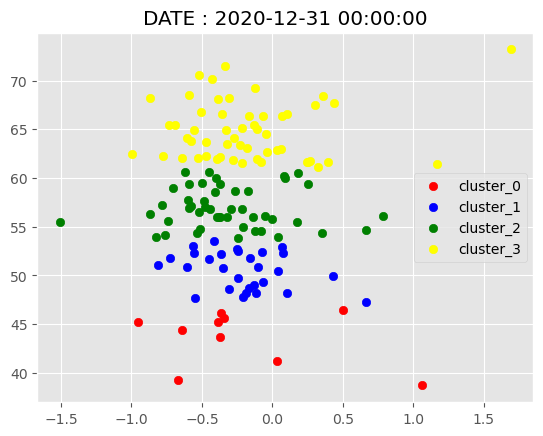

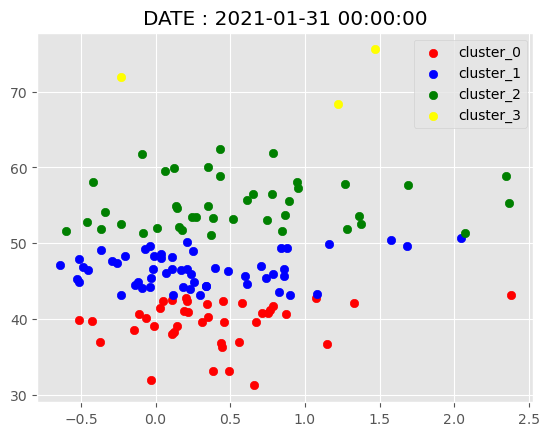

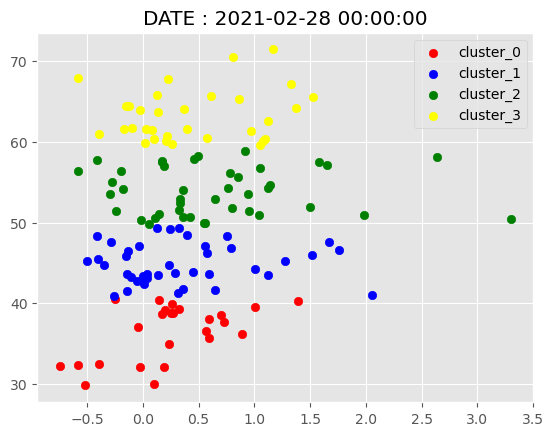

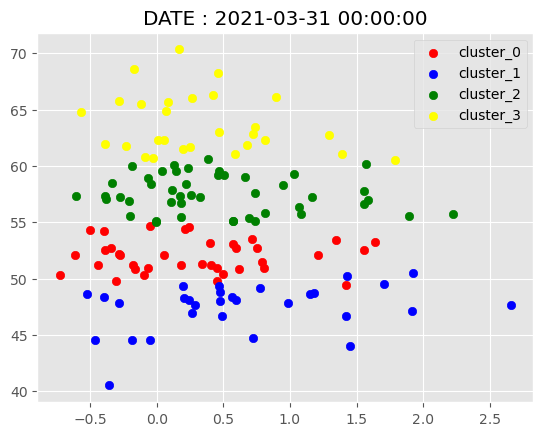

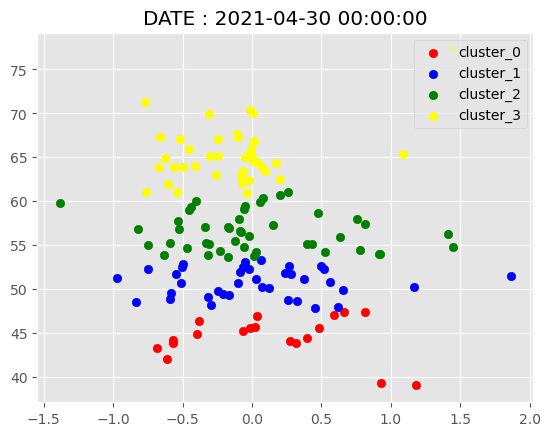

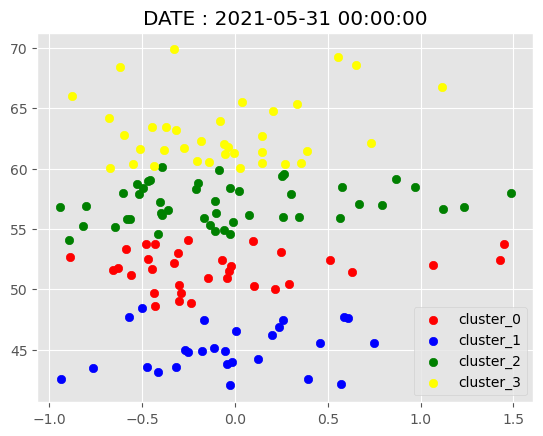

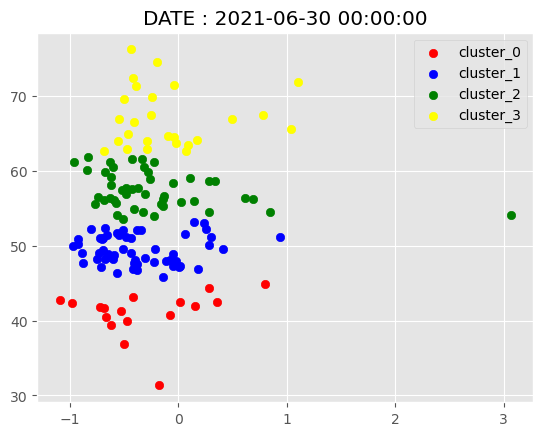

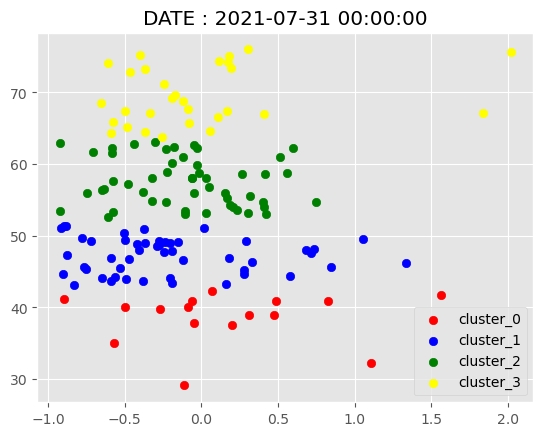

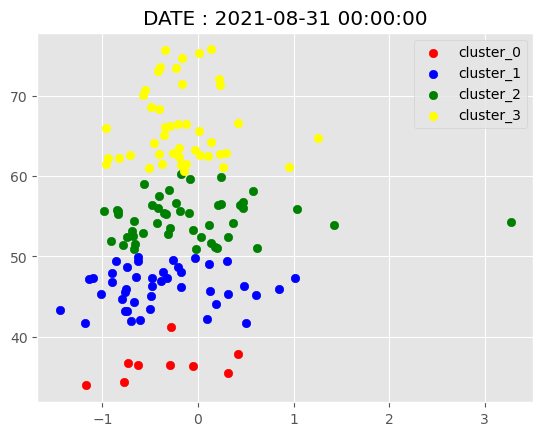

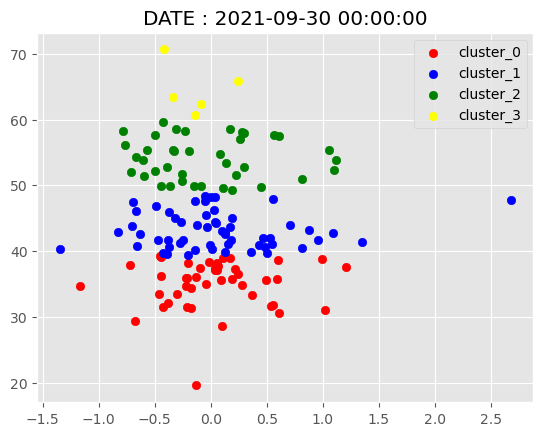

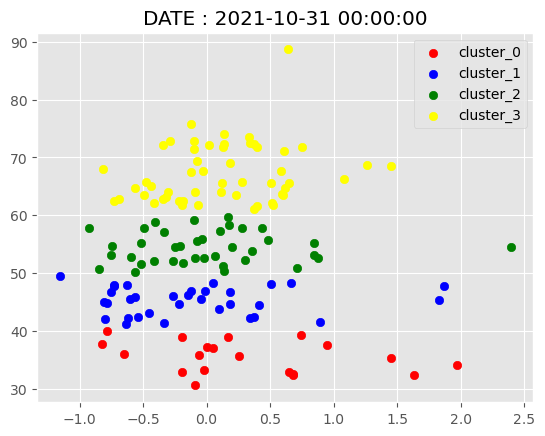

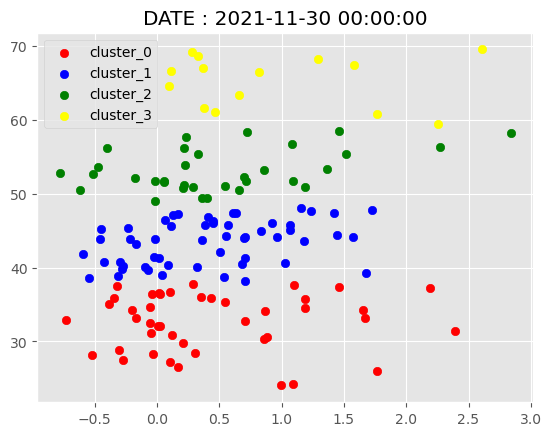

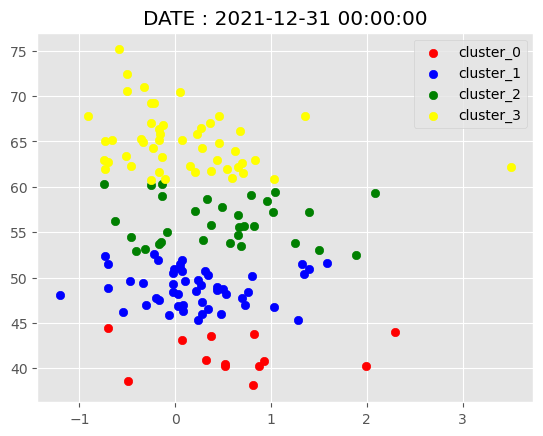

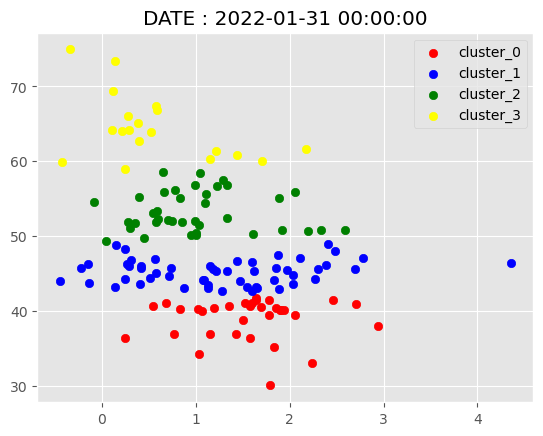

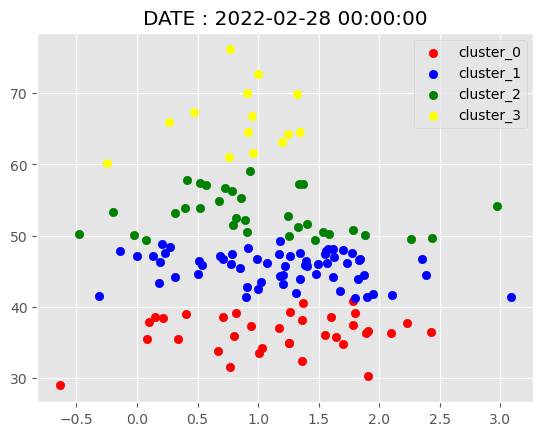

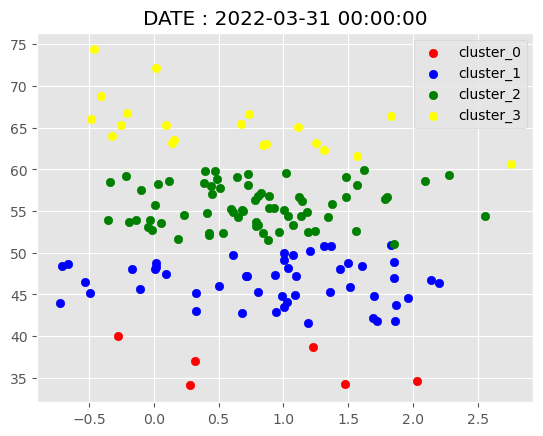

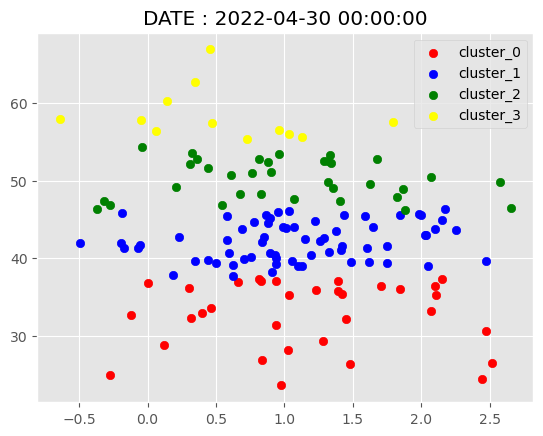

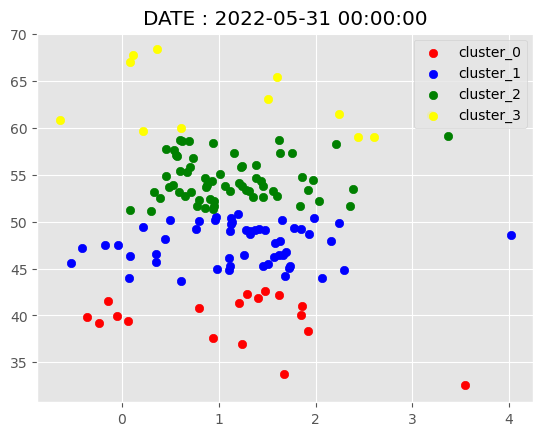

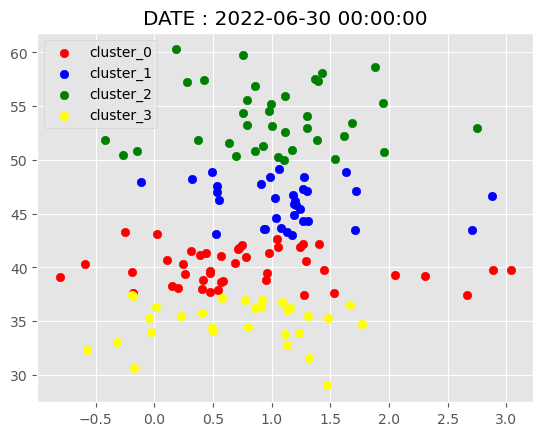

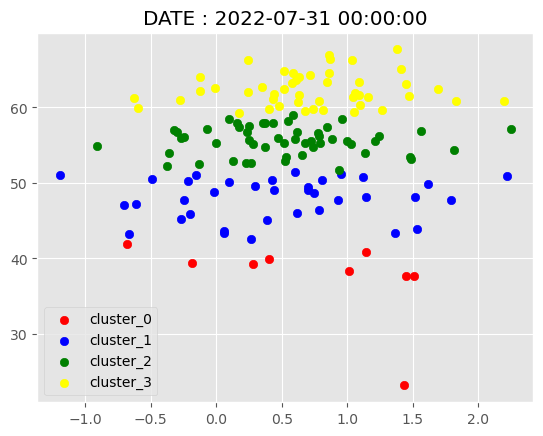

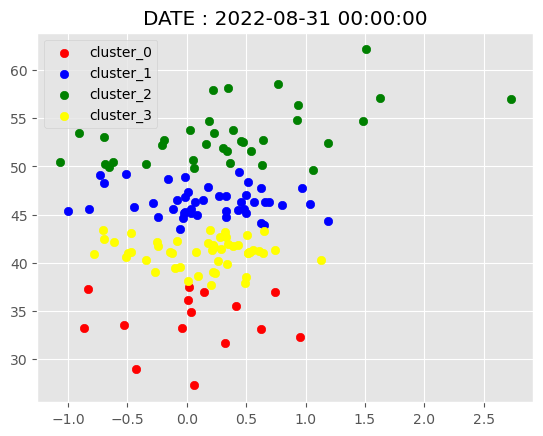

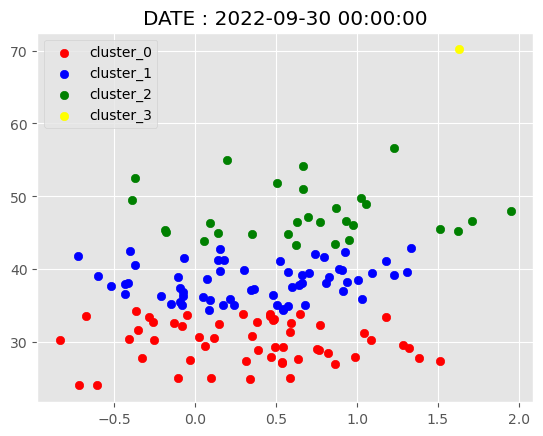

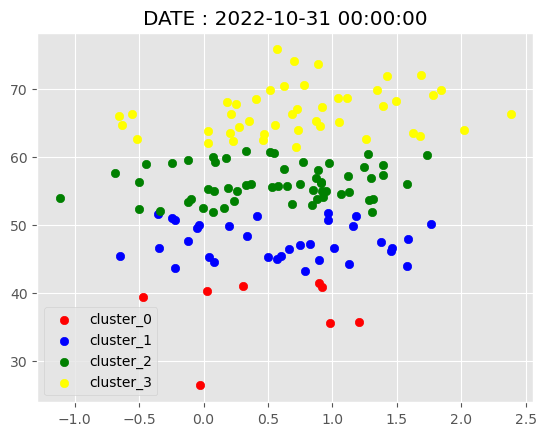

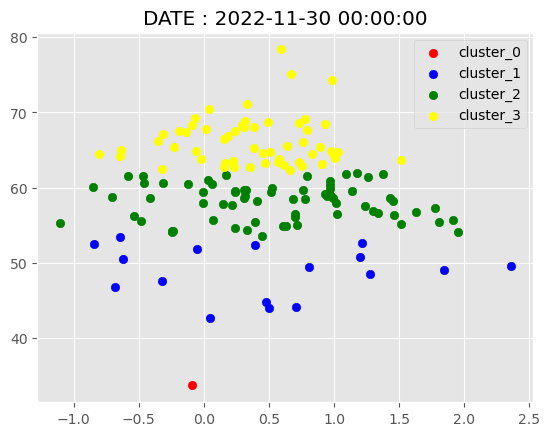

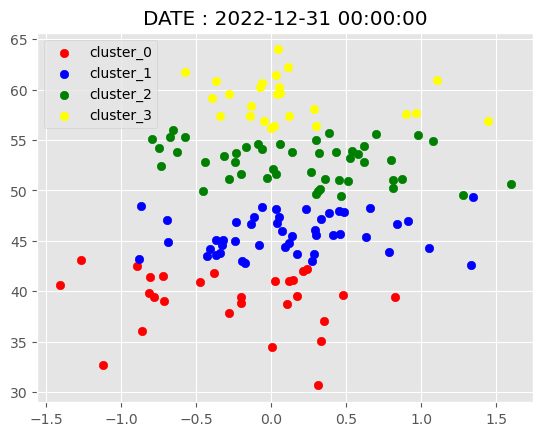

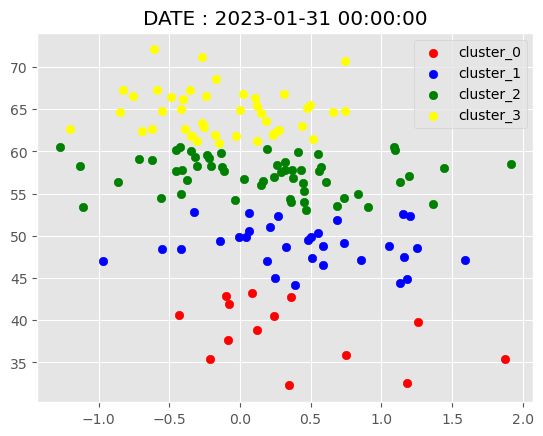

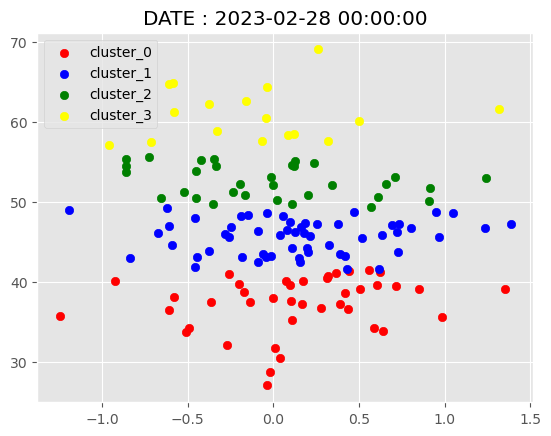

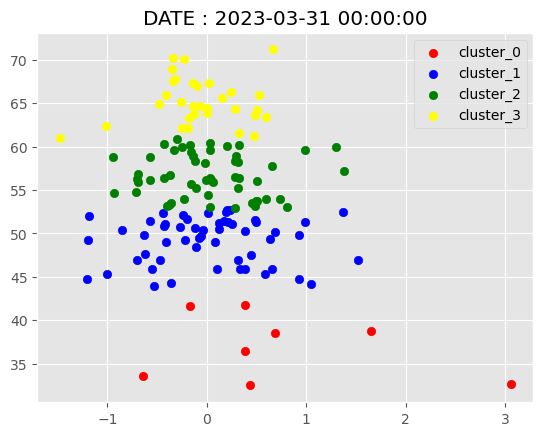

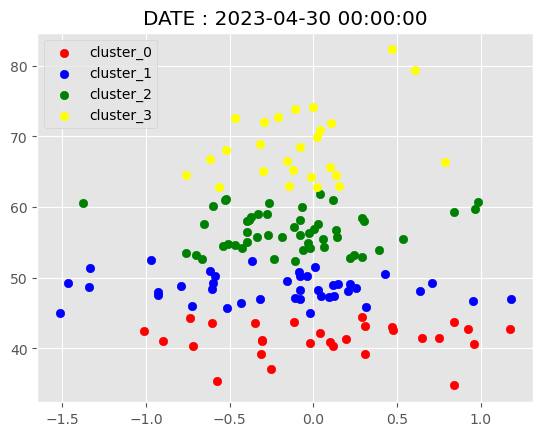

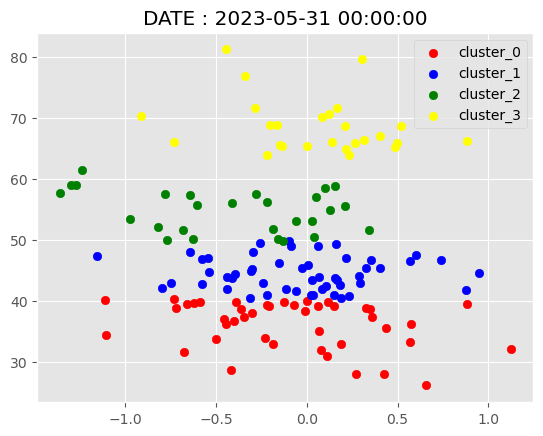

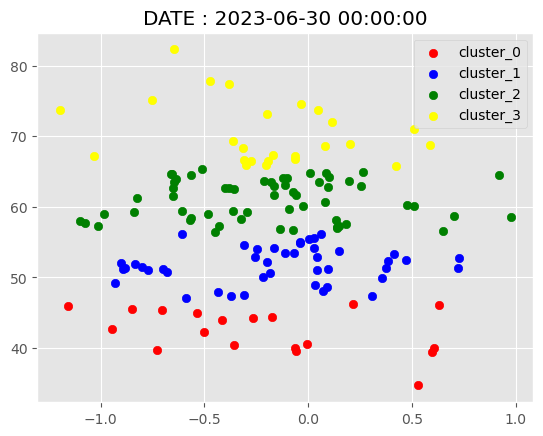

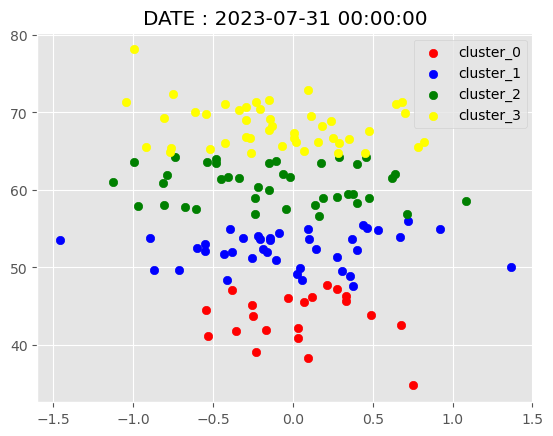

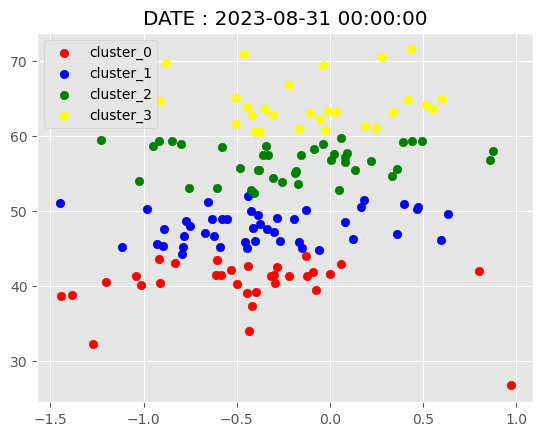

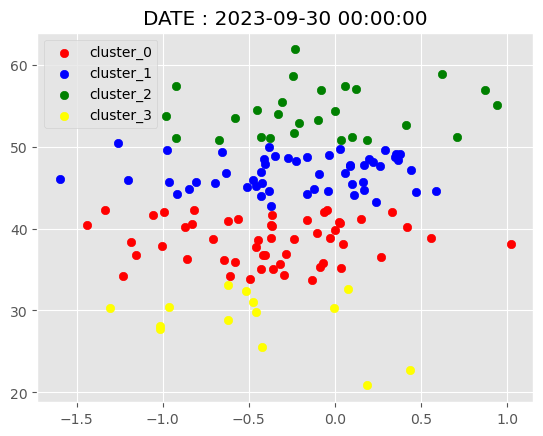

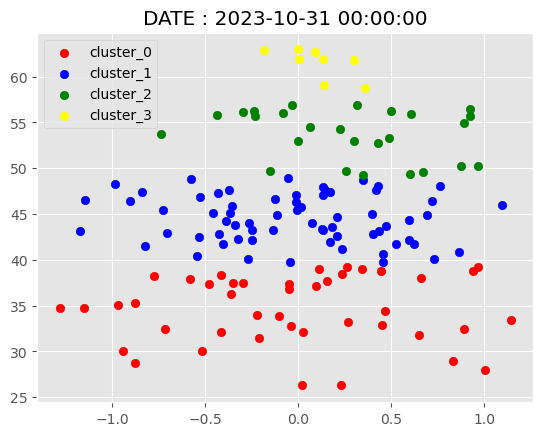

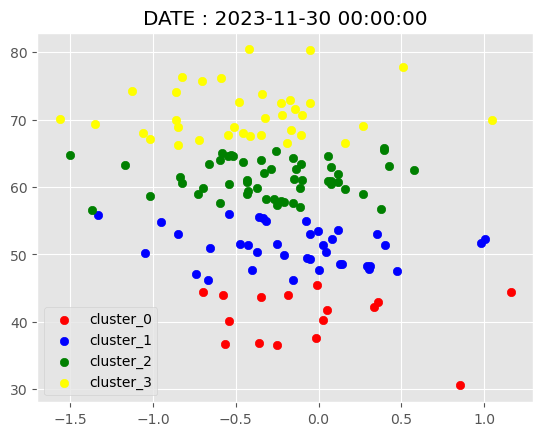

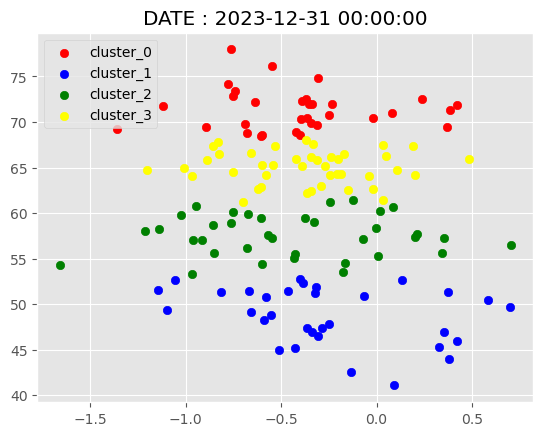

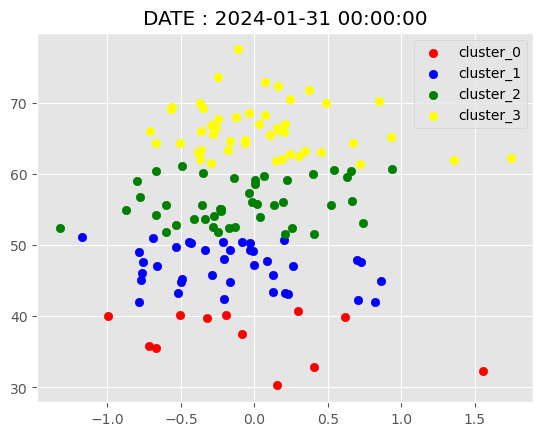

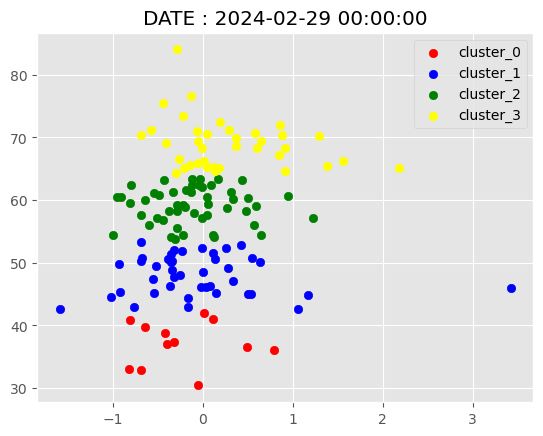

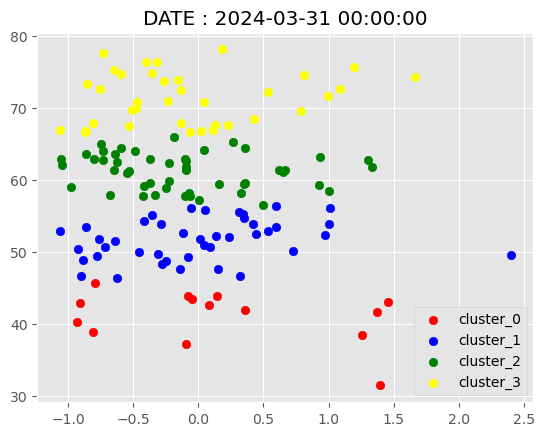

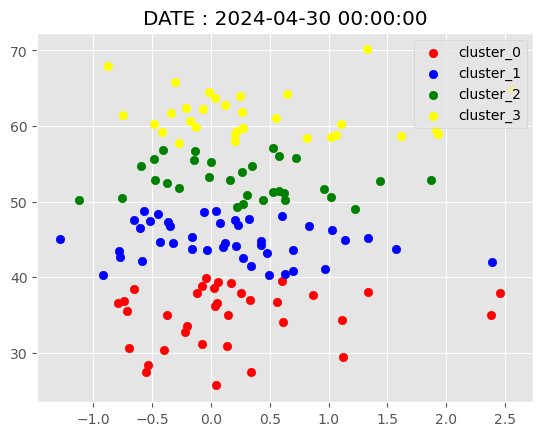

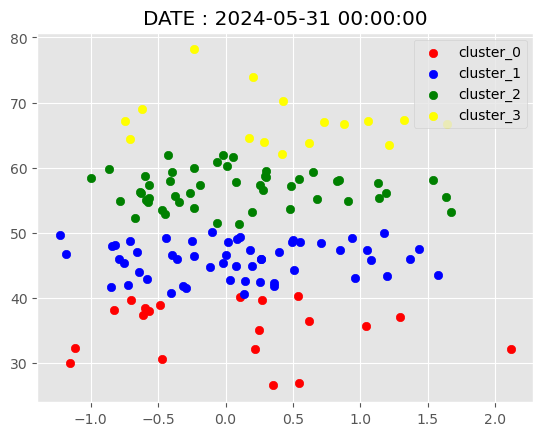

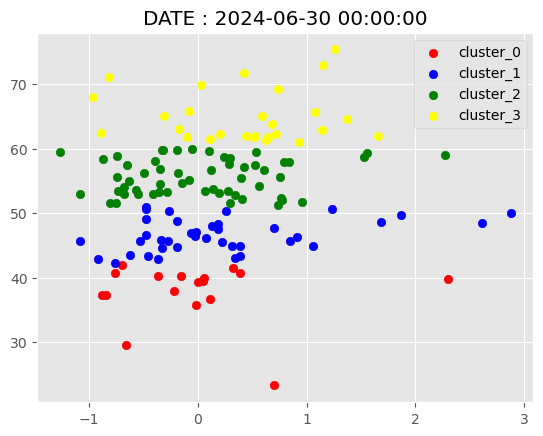

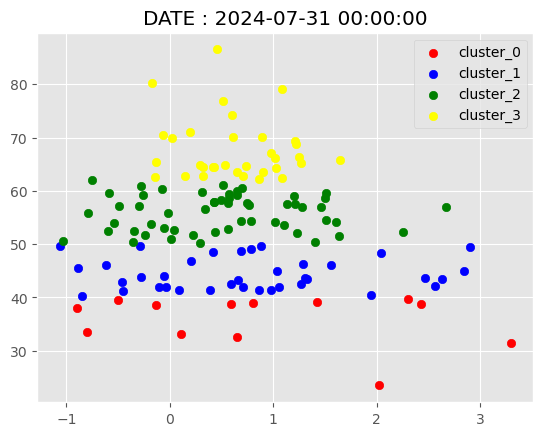

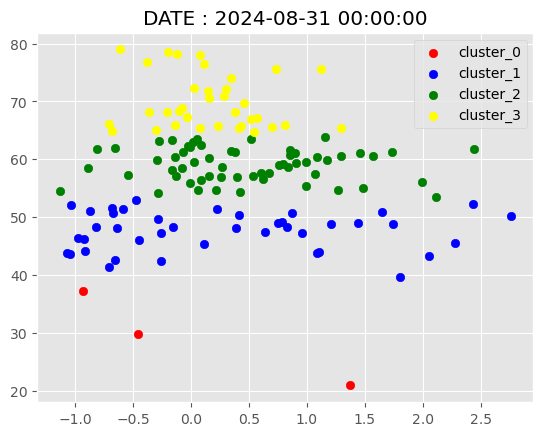

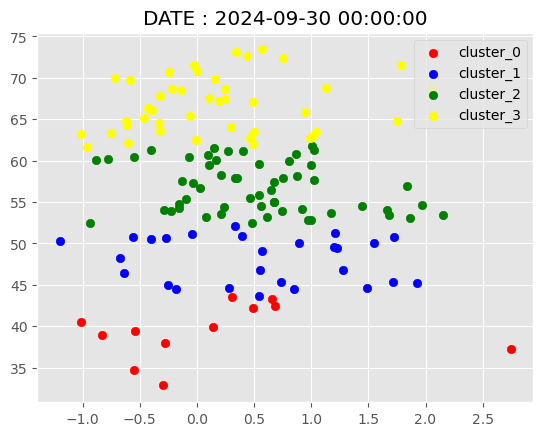

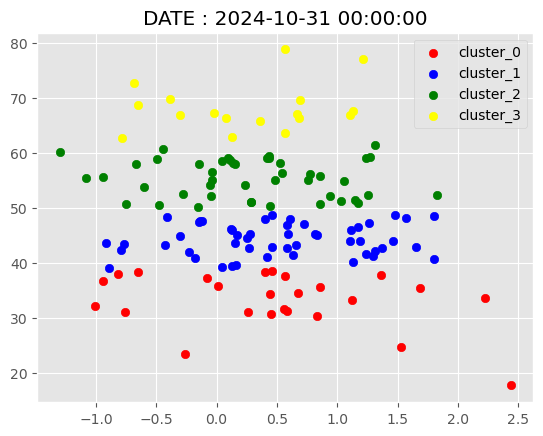

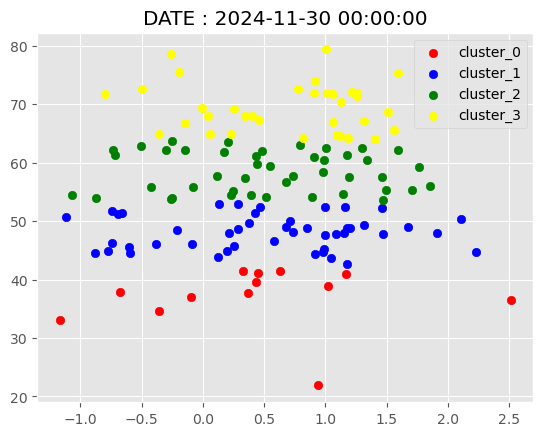

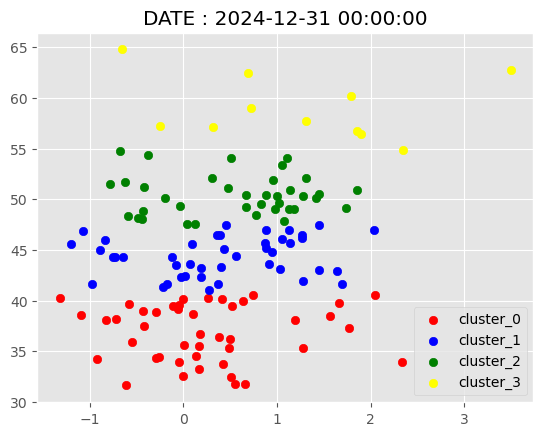

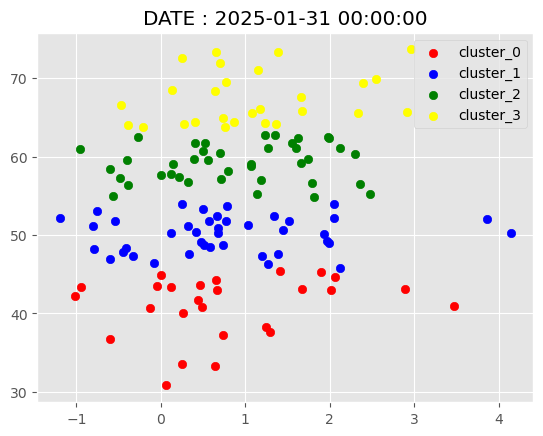

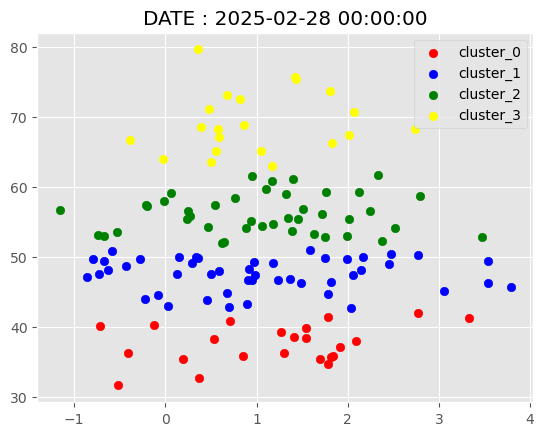

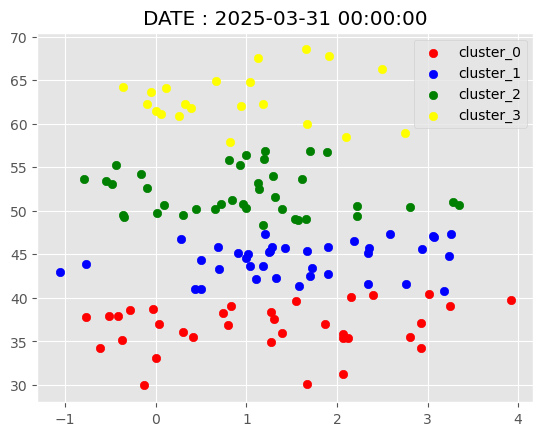

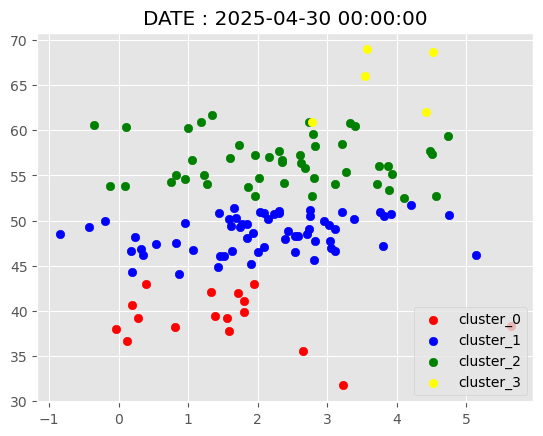

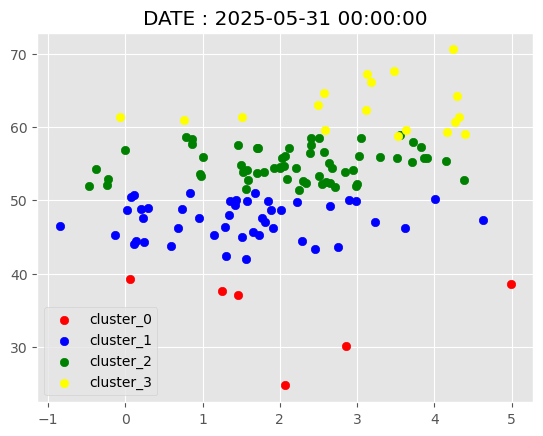

In [62]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    g = data.xs(i, level=0)
    plt.title(f'DATE : {i}')
    plot_clusters(g)

In [63]:
filtered_data = data[data['cluster']==3]
filtered_data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2019-05-31 AMT            -0.006365  69.508904  5.089919  5.139399  5.188880   
           CHTR            0.000170  56.831406  5.912732  5.931478  5.950224   
           KO             -0.012765  56.101995  3.676094  3.702776  3.729458   
           LMT            -0.008643  61.935815  5.644836  5.664345  5.683854   
           MA             -0.000421  57.010338  5.455896  5.488241  5.520586   
...                             ...        ...       ...       ...       ...   
2025-05-31 PM              0.000049  67.272029  4.986676  5.085071  5.183466   
           RCL             0.000238  59.101195  5.155720  5.300619  5.445519   
           SCHW            0.000080  61.343034  4.238223  4.340693  4.443163   
           UBER            0.000433  64.664741  4.165796  4.306702  4.447607   
           WMT             0.000071  61.429937  4.423785  4.527380  4.630976   

                        atr      macd  return_1_M  return_2_M  return_3_M  \
date       ticker                                                           
2019-05-31 AMT    -0.671661  0.693380    0.068971    0.031646    0.059886   
           CHTR   -1.415187  0.352056    0.015114    0.042190    0.029916   
           KO     -0.657098  0.350677    0.001427    0.023935    0.030102   
           LMT    -0.671429  0.576559    0.022207    0.065443    0.032665   
           MA     -0.727669  0.285268   -0.010817    0.034223    0.038635   
...                     ...       ...         ...         ...         ...   
2025-05-31 PM      3.132423  3.227931   -0.002918    0.037506    0.035414   
           RCL     4.397318  0.782924    0.069983    0.057972   -0.021235   
           SCHW    1.505977  0.901862    0.021007    0.030389    0.014785   
           UBER    2.572869  1.582303    0.040365    0.075518    0.035026   
           WMT     4.322989  2.670565    0.015424    0.060586    0.001388   

                   return_6_M  return_9_M  return_12_M    Mkt-RF       SMB  \
date       ticker                                                            
2019-05-31 AMT       0.042278    0.039892     0.036695  0.801420 -0.063994   
           CHTR      0.022763    0.021773     0.031059  1.093425  0.291893   
           KO       -0.002801    0.013698     0.014029  0.584956 -0.328555   
           LMT       0.022424    0.008477     0.008427  0.504336 -0.123564   
           MA        0.038536    0.017761     0.024059  1.102219 -0.188973   
...                       ...         ...          ...       ...       ...   
2025-05-31 PM        0.046006    0.040498     0.048287  0.649983 -0.087404   
           RCL      -0.008918    0.038773     0.038294  2.120838  1.011083   
           SCHW      0.001257    0.028279     0.011449  0.889387 -0.113121   
           UBER      0.026689    0.015892     0.022461  1.362670  0.300137   
           WMT       0.011792    0.028254     0.035135  0.656136 -0.321837   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2019-05-31 AMT    -0.368657  0.481261  0.418412        3  
           CHTR    0.451282  0.716373 -0.434354        3  
           KO      0.091744  0.371690  0.300431        3  
           LMT     0.230073  0.297424  0.598899        3  
           MA      0.190089  0.402426  0.052522        3  
...                     ...       ...       ...      ...  
2025-05-31 PM      0.281616  0.210649  0.504050        3  
           RCL     0.294600 -0.930287  0.105014        3  
           SCHW    1.582140 -0.969711 -1.139698        3  
           UBER   -0.204222 -1.995902 -0.609094        3  
           WMT    -0.343388  0.194178  0.556648        3  

[1998 rows x 19 columns]

In [64]:
#create a dictiionary and put all the stocks for the next month in a list
filtered_data = filtered_data.reset_index(level=1)
filtered_data

ticker  garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date                                                                           
2019-05-31    AMT         -0.006365  69.508904  5.089919  5.139399  5.188880   
2019-05-31   CHTR          0.000170  56.831406  5.912732  5.931478  5.950224   
2019-05-31     KO         -0.012765  56.101995  3.676094  3.702776  3.729458   
2019-05-31    LMT         -0.008643  61.935815  5.644836  5.664345  5.683854   
2019-05-31     MA         -0.000421  57.010338  5.455896  5.488241  5.520586   
...           ...               ...        ...       ...       ...       ...   
2025-05-31     PM          0.000049  67.272029  4.986676  5.085071  5.183466   
2025-05-31    RCL          0.000238  59.101195  5.155720  5.300619  5.445519   
2025-05-31   SCHW          0.000080  61.343034  4.238223  4.340693  4.443163   
2025-05-31   UBER          0.000433  64.664741  4.165796  4.306702  4.447607   
2025-05-31    WMT          0.000071  61.429937  4.423785  4.527380  4.630976   

                 atr      macd  return_1_M  return_2_M  return_3_M  \
date                                                                 
2019-05-31 -0.671661  0.693380    0.068971    0.031646    0.059886   
2019-05-31 -1.415187  0.352056    0.015114    0.042190    0.029916   
2019-05-31 -0.657098  0.350677    0.001427    0.023935    0.030102   
2019-05-31 -0.671429  0.576559    0.022207    0.065443    0.032665   
2019-05-31 -0.727669  0.285268   -0.010817    0.034223    0.038635   
...              ...       ...         ...         ...         ...   
2025-05-31  3.132423  3.227931   -0.002918    0.037506    0.035414   
2025-05-31  4.397318  0.782924    0.069983    0.057972   -0.021235   
2025-05-31  1.505977  0.901862    0.021007    0.030389    0.014785   
2025-05-31  2.572869  1.582303    0.040365    0.075518    0.035026   
2025-05-31  4.322989  2.670565    0.015424    0.060586    0.001388   

            return_6_M  return_9_M  return_12_M    Mkt-RF       SMB       HML  \
date                                                                            
2019-05-31    0.042278    0.039892     0.036695  0.801420 -0.063994 -0.368657   
2019-05-31    0.022763    0.021773     0.031059  1.093425  0.291893  0.451282   
2019-05-31   -0.002801    0.013698     0.014029  0.584956 -0.328555  0.091744   
2019-05-31    0.022424    0.008477     0.008427  0.504336 -0.123564  0.230073   
2019-05-31    0.038536    0.017761     0.024059  1.102219 -0.188973  0.190089   
...                ...         ...          ...       ...       ...       ...   
2025-05-31    0.046006    0.040498     0.048287  0.649983 -0.087404  0.281616   
2025-05-31   -0.008918    0.038773     0.038294  2.120838  1.011083  0.294600   
2025-05-31    0.001257    0.028279     0.011449  0.889387 -0.113121  1.582140   
2025-05-31    0.026689    0.015892     0.022461  1.362670  0.300137 -0.204222   
2025-05-31    0.011792    0.028254     0.035135  0.656136 -0.321837 -0.343388   

                 RMW       CMA  cluster  
date                                     
2019-05-31  0.481261  0.418412        3  
2019-05-31  0.716373 -0.434354        3  
2019-05-31  0.371690  0.300431        3  
2019-05-31  0.297424  0.598899        3  
2019-05-31  0.402426  0.052522        3  
...              ...       ...      ...  
2025-05-31  0.210649  0.504050        3  
2025-05-31 -0.930287  0.105014        3  
2025-05-31 -0.969711 -1.139698        3  
2025-05-31 -1.995902 -0.609094        3  
2025-05-31  0.194178  0.556648        3  

[1998 rows x 20 columns]

In [65]:
filtered_data.index = filtered_data.index+pd.DateOffset(1)
filtered_data

ticker  garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date                                                                           
2019-06-01    AMT         -0.006365  69.508904  5.089919  5.139399  5.188880   
2019-06-01   CHTR          0.000170  56.831406  5.912732  5.931478  5.950224   
2019-06-01     KO         -0.012765  56.101995  3.676094  3.702776  3.729458   
2019-06-01    LMT         -0.008643  61.935815  5.644836  5.664345  5.683854   
2019-06-01     MA         -0.000421  57.010338  5.455896  5.488241  5.520586   
...           ...               ...        ...       ...       ...       ...   
2025-06-01     PM          0.000049  67.272029  4.986676  5.085071  5.183466   
2025-06-01    RCL          0.000238  59.101195  5.155720  5.300619  5.445519   
2025-06-01   SCHW          0.000080  61.343034  4.238223  4.340693  4.443163   
2025-06-01   UBER          0.000433  64.664741  4.165796  4.306702  4.447607   
2025-06-01    WMT          0.000071  61.429937  4.423785  4.527380  4.630976   

                 atr      macd  return_1_M  return_2_M  return_3_M  \
date                                                                 
2019-06-01 -0.671661  0.693380    0.068971    0.031646    0.059886   
2019-06-01 -1.415187  0.352056    0.015114    0.042190    0.029916   
2019-06-01 -0.657098  0.350677    0.001427    0.023935    0.030102   
2019-06-01 -0.671429  0.576559    0.022207    0.065443    0.032665   
2019-06-01 -0.727669  0.285268   -0.010817    0.034223    0.038635   
...              ...       ...         ...         ...         ...   
2025-06-01  3.132423  3.227931   -0.002918    0.037506    0.035414   
2025-06-01  4.397318  0.782924    0.069983    0.057972   -0.021235   
2025-06-01  1.505977  0.901862    0.021007    0.030389    0.014785   
2025-06-01  2.572869  1.582303    0.040365    0.075518    0.035026   
2025-06-01  4.322989  2.670565    0.015424    0.060586    0.001388   

            return_6_M  return_9_M  return_12_M    Mkt-RF       SMB       HML  \
date                                                                            
2019-06-01    0.042278    0.039892     0.036695  0.801420 -0.063994 -0.368657   
2019-06-01    0.022763    0.021773     0.031059  1.093425  0.291893  0.451282   
2019-06-01   -0.002801    0.013698     0.014029  0.584956 -0.328555  0.091744   
2019-06-01    0.022424    0.008477     0.008427  0.504336 -0.123564  0.230073   
2019-06-01    0.038536    0.017761     0.024059  1.102219 -0.188973  0.190089   
...                ...         ...          ...       ...       ...       ...   
2025-06-01    0.046006    0.040498     0.048287  0.649983 -0.087404  0.281616   
2025-06-01   -0.008918    0.038773     0.038294  2.120838  1.011083  0.294600   
2025-06-01    0.001257    0.028279     0.011449  0.889387 -0.113121  1.582140   
2025-06-01    0.026689    0.015892     0.022461  1.362670  0.300137 -0.204222   
2025-06-01    0.011792    0.028254     0.035135  0.656136 -0.321837 -0.343388   

                 RMW       CMA  cluster  
date                                     
2019-06-01  0.481261  0.418412        3  
2019-06-01  0.716373 -0.434354        3  
2019-06-01  0.371690  0.300431        3  
2019-06-01  0.297424  0.598899        3  
2019-06-01  0.402426  0.052522        3  
...              ...       ...      ...  
2025-06-01  0.210649  0.504050        3  
2025-06-01 -0.930287  0.105014        3  
2025-06-01 -0.969711 -1.139698        3  
2025-06-01 -1.995902 -0.609094        3  
2025-06-01  0.194178  0.556648        3  

[1998 rows x 20 columns]

In [66]:
filtered_data = filtered_data.reset_index().set_index(['date','ticker'])
filtered_data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2019-06-01 AMT            -0.006365  69.508904  5.089919  5.139399  5.188880   
           CHTR            0.000170  56.831406  5.912732  5.931478  5.950224   
           KO             -0.012765  56.101995  3.676094  3.702776  3.729458   
           LMT            -0.008643  61.935815  5.644836  5.664345  5.683854   
           MA             -0.000421  57.010338  5.455896  5.488241  5.520586   
...                             ...        ...       ...       ...       ...   
2025-06-01 PM              0.000049  67.272029  4.986676  5.085071  5.183466   
           RCL             0.000238  59.101195  5.155720  5.300619  5.445519   
           SCHW            0.000080  61.343034  4.238223  4.340693  4.443163   
           UBER            0.000433  64.664741  4.165796  4.306702  4.447607   
           WMT             0.000071  61.429937  4.423785  4.527380  4.630976   

                        atr      macd  return_1_M  return_2_M  return_3_M  \
date       ticker                                                           
2019-06-01 AMT    -0.671661  0.693380    0.068971    0.031646    0.059886   
           CHTR   -1.415187  0.352056    0.015114    0.042190    0.029916   
           KO     -0.657098  0.350677    0.001427    0.023935    0.030102   
           LMT    -0.671429  0.576559    0.022207    0.065443    0.032665   
           MA     -0.727669  0.285268   -0.010817    0.034223    0.038635   
...                     ...       ...         ...         ...         ...   
2025-06-01 PM      3.132423  3.227931   -0.002918    0.037506    0.035414   
           RCL     4.397318  0.782924    0.069983    0.057972   -0.021235   
           SCHW    1.505977  0.901862    0.021007    0.030389    0.014785   
           UBER    2.572869  1.582303    0.040365    0.075518    0.035026   
           WMT     4.322989  2.670565    0.015424    0.060586    0.001388   

                   return_6_M  return_9_M  return_12_M    Mkt-RF       SMB  \
date       ticker                                                            
2019-06-01 AMT       0.042278    0.039892     0.036695  0.801420 -0.063994   
           CHTR      0.022763    0.021773     0.031059  1.093425  0.291893   
           KO       -0.002801    0.013698     0.014029  0.584956 -0.328555   
           LMT       0.022424    0.008477     0.008427  0.504336 -0.123564   
           MA        0.038536    0.017761     0.024059  1.102219 -0.188973   
...                       ...         ...          ...       ...       ...   
2025-06-01 PM        0.046006    0.040498     0.048287  0.649983 -0.087404   
           RCL      -0.008918    0.038773     0.038294  2.120838  1.011083   
           SCHW      0.001257    0.028279     0.011449  0.889387 -0.113121   
           UBER      0.026689    0.015892     0.022461  1.362670  0.300137   
           WMT       0.011792    0.028254     0.035135  0.656136 -0.321837   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2019-06-01 AMT    -0.368657  0.481261  0.418412        3  
           CHTR    0.451282  0.716373 -0.434354        3  
           KO      0.091744  0.371690  0.300431        3  
           LMT     0.230073  0.297424  0.598899        3  
           MA      0.190089  0.402426  0.052522        3  
...                     ...       ...       ...      ...  
2025-06-01 PM      0.281616  0.210649  0.504050        3  
           RCL     0.294600 -0.930287  0.105014        3  
           SCHW    1.582140 -0.969711 -1.139698        3  
           UBER   -0.204222 -1.995902 -0.609094        3  
           WMT    -0.343388  0.194178  0.556648        3  

[1998 rows x 19 columns]

In [67]:
dates = filtered_data.index.get_level_values('date').unique().tolist()
dates

[Timestamp('2019-06-01 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-09-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-11-01 00:00:00'),
 Timestamp('2019-12-01 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-03-01 00:00:00'),
 Timestamp('2020-04-01 00:00:00'),
 Timestamp('2020-05-01 00:00:00'),
 Timestamp('2020-06-01 00:00:00'),
 Timestamp('2020-07-01 00:00:00'),
 Timestamp('2020-08-01 00:00:00'),
 Timestamp('2020-09-01 00:00:00'),
 Timestamp('2020-10-01 00:00:00'),
 Timestamp('2020-11-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-06-01 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-08-01 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-10-

In [68]:
fixed_dates = {}
for d in dates:
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_data.xs(d,level=0).index.tolist()
fixed_dates

{'2019-06-01': ['AMT',
  'CHTR',
  'KO',
  'LMT',
  'MA',
  'MCD',
  'MDT',
  'NEE',
  'NOC',
  'PEP',
  'TGT'],
 '2019-07-01': ['ABT',
  'AMAT',
  'AMGN',
  'BDX',
  'BLK',
  'BRK-B',
  'C',
  'CAT',
  'CHTR',
  'COST',
  'DE',
  'DHR',
  'EA',
  'EBAY',
  'EL',
  'EXPE',
  'GM',
  'GS',
  'HD',
  'HON',
  'LMT',
  'MAR',
  'MCD',
  'MDT',
  'MGM',
  'MPC',
  'NOC',
  'ORCL',
  'SBUX',
  'T',
  'TGT',
  'TMO',
  'V',
  'VLO',
  'WDC',
  'WMT'],
 '2019-08-01': ['AAPL',
  'ABT',
  'AMAT',
  'AMGN',
  'BAC',
  'CMG',
  'COST',
  'EBAY',
  'GM',
  'GOOG',
  'GOOGL',
  'GS',
  'HUM',
  'IBM',
  'JPM',
  'LRCX',
  'MDT',
  'MGM',
  'MU',
  'NOC',
  'PANW',
  'PG',
  'SBUX',
  'SHW',
  'T',
  'TXN',
  'UNP',
  'UPS',
  'USB',
  'WDC'],
 '2019-09-01': ['AMGN',
  'AMT',
  'CHTR',
  'CMG',
  'COST',
  'CVS',
  'HD',
  'INTU',
  'KO',
  'LMT',
  'LOW',
  'MDT',
  'NEE',
  'NOC',
  'PEP',
  'SHW',
  'T',
  'TGT',
  'UPS',
  'WMT'],
 '2019-10-01': ['AAPL',
  'ABBV',
  'BMY',
  'DE',
  'HD',
  'IBM

In [69]:
#define portfolio optimization function
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [70]:
def optimize_weights(prices,lower_bound=0):
    returns = expected_returns.mean_historical_return(prices=prices,frequency=252)#252 as for 1 year of trading data
    cov = risk_models.sample_cov(prices=prices,frequency=252)
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound,0.15),#lower bound weight for stock and upper bound weight for stock
                           solver='SCS')
    weights = ef.max_sharpe()
    return ef.clean_weights()


In [71]:
stocks = data.index.get_level_values('ticker').unique().tolist()
new_data = yf.download(tickers=stocks,
                      start = data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                      end=data.index.get_level_values('date').unique()[-1],
                      auto_adjust=False)
new_data

[*********************100%***********************]  153 of 153 completed


Price        Adj Close                                                  \
Ticker            AAPL        ABBV        ABNB         ABT         ACN   
Date                                                                     
2018-05-31   44.262146   72.653084         NaN   54.458664  140.315720   
2018-06-01   45.060368   71.999550         NaN   55.237530  143.153809   
2018-06-04   45.436981   72.770569         NaN   55.777428  143.640289   
2018-06-05   45.787537   72.873367         NaN   55.786285  144.081772   
2018-06-06   45.946220   73.416771         NaN   56.237671  146.595459   
...                ...         ...         ...         ...         ...   
2025-04-30  212.500000  195.100006  121.919998  130.750000  299.149994   
2025-05-01  213.320007  193.339996  124.010002  130.880005  300.529999   
2025-05-02  205.350006  198.470001  125.260002  132.820007  305.329987   
2025-05-05  198.889999  196.070007  124.889999  132.600006  307.709991   
2025-05-06  199.429993  187.904999  122.190002  132.509995  303.885010   

Price                                                                   ...  \
Ticker            ADBE         ADI         ADP        ADSK        ALGN  ...   
Date                                                                    ...   
2018-05-31  249.279999   85.249039  112.242447  129.100006  331.950012  ...   
2018-06-01  251.309998   86.319244  114.581909  133.520004  333.089996  ...   
2018-06-04  253.339996   87.705284  115.894089  135.570007  343.200012  ...   
2018-06-05  252.699997   88.284233  115.738731  136.800003  346.079987  ...   
2018-06-06  253.949997   89.565002  117.491135  137.929993  346.369995  ...   
...                ...         ...         ...         ...         ...  ...   
2025-04-30  374.980011  194.919998  300.600006  274.250000  173.300003  ...   
2025-05-01  374.630005  193.740005  298.690002  273.489990  176.740005  ...   
2025-05-02  380.869995  198.589996  303.570007  279.989990  179.820007  ...   
2025-05-05  381.059998  197.720001  303.959991  280.070007  177.610001  ...   
2025-05-06  383.899994  195.184998  303.290009  279.410004  176.240005  ...   

Price        Volume                                                           \
Ticker          VLO     VRTX        VZ      WBA     WDAY       WDC       WFC   
Date                                                                           
2018-05-31  5480900  1649400  27288300  6508700  2806000   6477540  17515900   
2018-06-01  2941900  2176800   9967100  3225500  5722200   4959530  14100200   
2018-06-04  3792000  2661000   9012600  3564200  3012500   5607271  10593700   
2018-06-05  3392500  2957800  10378000  6999100  1776700   3772005  11883900   
2018-06-06  3554200  3087500  12924800  5455600  2365900   6355692  15848200   
...             ...      ...       ...      ...      ...       ...       ...   
2025-04-30  3854300  1445700  29563000  6712400  1434100  15906000  23953000   
2025-05-01  3995900  1452300  18921900  7879200  1531800   9378300  19672500   
2025-05-02  2600500  1653600  15366500  7849200  1302200   8263300  18347400   
2025-05-05  3775900  1668500   9205400  5885100   808000   7521400  16069200   
2025-05-06  1293159  4865524   5216083  2773508   330008   2135619   9679955   

Price                                    
Ticker           WMT     WYNN       XOM  
Date                                     
2018-05-31  34406100  2240500  15803100  
2018-06-01  15713700  3732500   9906100  
2018-06-04  32766000  5783500  10954700  
2018-06-05  24844200  7194500  12059300  
2018-06-06  22088400  5006900  11603300  
...              ...      ...       ...  
2025-04-30  21639900  1922700  20379300  
2025-05-01  13171800  1772000  18610300  
2025-05-02  16031400  1597200  16581900  
2025-05-05  12435200  2104100  19618600  
2025-05-06   4734684  1371754   8060460  

[1743 rows x 918 columns]

In [72]:
#calculate daily return for each stock, loop over each month, select stock
#calculate weights for next month

return_data = np.log(new_data['Adj Close']).diff()
return_data

Ticker          AAPL      ABBV      ABNB       ABT       ACN      ADBE  \
Date                                                                     
2018-05-31       NaN       NaN       NaN       NaN       NaN       NaN   
2018-06-01  0.017873 -0.009036       NaN  0.014201  0.020025  0.008110   
2018-06-04  0.008323  0.010652       NaN  0.009727  0.003393  0.008045   
2018-06-05  0.007686  0.001412       NaN  0.000159  0.003069 -0.002529   
2018-06-06  0.003460  0.007429       NaN  0.008059  0.017296  0.004934   
...              ...       ...       ...       ...       ...       ...   
2025-04-30  0.006089  0.008183 -0.028861  0.001914  0.002276  0.010725   
2025-05-01  0.003851 -0.009062  0.016997  0.000994  0.004602 -0.000934   
2025-05-02 -0.038078  0.026188  0.010029  0.014714  0.015846  0.016519   
2025-05-05 -0.031964 -0.012166 -0.002958 -0.001658  0.007765  0.000499   
2025-05-06  0.002711 -0.042535 -0.021856 -0.000679 -0.012508  0.007425   

Ticker           ADI       ADP      ADSK      ALGN  ...       VLO      VRTX  \
Date                                                ...                       
2018-05-31       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2018-06-01  0.012476  0.020629  0.033664  0.003428  ...  0.021064 -0.012743   
2018-06-04  0.015930  0.011387  0.015237  0.029901  ...  0.005318 -0.015910   
2018-06-05  0.006579 -0.001341  0.009032  0.008357  ... -0.008960 -0.026612   
2018-06-06  0.014403  0.015028  0.008226  0.000838  ... -0.017422  0.001714   
...              ...       ...       ...       ...  ...       ...       ...   
2025-04-30  0.011610  0.016198  0.004971 -0.025354  ...  0.004922  0.011846   
2025-05-01 -0.006072 -0.006374 -0.002775  0.019656  ... -0.010478 -0.021104   
2025-05-02  0.024725  0.016206  0.023489  0.017277  ...  0.034647  0.004580   
2025-05-05 -0.004390  0.001284  0.000286 -0.012366  ...  0.003441 -0.001917   
2025-05-06 -0.012904 -0.002207 -0.002359 -0.007743  ... -0.016986 -0.139217   

Ticker            VZ       WBA      WDAY       WDC       WFC       WMT  \
Date                                                                     
2018-05-31       NaN       NaN       NaN       NaN       NaN       NaN   
2018-06-01  0.002933  0.007505 -0.036311  0.027868  0.012882  0.005437   
2018-06-04  0.000209  0.006975  0.014621 -0.011950  0.002557  0.028860   
2018-06-05  0.003132 -0.006498  0.004360  0.012299 -0.006037 -0.009410   
2018-06-06  0.009131  0.004126 -0.003113 -0.013832  0.019623 -0.000709   
...              ...       ...       ...       ...       ...       ...   
2025-04-30  0.025516  0.003653  0.006593  0.076742 -0.001267  0.012520   
2025-05-01 -0.017400 -0.003653  0.006550  0.002050  0.011203  0.001644   
2025-05-02  0.010110  0.004564  0.008359  0.016697  0.027335  0.013662   
2025-05-05 -0.004583  0.001820 -0.001368  0.007579  0.000677  0.005856   
2025-05-06  0.015447 -0.001365  0.000584 -0.017135  0.000338 -0.002571   

Ticker          WYNN       XOM  
Date                            
2018-05-31       NaN       NaN  
2018-06-01 -0.018069  0.007237  
2018-06-04 -0.051539 -0.010565  
2018-06-05 -0.033085 -0.003588  
2018-06-06  0.014759  0.016960  
...              ...       ...  
2025-04-30 -0.015322 -0.025517  
2025-05-01 -0.003368  0.001419  
2025-05-02  0.030151  0.004057  
2025-05-05  0.005923 -0.028071  
2025-05-06  0.005648  0.017042  

[1743 rows x 153 columns]

In [73]:
portfolio = pd.DataFrame()
for start_date in fixed_dates.keys():
    try:
        end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
        # print(start_date,'->',end_date)
        cols = fixed_dates[start_date]
    
        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')
        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
                                                #cols
        optimized_data = new_data['Adj Close'][fixed_dates[pd.to_datetime(start_date).strftime('%Y-%m-%d')]][optimization_start_date:optimization_end_date]
    
        key = False
        
        try:
            weights = optimize_weights(prices=optimized_data,
                                   lower_bound=round(1/(len(optimized_data.columns)*2),3))
            weights = pd.DataFrame(weights,index=pd.Series(0))
            key=True
        except:
            print(f'Max sharpe ratio failed for {start_date}, continuing with equal weights')
    
        if key == False:
            weights = pd.DataFrame([1/len(optimized_data.columns) for i in range(len(optimized_data.columns))],
                                    index=optimized_data.columns.tolist(),
                                    columns=pd.Series(0)).T
    
        temp = return_data[start_date:end_date]
        temp = temp.stack().to_frame('return').reset_index(level=0).merge(weights.stack()
                                                                   .to_frame('weight')
                                                                    .reset_index(level=0, drop=True),
                                                                    left_index=True,right_index=True).reset_index().set_index(['Date','Ticker']).unstack().stack()
        temp.index.names = ['date','ticker']
        temp['Weighted Return'] = temp['return']*temp['weight']
        new_temp = temp.groupby(level=0)['Weighted Return'].sum().to_frame('Strategy Return')
    
        portfolio = pd.concat([portfolio,new_temp],axis=0)
        

    except Exception as e:
        print(e)

    
    # print('Start date: ',start_date)
    # print('End date: ',end_date)
    # print('Columns',cols)
    # print('Optimization start date: ',optimization_start_date)
    # print('Optimization end date: ',optimization_end_date)
    # print('Optimised data table: \n',optimized_data)
    # print('Weights:\n',weights)
    # print('Weight adjusted return:\n',temp)
    # break

Max sharpe ratio failed for 2020-03-01, continuing with equal weights
Max sharpe ratio failed for 2020-04-01, continuing with equal weights
Max sharpe ratio failed for 2021-02-01, continuing with equal weights
Max sharpe ratio failed for 2021-10-01, continuing with equal weights
Max sharpe ratio failed for 2022-07-01, continuing with equal weights
Max sharpe ratio failed for 2022-10-01, continuing with equal weights
Max sharpe ratio failed for 2025-05-01, continuing with equal weights
'return'


In [74]:
portfolio = portfolio.drop_duplicates()
portfolio

Strategy Return
date                       
2019-06-03         0.004704
2019-06-04         0.007857
2019-06-05         0.013906
2019-06-06         0.006100
2019-06-07         0.007938
...                     ...
2025-04-30         0.011293
2025-05-01        -0.003561
2025-05-02         0.026340
2025-05-05        -0.001172
2025-05-06        -0.026727

[1491 rows x 1 columns]

<Axes: xlabel='date'>

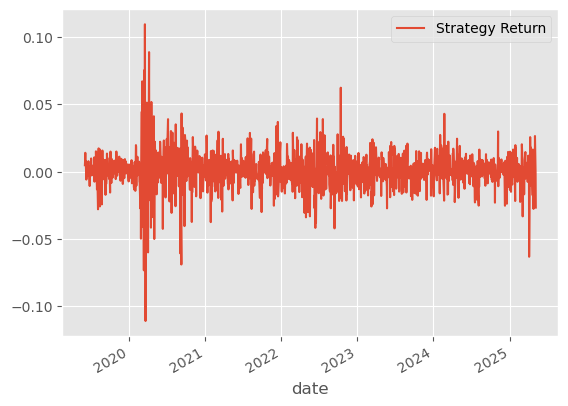

In [75]:
portfolio.plot()

In [76]:
#now compare returns to sp500
spy = yf.download(tickers='SPY',
                  start = '2016-01-01',
                  end = dt.date.today(),auto_adjust=False,multi_level_index = False)
spy


[*********************100%***********************]  1 of 1 completed


Adj Close       Close        High         Low        Open  \
Date                                                                     
2016-01-04  171.855911  201.020004  201.029999  198.589996  200.490005   
2016-01-05  172.146591  201.360001  201.899994  200.050003  201.399994   
2016-01-06  169.975098  198.820007  200.059998  197.600006  198.339996   
2016-01-07  165.897141  194.050003  197.440002  193.589996  195.330002   
2016-01-08  164.076126  191.919998  195.850006  191.580002  195.190002   
...                ...         ...         ...         ...         ...   
2025-04-29  554.320007  554.320007  555.450012  548.549988  548.909973   
2025-04-30  554.539978  554.539978  556.520020  541.520020  547.570007   
2025-05-01  558.469971  558.469971  564.070007  557.859985  560.369995   
2025-05-02  566.760010  566.760010  568.380005  562.380005  564.729980   
2025-05-05  563.510010  563.510010  566.650024  561.700012  562.570007   

               Volume  
Date                   
2016-01-04  222353500  
2016-01-05  110845800  
2016-01-06  152112600  
2016-01-07  213436100  
2016-01-08  209817200  
...               ...  
2025-04-29   47775100  
2025-04-30   93101500  
2025-05-01   63186100  
2025-05-02   60717300  
2025-05-05   38604400  

[2348 rows x 6 columns]

In [77]:
spy_return = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'},axis=1)
spy_return.index.name = 'date'
spy_return

SPY Buy&Hold
date                    
2016-01-05      0.001690
2016-01-06     -0.012694
2016-01-07     -0.024284
2016-01-08     -0.011037
2016-01-11      0.000989
...                  ...
2025-04-29      0.006280
2025-04-30      0.000397
2025-05-01      0.007062
2025-05-02      0.014735
2025-05-05     -0.005751

[2347 rows x 1 columns]

In [78]:
portfolio

Strategy Return
date                       
2019-06-03         0.004704
2019-06-04         0.007857
2019-06-05         0.013906
2019-06-06         0.006100
2019-06-07         0.007938
...                     ...
2025-04-30         0.011293
2025-05-01        -0.003561
2025-05-02         0.026340
2025-05-05        -0.001172
2025-05-06        -0.026727

[1491 rows x 1 columns]

In [79]:
compare_portfolio_spy = portfolio.merge(spy_return,
                             left_index=True,
                             right_index=True)
compare_portfolio_spy

Strategy Return  SPY Buy&Hold
date                                     
2019-06-03         0.004704     -0.002546
2019-06-04         0.007857      0.021475
2019-06-05         0.013906      0.008625
2019-06-06         0.006100      0.006482
2019-06-07         0.007938      0.009957
...                     ...           ...
2025-04-29         0.002941      0.006280
2025-04-30         0.011293      0.000397
2025-05-01        -0.003561      0.007062
2025-05-02         0.026340      0.014735
2025-05-05        -0.001172     -0.005751

[1490 rows x 2 columns]

In [80]:
#calculate cumulate return for both and plot
plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(compare_portfolio_spy).cumsum()) - 1
portfolio_cumulative_return
 

Strategy Return  SPY Buy&Hold
date                                     
2019-06-03         0.004704     -0.002546
2019-06-04         0.012597      0.018874
2019-06-05         0.026678      0.027661
2019-06-06         0.032941      0.034322
2019-06-07         0.041140      0.044621
...                     ...           ...
2025-04-29         1.683514      0.940536
2025-04-30         1.713821      0.941305
2025-05-01         1.704156      0.955015
2025-05-02         1.775384      0.983822
2025-05-05         1.772130      0.972414

[1490 rows x 2 columns]

In [81]:
portfolio_cumulative_return = portfolio_cumulative_return.dropna()
portfolio_cumulative_return

Strategy Return  SPY Buy&Hold
date                                     
2019-06-03         0.004704     -0.002546
2019-06-04         0.012597      0.018874
2019-06-05         0.026678      0.027661
2019-06-06         0.032941      0.034322
2019-06-07         0.041140      0.044621
...                     ...           ...
2025-04-29         1.683514      0.940536
2025-04-30         1.713821      0.941305
2025-05-01         1.704156      0.955015
2025-05-02         1.775384      0.983822
2025-05-05         1.772130      0.972414

[1490 rows x 2 columns]

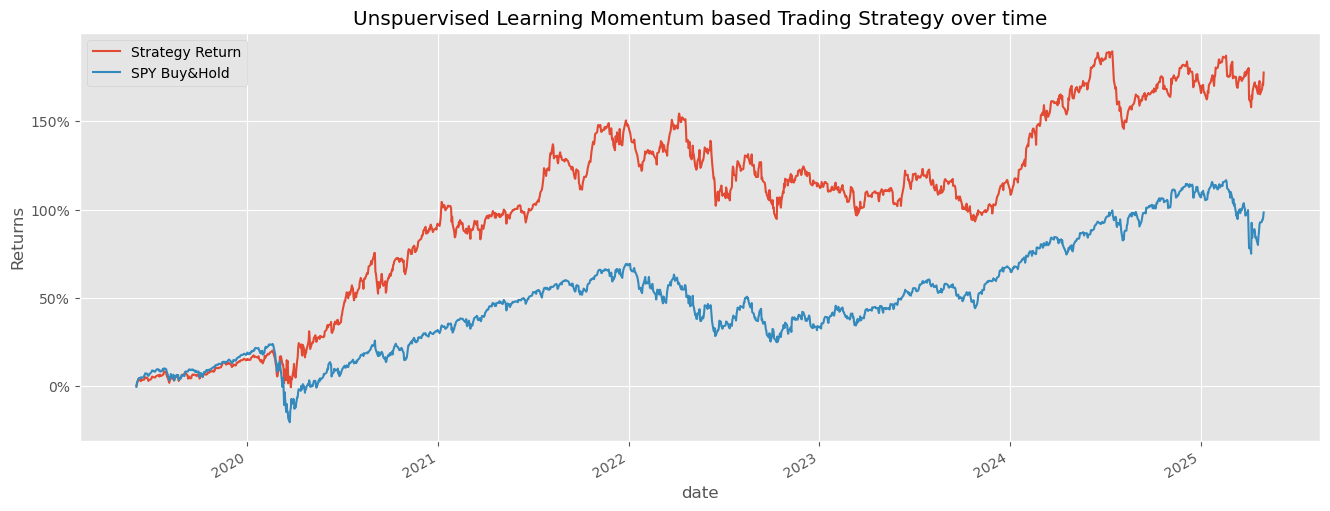

In [82]:
import matplotlib.ticker as mtick
return_date = '2025-05-04'
portfolio_cumulative_return[:return_date].plot(figsize=(16,6))
plt.title('Unspuervised Learning Momentum based Trading Strategy over time')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.ylabel('Returns')
plt.show()